In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx

In [2]:
#upload the file
data_20210930 = pd.read_csv("network\\20210930.csv")
data_20210930.head()

net_id   arc_id from_id to_id borrower   claims_held  \
0  2021/9/30  AT-AU-0      AT    AU  Austria  4.686770e+08   
1  2021/9/30  AT-BE-0      AT    BE  Austria  2.712196e+09   
2  2021/9/30  AT-CA-0      AT    CA  Austria  1.983479e+09   
3  2021/9/30  AT-CH-0      AT    CH  Austria  8.151934e+09   
4  2021/9/30  AT-CL-0      AT    CL  Austria  7.893600e+07   

   claims_held_10_change  claims_held_10_change_max  \
0          -9.247050e+08              -8.733570e+08   
1           1.103880e+08               1.887570e+08   
2           9.586240e+08               6.564790e+08   
3          -3.372849e+09               2.842640e+09   
4           1.117600e+07               4.752000e+07   

   claims_held_10_change_min  claims_held_2_change  ...  \
0              -2.670823e+09         -1.696870e+08  ...   
1              -4.283387e+09          6.334290e+08  ...   
2              -9.762560e+08          7.499800e+08  ...   
3              -5.055555e+09         -2.882065e+09  ...   
4              -2.223050e+08          6.087100e+07  ...   

   claims_held_2_change_min  claims_held_5_change  claims_held_5_change_max  \
0             -1.124000e+09         -1.196340e+08              3.817890e+08   
1             -3.459000e+09          8.231180e+08              1.047574e+09   
2             -6.560000e+08          1.021917e+09              9.588250e+08   
3             -6.309738e+09          3.017865e+09              8.121374e+09   
4             -6.300000e+07          6.275600e+07              8.900100e+07   

   claims_held_5_change_min  claims_held_max  claims_held_min       lender  \
0             -2.894000e+09     1.461000e+09     4.450000e+08    Australia   
1             -3.771637e+09     2.676054e+09     1.467940e+09      Belgium   
2             -1.297000e+09     2.011624e+09     7.752660e+08       Canada   
3             -6.938913e+09     1.431218e+10     5.288694e+09  Switzerland   
4             -1.350000e+08     1.125200e+08     7.000000e+06        Chile   

  share_of_claims_held  share_of_claims_held_max  share_of_claims_held_min  
0             0.003590                  0.008307                  0.003330  
1             0.020774                  0.024635                  0.011835  
2             0.015192                  0.015316                  0.005987  
3             0.062438                  0.121306                  0.045114  
4             0.000605                  0.000854                  0.000051  

[5 rows x 21 columns]

In [3]:
G_20210930 = nx.from_pandas_edgelist(data_20210930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [4]:
G_20210930 = nx.from_pandas_edgelist(data_20210930,"lender","borrower",edge_attr=True,create_using=nx.DiGraph)

In [5]:
nx.get_edge_attributes(G_20210930, 'claims_held')

{('Australia', 'Austria'): 468677000.0,
 ('Australia', 'Belgium'): 1906000000.0,
 ('Australia', 'Canada'): 26100753000.0,
 ('Australia', 'Chile'): 3349000.0,
 ('Australia', 'Germany'): 29096000000.0,
 ('Australia', 'Spain'): 2690310000.0,
 ('Australia', 'Finland'): 388000000.0,
 ('Australia', 'France'): 32269000000.0,
 ('Australia', 'United_Kingdom'): 71417000000.0,
 ('Australia', 'Greece'): 35000000.0,
 ('Australia', 'Ireland'): 648483000.0,
 ('Australia', 'Italy'): 2653571000.0,
 ('Australia', 'Japan'): 140706000000.0,
 ('Australia', 'South_Korea'): 4608265000.0,
 ('Australia', 'Netherlands'): 79972400000.0,
 ('Australia', 'Portugal'): 101656000.0,
 ('Australia', 'Sweden'): 396882000.0,
 ('Australia', 'Turkey'): 4856000.0,
 ('Australia', 'United_States'): 136243000000.0,
 ('Austria', 'Australia'): 288329000.0,
 ('Austria', 'Belgium'): 1383000000.0,
 ('Austria', 'Canada'): 2480812000.0,
 ('Austria', 'Switzerland'): 11348241000.0,
 ('Austria', 'Germany'): 48392000000.0,
 ('Austria', 'S

In [6]:
print(nx.is_weakly_connected(G_20210930))

True


compute the following network statistics:

- Number of nodes
- Number of links
- Density
- Clustering coefficient
- Average degrees (in-degree, out-degree, total degree)
- Average path length
- Diameter
- Size of the giant component
- Degree distributions (in-degree, out-degree, total degree)
- Centrality distribution (choose one centrality measure, motivating your choice)

In [7]:
#degree Distribution
#use the K = <K^2>/<k>^2 to represent the degree distribution
def k_total_degree_distribution(G):
    k1=0
    k2=0
    N = len(G.degree())
    node_degree = list(G.degree())
    for degree in node_degree:
        k1 += degree[1]*degree[1]
        k2 += degree[1]
    return float(((k1/N)/(((k2)/N))**2))

def k_in_degree_distribution(G):
    k1=0
    k2=0
    N = len(G.in_degree())
    node_degree = list(G.in_degree())
    for degree in node_degree:
        k1 += degree[1]*degree[1]
        k2 += degree[1]
    return float(((k1/N)/(((k2)/N))**2))

def k_out_degree_distribution(G):
    k1=0
    k2=0
    N = len(G.out_degree())
    node_degree = list(G.out_degree())
    for degree in node_degree:
        k1 += degree[1]*degree[1]
        k2 += degree[1]
    return float(((k1/N)/(((k2)/N))**2))

In [8]:
#calculate the network statistics
#20210930
G_20210930_result = {}
G_20210930_result['Time'] = '30/09/2021'
G_20210930_result['Number of nodes'] = G_20210930.number_of_nodes()
G_20210930_result['Number of links'] = G_20210930.number_of_edges()
G_20210930_result['Density'] = nx.density(G_20210930)
G_20210930_result['Clustering coefficient'] = nx.average_clustering(G_20210930)
G_20210930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20210930.in_degree()).values()))
G_20210930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20210930.out_degree()).values()))
G_20210930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20210930)).values()))
G_20210930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20210930)
G_20210930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20210930), key=len))
G_20210930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20210930), key=len))
G_20210930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20210930)
G_20210930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20210930)
G_20210930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20210930)
G_20210930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20210930))

In [9]:
#put the result into a dataframe
column = ['Time','Number of nodes','Number of links','Density','Clustering coefficient','Average degrees(in-degree)',\
          'Average degrees(out-degree)',\
         'Average degrees(total degree)','Average shortest path length',\
          'the size of the largest strongly connected component',\
          'the size of the largest weakly connected component',\
          'In_degree Distribution(k)',\
          'Out_degree Distribution(k)','total degree Distribution(k)','Centrality distribution']
df = pd.DataFrame(columns=column)
df

Empty DataFrame
Columns: [Time, Number of nodes, Number of links, Density, Clustering coefficient, Average degrees(in-degree), Average degrees(out-degree), Average degrees(total degree), Average shortest path length, the size of the largest strongly connected component, the size of the largest weakly connected component, In_degree Distribution(k), Out_degree Distribution(k), total degree Distribution(k), Centrality distribution]
Index: []

In [10]:
df = df.append(G_20210930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                        18.5   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                         18.5                           37.0   

   Average shortest path length  \
0                      1.028139   

  the size of the largest strongly connected component  \
0                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   

   total degree Distribution(k)  \
0                       1.02291   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...

In [11]:
df.to_csv('result.csv')

### 20210630

In [12]:
data_20210630 = pd.read_csv("network\\20210630.csv")
G_20210630 = nx.from_pandas_edgelist(data_20210630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [13]:
#20210630
G_20210630_result = {}
G_20210630_result['Time'] = '30/06/2021'
G_20210630_result['Number of nodes'] = G_20210630.number_of_nodes()
G_20210630_result['Number of links'] = G_20210630.number_of_edges()
G_20210630_result['Density'] = nx.density(G_20210630)
G_20210630_result['Clustering coefficient'] = nx.average_clustering(G_20210630)
G_20210630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20210630.in_degree()).values()))
G_20210630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20210630.out_degree()).values()))
G_20210630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20210630)).values()))
G_20210630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20210630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20210630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20210630), key=len))
G_20210630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20210630), key=len))
G_20210630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20210630)
G_20210630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20210630)
G_20210630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20210630)
G_20210630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20210630))

In [14]:
df = df.append(G_20210630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                        18.5   
1                0.921228                        18.5   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                         18.5                           37.0   
1                         18.5                           37.0   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...

In [15]:
df.to_csv('result.csv')

### 20210331

In [16]:
#form the network
data_20210331 = pd.read_csv("network\\20210331.csv")
G_20210331 = nx.from_pandas_edgelist(data_20210331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [17]:
#calcualte
G_20210331_result = {}
G_20210331_result['Time'] = '31/03/2021'
G_20210331_result['Number of nodes'] = G_20210331.number_of_nodes()
G_20210331_result['Number of links'] = G_20210331.number_of_edges()
G_20210331_result['Density'] = nx.density(G_20210331)
G_20210331_result['Clustering coefficient'] = nx.average_clustering(G_20210331)
G_20210331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20210331.in_degree()).values()))
G_20210331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20210331.out_degree()).values()))
G_20210331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20210331)).values()))
G_20210331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20210331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20210331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20210331), key=len))
G_20210331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20210331), key=len))
G_20210331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20210331)
G_20210331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20210331)
G_20210331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20210331)
G_20210331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20210331))

In [18]:
df = df.append(G_20210331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   
2                      1.024387   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...  
2  {'Australia': 0.004245803799375228, 'Austria':...

In [19]:
df.to_csv('result.csv')

### 20201231

In [20]:
#form the network
data_20201231 = pd.read_csv("network\\20201231.csv")
G_20201231 = nx.from_pandas_edgelist(data_20201231,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [21]:
#calcualte
G_20201231_result = {}
G_20201231_result['Time'] = '31/12/2020'
G_20201231_result['Number of nodes'] = G_20201231.number_of_nodes()
G_20201231_result['Number of links'] = G_20201231.number_of_edges()
G_20201231_result['Density'] = nx.density(G_20201231)
G_20201231_result['Clustering coefficient'] = nx.average_clustering(G_20201231)
G_20201231_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20201231.in_degree()).values()))
G_20201231_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20201231.out_degree()).values()))
G_20201231_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20201231)).values()))
G_20201231_result['Average shortest path length'] = nx.average_shortest_path_length(G_20201231)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20201231_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20201231), key=len))
G_20201231_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20201231), key=len))
G_20201231_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20201231)
G_20201231_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20201231)
G_20201231_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20201231)
G_20201231_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20201231))

In [22]:
df = df.append(G_20201231_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   
2                      1.024387   
3                      1.020743   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...  
2  {'Australia': 0.004245803799375228, 'Austria':...  
3  {'Australia': 0.0036633208061779493, 'Austria'...

In [23]:
df.to_csv('result.csv')

### 20200930

In [24]:
#form the network
data_20200930 = pd.read_csv("network\\20200930.csv")
G_20200930 = nx.from_pandas_edgelist(data_20200930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [25]:
#calcualte
G_20200930_result = {}
G_20200930_result['Time'] = '30/09/2020'
G_20200930_result['Number of nodes'] = G_20200930.number_of_nodes()
G_20200930_result['Number of links'] = G_20200930.number_of_edges()
G_20200930_result['Density'] = nx.density(G_20200930)
G_20200930_result['Clustering coefficient'] = nx.average_clustering(G_20200930)
G_20200930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20200930.in_degree()).values()))
G_20200930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20200930.out_degree()).values()))
G_20200930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20200930)).values()))
G_20200930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20200930)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20200930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20200930), key=len))
G_20200930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20200930), key=len))
G_20200930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20200930)
G_20200930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20200930)
G_20200930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20200930)
G_20200930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20200930))

In [26]:
df = df.append(G_20200930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   
4  30/09/2020              22             406  0.878788   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   
4                0.920680                   18.454545   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   
4                    18.454545                      36.909091   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   
4                      1.030303   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     
4                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   
4                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   
4                   1.074668                    1.007134   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   
2                      1.024387   
3                      1.020743   
4                      1.022883   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...  
2  {'Australia': 0.004245803799375228, 'Austria':...  
3  {'Australia': 0.0036633208061779493, 'Austria'...  
4  {'Australia': 0.004156121656121657, 'Austria':...

In [27]:
df.to_csv('result.csv')

### 20200630

In [28]:
#form the network
data_20200630 = pd.read_csv("network\\20200630.csv")
G_20200630 = nx.from_pandas_edgelist(data_20200630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [29]:
#calcualte
G_20200630_result = {}
G_20200630_result['Time'] = '30/06/2020'
G_20200630_result['Number of nodes'] = G_20200630.number_of_nodes()
G_20200630_result['Number of links'] = G_20200630.number_of_edges()
G_20200630_result['Density'] = nx.density(G_20200630)
G_20200630_result['Clustering coefficient'] = nx.average_clustering(G_20200630)
G_20200630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20200630.in_degree()).values()))
G_20200630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20200630.out_degree()).values()))
G_20200630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20200630)).values()))
G_20200630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20200630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20200630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20200630), key=len))
G_20200630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20200630), key=len))
G_20200630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20200630)
G_20200630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20200630)
G_20200630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20200630)
G_20200630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20200630))

In [30]:
df = df.append(G_20200630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   
4  30/09/2020              22             406  0.878788   
5  30/06/2020              22             408  0.883117   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   
4                0.920680                   18.454545   
5                0.920903                   18.545455   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   
4                    18.454545                      36.909091   
5                    18.545455                      37.090909   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   
4                      1.030303   
5                      1.025974   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     
4                                                 21     
5                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   
4                                                 22   
5                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   
4                   1.074668                    1.007134   
5                   1.072352                    1.006272   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   
2                      1.024387   
3                      1.020743   
4                      1.022883   
5                      1.020809   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...  
2  {'Australia': 0.004245803799375228, 'Austria':...  
3  {'Australia': 0.0036633208061779493, 'Austria'...  
4  {'Australia': 0.004156121656121657, 'Austria':...  
5  {'Australia': 0.0036158484372770094, 'Austria'...

In [31]:
df.to_csv('result.csv')

### 20200331

In [32]:
#form the network
data_20200331 = pd.read_csv("network\\20200331.csv")
G_20200331 = nx.from_pandas_edgelist(data_20200331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [33]:
#calcualte
G_20200331_result = {}
G_20200331_result['Time'] = '31/03/2020'
G_20200331_result['Number of nodes'] = G_20200331.number_of_nodes()
G_20200331_result['Number of links'] = G_20200331.number_of_edges()
G_20200331_result['Density'] = nx.density(G_20200331)
G_20200331_result['Clustering coefficient'] = nx.average_clustering(G_20200331)
G_20200331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20200331.in_degree()).values()))
G_20200331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20200331.out_degree()).values()))
G_20200331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20200331)).values()))
G_20200331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20200331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20200331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20200331), key=len))
G_20200331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20200331), key=len))
G_20200331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20200331)
G_20200331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20200331)
G_20200331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20200331)
G_20200331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20200331))

In [34]:
df = df.append(G_20200331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   
4  30/09/2020              22             406  0.878788   
5  30/06/2020              22             408  0.883117   
6  31/03/2020              22             409  0.885281   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   
4                0.920680                   18.454545   
5                0.920903                   18.545455   
6                0.922576                   18.590909   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   
4                    18.454545                      36.909091   
5                    18.545455                      37.090909   
6                    18.590909                      37.181818   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   
4                      1.030303   
5                      1.025974   
6                      1.023810   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     
4                                                 21     
5                                                 21     
6                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   
4                                                 22   
5                                                 22   
6                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   
4                   1.074668                    1.007134   
5                   1.072352                    1.006272   
6                   1.071455                    1.005697   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   
2                      1.024387   
3                      1.020743   
4                      1.022883   
5                      1.020809   
6                      1.020427   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...  
2  {'Australia': 0.004245803799375228, 'Austria':...  
3  {'Australia': 0.0036633208061779493, 'Austria'...  
4  {'Australia': 0.004156121656121657, 'Austria':...  
5  {'Australia': 0.0036158484372770094, 'Austria'...  
6  {'Australia': 0.0033664747950462237, 'Austria'...

In [35]:
df.to_csv('result.csv')

### 20191231

In [36]:
#form the network
data_20191231 = pd.read_csv("network\\20191231.csv")
G_20191231 = nx.from_pandas_edgelist(data_20191231,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [37]:
#calcualte
G_20191231_result = {}
G_20191231_result['Time'] = '31/12/2019'
G_20191231_result['Number of nodes'] = G_20191231.number_of_nodes()
G_20191231_result['Number of links'] = G_20191231.number_of_edges()
G_20191231_result['Density'] = nx.density(G_20191231)
G_20191231_result['Clustering coefficient'] = nx.average_clustering(G_20191231)
G_20191231_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20191231.in_degree()).values()))
G_20191231_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20191231.out_degree()).values()))
G_20191231_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20191231)).values()))
G_20191231_result['Average shortest path length'] = nx.average_shortest_path_length(G_20191231)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20191231_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20191231), key=len))
G_20191231_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20191231), key=len))
G_20191231_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20191231)
G_20191231_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20191231)
G_20191231_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20191231)
G_20191231_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20191231))

In [38]:
df = df.append(G_20191231_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   
4  30/09/2020              22             406  0.878788   
5  30/06/2020              22             408  0.883117   
6  31/03/2020              22             409  0.885281   
7  31/12/2019              22             406  0.878788   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   
4                0.920680                   18.454545   
5                0.920903                   18.545455   
6                0.922576                   18.590909   
7                0.919822                   18.454545   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   
4                    18.454545                      36.909091   
5                    18.545455                      37.090909   
6                    18.590909                      37.181818   
7                    18.454545                      36.909091   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   
4                      1.030303   
5                      1.025974   
6                      1.023810   
7                      1.030303   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     
4                                                 21     
5                                                 21     
6                                                 21     
7                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   
4                                                 22   
5                                                 22   
6                                                 22   
7                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   
4                   1.074668                    1.007134   
5                   1.072352                    1.006272   
6                   1.071455                    1.005697   
7                   1.074401                    1.006600   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246   
2                      1.024387   
3                      1.020743   
4                      1.022883   
5                      1.020809   
6                      1.020427   
7                      1.022416   

                             Centrality distribution  
0  {'Australia': 0.003651011686725973, 'Austria':...  
1  {'Australia': 0.003840475001189287, 'Austria':...  
2  {'Austra

In [39]:
df.to_csv('result.csv')

### 20190930

In [40]:
#form the network
data_20190930 = pd.read_csv("network\\20190930.csv")
G_20190930 = nx.from_pandas_edgelist(data_20190930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [41]:
#calcualte
G_20190930_result = {}
G_20190930_result['Time'] = '30/09/2019'
G_20190930_result['Number of nodes'] = G_20190930.number_of_nodes()
G_20190930_result['Number of links'] = G_20190930.number_of_edges()
G_20190930_result['Density'] = nx.density(G_20190930)
G_20190930_result['Clustering coefficient'] = nx.average_clustering(G_20190930)
G_20190930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20190930.in_degree()).values()))
G_20190930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20190930.out_degree()).values()))
G_20190930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20190930)).values()))
G_20190930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20190930)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20190930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20190930), key=len))
G_20190930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20190930), key=len))
G_20190930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20190930)
G_20190930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20190930)
G_20190930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20190930)
G_20190930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20190930))

In [42]:
df = df.append(G_20190930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   
4  30/09/2020              22             406  0.878788   
5  30/06/2020              22             408  0.883117   
6  31/03/2020              22             409  0.885281   
7  31/12/2019              22             406  0.878788   
8  30/09/2019              22             408  0.883117   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   
4                0.920680                   18.454545   
5                0.920903                   18.545455   
6                0.922576                   18.590909   
7                0.919822                   18.454545   
8                0.920662                   18.545455   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   
4                    18.454545                      36.909091   
5                    18.545455                      37.090909   
6                    18.590909                      37.181818   
7                    18.454545                      36.909091   
8                    18.545455                      37.090909   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   
4                      1.030303   
5                      1.025974   
6                      1.023810   
7                      1.030303   
8                      1.025974   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     
4                                                 21     
5                                                 21     
6                                                 21     
7                                                 21     
8                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   
4                                                 22   
5                                                 22   
6                                                 22   
7                                                 22   
8                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   
4                   1.074668                    1.007134   
5                   1.072352                    1.006272   
6                   1.071455                    1.005697   
7                   1.074401                    1.006600   
8                   1.072352                    1.006272   

   total degree Distribution(k)  \
0                      1.022910   
1                      1.022246 

In [43]:
df.to_csv('result.csv')

### 20190630

In [44]:
#form the network
data_20190630 = pd.read_csv("network\\20190630.csv")
G_20190630 = nx.from_pandas_edgelist(data_20190630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [45]:
#calcualte
G_20190630_result = {}
G_20190630_result['Time'] = '30/06/2019'
G_20190630_result['Number of nodes'] = G_20190630.number_of_nodes()
G_20190630_result['Number of links'] = G_20190630.number_of_edges()
G_20190630_result['Density'] = nx.density(G_20190630)
G_20190630_result['Clustering coefficient'] = nx.average_clustering(G_20190630)
G_20190630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20190630.in_degree()).values()))
G_20190630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20190630.out_degree()).values()))
G_20190630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20190630)).values()))
G_20190630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20190630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20190630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20190630), key=len))
G_20190630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20190630), key=len))
G_20190630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20190630)
G_20190630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20190630)
G_20190630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20190630)
G_20190630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20190630))

In [46]:
df = df.append(G_20190630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0  30/09/2021              22             407  0.880952   
1  30/06/2021              22             407  0.880952   
2  31/03/2021              22             405  0.876623   
3  31/12/2020              22             408  0.883117   
4  30/09/2020              22             406  0.878788   
5  30/06/2020              22             408  0.883117   
6  31/03/2020              22             409  0.885281   
7  31/12/2019              22             406  0.878788   
8  30/09/2019              22             408  0.883117   
9  30/06/2019              22             404  0.874459   

   Clustering coefficient  Average degrees(in-degree)  \
0                0.922612                   18.500000   
1                0.921228                   18.500000   
2                0.921047                   18.409091   
3                0.920628                   18.545455   
4                0.920680                   18.454545   
5                0.920903                   18.545455   
6                0.922576                   18.590909   
7                0.919822                   18.454545   
8                0.920662                   18.545455   
9                0.919148                   18.363636   

   Average degrees(out-degree)  Average degrees(total degree)  \
0                    18.500000                      37.000000   
1                    18.500000                      37.000000   
2                    18.409091                      36.818182   
3                    18.545455                      37.090909   
4                    18.454545                      36.909091   
5                    18.545455                      37.090909   
6                    18.590909                      37.181818   
7                    18.454545                      36.909091   
8                    18.545455                      37.090909   
9                    18.363636                      36.727273   

   Average shortest path length  \
0                      1.028139   
1                      1.028139   
2                      1.032468   
3                      1.025974   
4                      1.030303   
5                      1.025974   
6                      1.023810   
7                      1.030303   
8                      1.025974   
9                      1.034632   

  the size of the largest strongly connected component  \
0                                                 21     
1                                                 21     
2                                                 21     
3                                                 21     
4                                                 21     
5                                                 21     
6                                                 21     
7                                                 21     
8                                                 21     
9                                                 21     

  the size of the largest weakly connected component  \
0                                                 22   
1                                                 22   
2                                                 22   
3                                                 22   
4                                                 22   
5                                                 22   
6                                                 22   
7                                                 22   
8                                                 22   
9                                                 22   

   In_degree Distribution(k)  Out_degree Distribution(k)  \
0                   1.072183                    1.005777   
1                   1.072448                    1.006840   
2                   1.073141                    1.008493   
3                   1.072616                    1.006272   
4                   1.074668                    1.007134   
5            

In [47]:
df.to_csv('result.csv')

### 20190331

In [48]:
#form the network
data_20190331 = pd.read_csv("network\\20190331.csv")
G_20190331 = nx.from_pandas_edgelist(data_20190331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [49]:
#calcualte
G_20190331_result = {}
G_20190331_result['Time'] = '31/03/2019'
G_20190331_result['Number of nodes'] = G_20190331.number_of_nodes()
G_20190331_result['Number of links'] = G_20190331.number_of_edges()
G_20190331_result['Density'] = nx.density(G_20190331)
G_20190331_result['Clustering coefficient'] = nx.average_clustering(G_20190331)
G_20190331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20190331.in_degree()).values()))
G_20190331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20190331.out_degree()).values()))
G_20190331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20190331)).values()))
G_20190331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20190331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20190331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20190331), key=len))
G_20190331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20190331), key=len))
G_20190331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20190331)
G_20190331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20190331)
G_20190331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20190331)
G_20190331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20190331))

In [50]:
df = df.append(G_20190331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   

   the size of the largest strongly connected component  \
0                                                  21     
1                                                  21     
2                                                  21     
3                                                  21     
4                                                  21     
5                                                  21     
6                                                  21     
7                                                  21     
8                                                  21     
9                                                  21     
10                                                 21     

   the size of the largest weakly connected component  \
0                                                  22   
1                                                  22   
2                                                  22   
3                                                  22   
4                                                  22   
5                                                  22   
6                                                  22   
7                                                  22   
8                                                  22   
9                                                  22   
10                            

In [51]:
df.to_csv('result.csv')

### 20181231

In [52]:
#form the network
data_20181231 = pd.read_csv("network\\20181231.csv")
G_20181231 = nx.from_pandas_edgelist(data_20181231,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [53]:
#calcualte
G_20181231_result = {}
G_20181231_result['Time'] = '31/12/2018'
G_20181231_result['Number of nodes'] = G_20181231.number_of_nodes()
G_20181231_result['Number of links'] = G_20181231.number_of_edges()
G_20181231_result['Density'] = nx.density(G_20181231)
G_20181231_result['Clustering coefficient'] = nx.average_clustering(G_20181231)
G_20181231_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20181231.in_degree()).values()))
G_20181231_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20181231.out_degree()).values()))
G_20181231_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20181231)).values()))
G_20181231_result['Average shortest path length'] = nx.average_shortest_path_length(G_20181231)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20181231_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20181231), key=len))
G_20181231_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20181231), key=len))
G_20181231_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20181231)
G_20181231_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20181231)
G_20181231_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20181231)
G_20181231_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20181231))

In [54]:
df = df.append(G_20181231_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   

   the size of the largest strongly connected component  \
0                                                  21     
1                                                  21     
2                                                  21     
3                                                  21     
4                                                  21     
5                                                  21     
6                                                  21     
7                                                  21     
8                                                  21     
9                                                  21     
10                                                 21     
11                                                 21     

   the size of the largest weakly connected component  \
0                                                  22   
1                                                  22   
2                                                  22   
3                                                  22   
4                                                  22   
5                                   

In [55]:
df.to_csv('result.csv')

### 20180930

In [56]:
#form the network
data_20180930 = pd.read_csv("network\\20180930.csv")
G_20180930 = nx.from_pandas_edgelist(data_20180930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [57]:
#calcualte
G_20180930_result = {}
G_20180930_result['Time'] = '30/09/2018'
G_20180930_result['Number of nodes'] = G_20180930.number_of_nodes()
G_20180930_result['Number of links'] = G_20180930.number_of_edges()
G_20180930_result['Density'] = nx.density(G_20180930)
G_20180930_result['Clustering coefficient'] = nx.average_clustering(G_20180930)
G_20180930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20180930.in_degree()).values()))
G_20180930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20180930.out_degree()).values()))
G_20180930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20180930)).values()))
G_20180930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20180930)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20180930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20180930), key=len))
G_20180930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20180930), key=len))
G_20180930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20180930)
G_20180930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20180930)
G_20180930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20180930)
G_20180930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20180930))

In [58]:
df = df.append(G_20180930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   
12                      1.032468   

   the size of the largest strongly connected component  \
0                                                  21     
1                                                  21     
2                                                  21     
3                                                  21     
4                                                  21     
5                                                  21     
6                                                  21     
7                                                  21     
8                                                  21     
9                                                  21     
10                                                 21     
11                                                 21     
12                                                 21     

   the size of the largest weakly connected component  \
0                                         

In [59]:
df.to_csv('result.csv')

### 20180630

In [60]:
#form the network
data_20180630 = pd.read_csv("network\\20180630.csv")
G_20180630 = nx.from_pandas_edgelist(data_20180630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [61]:
#calcualte
G_20180630_result = {}
G_20180630_result['Time'] = '30/06/2018'
G_20180630_result['Number of nodes'] = G_20180630.number_of_nodes()
G_20180630_result['Number of links'] = G_20180630.number_of_edges()
G_20180630_result['Density'] = nx.density(G_20180630)
G_20180630_result['Clustering coefficient'] = nx.average_clustering(G_20180630)
G_20180630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20180630.in_degree()).values()))
G_20180630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20180630.out_degree()).values()))
G_20180630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20180630)).values()))
G_20180630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20180630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20180630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20180630), key=len))
G_20180630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20180630), key=len))
G_20180630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20180630)
G_20180630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20180630)
G_20180630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20180630)
G_20180630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20180630))

In [62]:
df = df.append(G_20180630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   
12                      1.032468   
13                      1.036797   

   the size of the largest strongly connected component  \
0                                                  21     
1                                                  21     
2                                                  21     
3                                                  21     
4                                                  21     
5                                                  21     
6                                                  21     
7                                                  21     
8                                                  21     
9                                                  21     
10                                                 21    

In [63]:
df.to_csv('result.csv')

### 20180331

In [64]:
#form the network
data_20180331 = pd.read_csv("network\\20180331.csv")
G_20180331 = nx.from_pandas_edgelist(data_20180331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [65]:
#calcualte
G_20180331_result = {}
G_20180331_result['Time'] = '31/03/2018'
G_20180331_result['Number of nodes'] = G_20180331.number_of_nodes()
G_20180331_result['Number of links'] = G_20180331.number_of_edges()
G_20180331_result['Density'] = nx.density(G_20180331)
G_20180331_result['Clustering coefficient'] = nx.average_clustering(G_20180331)
G_20180331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20180331.in_degree()).values()))
G_20180331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20180331.out_degree()).values()))
G_20180331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20180331)).values()))
G_20180331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20180331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20180331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20180331), key=len))
G_20180331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20180331), key=len))
G_20180331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20180331)
G_20180331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20180331)
G_20180331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20180331)
G_20180331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20180331))

In [66]:
df = df.append(G_20180331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   
12                      1.032468   
13                      1.036797   
14                      1.041126   

   the size of the largest strongly connected component  \
0                                                  21     
1                                                  21     
2                                                  21     
3                                                  21     
4                                                  21     
5                                                  21     
6                                                  21     
7             

In [67]:
df.to_csv('result.csv')

### 20171231

In [68]:
#form the network
data_20171231 = pd.read_csv("network\\20171231.csv")
G_20171231 = nx.from_pandas_edgelist(data_20171231,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [69]:
#calcualte
G_20171231_result = {}
G_20171231_result['Time'] = '31/12/2017'
G_20171231_result['Number of nodes'] = G_20171231.number_of_nodes()
G_20171231_result['Number of links'] = G_20171231.number_of_edges()
G_20171231_result['Density'] = nx.density(G_20171231)
G_20171231_result['Clustering coefficient'] = nx.average_clustering(G_20171231)
G_20171231_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20171231.in_degree()).values()))
G_20171231_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20171231.out_degree()).values()))
G_20171231_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20171231)).values()))
G_20171231_result['Average shortest path length'] = nx.average_shortest_path_length(G_20171231)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20171231_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20171231), key=len))
G_20171231_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20171231), key=len))
G_20171231_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20171231)
G_20171231_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20171231)
G_20171231_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20171231)
G_20171231_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20171231))

In [70]:
df = df.append(G_20171231_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   
12                      1.032468   
13                      1.036797   
14                      1.041126   
15                      1.038961   

   the size of the largest strongly connected component  \
0                                                  21     
1                                                  21     
2                                                  21     
3                             

In [71]:
df.to_csv('result.csv')

### 20170930

In [72]:
#form the network
data_20170930 = pd.read_csv("network\\20170930.csv")
G_20170930 = nx.from_pandas_edgelist(data_20170930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [73]:
#calcualte
G_20170930_result = {}
G_20170930_result['Time'] = '30/09/2017'
G_20170930_result['Number of nodes'] = G_20170930.number_of_nodes()
G_20170930_result['Number of links'] = G_20170930.number_of_edges()
G_20170930_result['Density'] = nx.density(G_20170930)
G_20170930_result['Clustering coefficient'] = nx.average_clustering(G_20170930)
G_20170930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20170930.in_degree()).values()))
G_20170930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20170930.out_degree()).values()))
G_20170930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20170930)).values()))
G_20170930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20170930)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20170930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20170930), key=len))
G_20170930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20170930), key=len))
G_20170930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20170930)
G_20170930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20170930)
G_20170930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20170930)
G_20170930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20170930))

In [74]:
df = df.append(G_20170930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      36.454545   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   
12                      1.032468   
13                      1.036797   
14                      1.041126   
15                      1.038961   
16                      1.041126   

   the size of the largest strongly connected 

In [75]:
df.to_csv('result.csv')

### 20170630

In [76]:
data_20170630 = pd.read_csv("network\\20170630.csv")
G_20170630 = nx.from_pandas_edgelist(data_20170630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [77]:
#calcualte
G_20170630_result = {}
G_20170630_result['Time'] = '30/06/2017'
G_20170630_result['Number of nodes'] = G_20170630.number_of_nodes()
G_20170630_result['Number of links'] = G_20170630.number_of_edges()
G_20170630_result['Density'] = nx.density(G_20170630)
G_20170630_result['Clustering coefficient'] = nx.average_clustering(G_20170630)
G_20170630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20170630.in_degree()).values()))
G_20170630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20170630.out_degree()).values()))
G_20170630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20170630)).values()))
G_20170630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20170630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20170630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20170630), key=len))
G_20170630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20170630), key=len))
G_20170630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20170630)
G_20170630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20170630)
G_20170630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20170630)
G_20170630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20170630))

In [78]:
df = df.append(G_20170630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      36.454545   
17                    18.181818                      36.363636   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8                       1.025974   
9                       1.034632   
10                      1.028139   
11                      1.038961   
12                      1.032468   
13     

In [79]:
df.to_csv('result.csv')

### 20170331

In [80]:
data_20170331 = pd.read_csv("network\\20170331.csv")
G_20170331 = nx.from_pandas_edgelist(data_20170331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [81]:
#calcualte
G_20170331_result = {}
G_20170331_result['Time'] = '31/03/2017'
G_20170331_result['Number of nodes'] = G_20170331.number_of_nodes()
G_20170331_result['Number of links'] = G_20170331.number_of_edges()
G_20170331_result['Density'] = nx.density(G_20170331)
G_20170331_result['Clustering coefficient'] = nx.average_clustering(G_20170331)
G_20170331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20170331.in_degree()).values()))
G_20170331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20170331.out_degree()).values()))
G_20170331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20170331)).values()))
G_20170331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20170331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20170331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20170331), key=len))
G_20170331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20170331), key=len))
G_20170331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20170331)
G_20170331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20170331)
G_20170331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20170331)
G_20170331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20170331))

In [82]:
df = df.append(G_20170331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      36.454545   
17                    18.181818                      36.363636   
18                    18.136364                      36.272727   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   
3                       1.025974   
4                       1.030303   
5                       1.025974   
6                       1.023810   
7                       1.030303   
8  

In [83]:
df.to_csv('result.csv')

### 20161231

In [84]:
data_20161231 = pd.read_csv("network\\20161231.csv")
G_20161231 = nx.from_pandas_edgelist(data_20161231,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [85]:
#calcualte
G_20161231_result = {}
G_20161231_result['Time'] = '31/12/2016'
G_20161231_result['Number of nodes'] = G_20161231.number_of_nodes()
G_20161231_result['Number of links'] = G_20161231.number_of_edges()
G_20161231_result['Density'] = nx.density(G_20161231)
G_20161231_result['Clustering coefficient'] = nx.average_clustering(G_20161231)
G_20161231_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20161231.in_degree()).values()))
G_20161231_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20161231.out_degree()).values()))
G_20161231_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20161231)).values()))
G_20161231_result['Average shortest path length'] = nx.average_shortest_path_length(G_20161231)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20161231_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20161231), key=len))
G_20161231_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20161231), key=len))
G_20161231_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20161231)
G_20161231_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20161231)
G_20161231_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20161231)
G_20161231_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20161231))

In [86]:
df = df.append(G_20161231_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      36.454545   
17                    18.181818                      36.363636   
18                    18.136364                      36.272727   
19                    18.272727                      36.545455   

    Average shortest path length  \
0                       1.028139   
1                       1.028139   
2                       1.032468   

In [87]:
df.to_csv('result.csv')

### 20160930

In [88]:
data_20160930 = pd.read_csv("network\\20160930.csv")
G_20160930 = nx.from_pandas_edgelist(data_20160930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [89]:
#calcualte
G_20160930_result = {}
G_20160930_result['Time'] = '30/09/2016'
G_20160930_result['Number of nodes'] = G_20160930.number_of_nodes()
G_20160930_result['Number of links'] = G_20160930.number_of_edges()
G_20160930_result['Density'] = nx.density(G_20160930)
G_20160930_result['Clustering coefficient'] = nx.average_clustering(G_20160930)
G_20160930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20160930.in_degree()).values()))
G_20160930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20160930.out_degree()).values()))
G_20160930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20160930)).values()))
G_20160930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20160930)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20160930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20160930), key=len))
G_20160930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20160930), key=len))
G_20160930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20160930)
G_20160930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20160930)
G_20160930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20160930)
G_20160930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20160930))

In [90]:
df = df.append(G_20160930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      36.454545   
17                    18.181818                      36.363636   
18                    18.136364                      36.272727   
19                    18.272727                      36.545455   
20                    18.1

In [91]:
df.to_csv('result.csv')

### 20160630

In [92]:
data_20160630 = pd.read_csv("network\\20160630.csv")
G_20160630 = nx.from_pandas_edgelist(data_20160630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [93]:
#calcualte
G_20160630_result = {}
G_20160630_result['Time'] = '30/06/2016'
G_20160630_result['Number of nodes'] = G_20160630.number_of_nodes()
G_20160630_result['Number of links'] = G_20160630.number_of_edges()
G_20160630_result['Density'] = nx.density(G_20160630)
G_20160630_result['Clustering coefficient'] = nx.average_clustering(G_20160630)
G_20160630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20160630.in_degree()).values()))
G_20160630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20160630.out_degree()).values()))
G_20160630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20160630)).values()))
G_20160630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20160630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20160630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20160630), key=len))
G_20160630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20160630), key=len))
G_20160630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20160630)
G_20160630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20160630)
G_20160630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20160630)
G_20160630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20160630))

In [94]:
df = df.append(G_20160630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   
21  30/06/2016              22             403  0.872294   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   
21                0.921938                   18.318182   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      36.454545   
17                    18.181818                      36.363636   
18                    18.136364         

In [95]:
df.to_csv('result.csv')

### 20160331

In [96]:
data_20160331 = pd.read_csv("network\\20160331.csv")
G_20160331 = nx.from_pandas_edgelist(data_20160331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [97]:
#calcualte
G_20160331_result = {}
G_20160331_result['Time'] = '31/03/2016'
G_20160331_result['Number of nodes'] = G_20160331.number_of_nodes()
G_20160331_result['Number of links'] = G_20160331.number_of_edges()
G_20160331_result['Density'] = nx.density(G_20160331)
G_20160331_result['Clustering coefficient'] = nx.average_clustering(G_20160331)
G_20160331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20160331.in_degree()).values()))
G_20160331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20160331.out_degree()).values()))
G_20160331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20160331)).values()))
G_20160331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20160331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20160331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20160331), key=len))
G_20160331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20160331), key=len))
G_20160331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20160331)
G_20160331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20160331)
G_20160331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20160331)
G_20160331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20160331))

In [98]:
df = df.append(G_20160331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   
21  30/06/2016              22             403  0.872294   
22  31/03/2016              22             403  0.872294   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   
21                0.921938                   18.318182   
22                0.915476                   18.318182   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15                    18.272727                      36.545455   
16                    18.227273                      3

In [99]:
df.to_csv('result.csv')

### 20151231

In [100]:
data_20151231 = pd.read_csv("network\\20151231.csv")
G_20151231 = nx.from_pandas_edgelist(data_20151231,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [101]:
#calcualte
G_20151231_result = {}
G_20151231_result['Time'] = '31/12/2015'
G_20151231_result['Number of nodes'] = G_20151231.number_of_nodes()
G_20151231_result['Number of links'] = G_20151231.number_of_edges()
G_20151231_result['Density'] = nx.density(G_20151231)
G_20151231_result['Clustering coefficient'] = nx.average_clustering(G_20151231)
G_20151231_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20151231.in_degree()).values()))
G_20151231_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20151231.out_degree()).values()))
G_20151231_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20151231)).values()))
G_20151231_result['Average shortest path length'] = nx.average_shortest_path_length(G_20151231)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20151231_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20151231), key=len))
G_20151231_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20151231), key=len))
G_20151231_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20151231)
G_20151231_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20151231)
G_20151231_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20151231)
G_20151231_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20151231))

In [102]:
df = df.append(G_20151231_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   
21  30/06/2016              22             403  0.872294   
22  31/03/2016              22             403  0.872294   
23  31/12/2015              22             400  0.865801   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   
21                0.921938                   18.318182   
22                0.915476                   18.318182   
23                0.910329                   18.181818   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13                    18.318182                      36.636364   
14                    18.227273                      36.454545   
15

In [103]:
df.to_csv('result.csv')

### 20150930

In [104]:
data_20150930 = pd.read_csv("network\\20150930.csv")
G_20150930 = nx.from_pandas_edgelist(data_20150930,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [105]:
#calcualte
G_20150930_result = {}
G_20150930_result['Time'] = '30/09/2015'
G_20150930_result['Number of nodes'] = G_20150930.number_of_nodes()
G_20150930_result['Number of links'] = G_20150930.number_of_edges()
G_20150930_result['Density'] = nx.density(G_20150930)
G_20150930_result['Clustering coefficient'] = nx.average_clustering(G_20150930)
G_20150930_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20150930.in_degree()).values()))
G_20150930_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20150930.out_degree()).values()))
G_20150930_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20150930)).values()))
G_20150930_result['Average shortest path length'] = nx.average_shortest_path_length(G_20150930)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20150930_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20150930), key=len))
G_20150930_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20150930), key=len))
G_20150930_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20150930)
G_20150930_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20150930)
G_20150930_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20150930)
G_20150930_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20150930))

In [106]:
df = df.append(G_20150930_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   
21  30/06/2016              22             403  0.872294   
22  31/03/2016              22             403  0.872294   
23  31/12/2015              22             400  0.865801   
24  30/09/2015              22             402  0.870130   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   
21                0.921938                   18.318182   
22                0.915476                   18.318182   
23                0.910329                   18.181818   
24                0.912777                   18.272727   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.272727                      36.545455   
12                    18.409091                      36.818182   
13              

In [107]:
df.to_csv('result.csv')

### 20150630

In [108]:
data_20150630 = pd.read_csv("network\\20150630.csv")
G_20150630 = nx.from_pandas_edgelist(data_20150630,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [109]:
#calcualte
G_20150630_result = {}
G_20150630_result['Time'] = '30/06/2015'
G_20150630_result['Number of nodes'] = G_20150630.number_of_nodes()
G_20150630_result['Number of links'] = G_20150630.number_of_edges()
G_20150630_result['Density'] = nx.density(G_20150630)
G_20150630_result['Clustering coefficient'] = nx.average_clustering(G_20150630)
G_20150630_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20150630.in_degree()).values()))
G_20150630_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20150630.out_degree()).values()))
G_20150630_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20150630)).values()))
G_20150630_result['Average shortest path length'] = nx.average_shortest_path_length(G_20150630)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20150630_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20150630), key=len))
G_20150630_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20150630), key=len))
G_20150630_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20150630)
G_20150630_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20150630)
G_20150630_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20150630)
G_20150630_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20150630))

In [110]:
df = df.append(G_20150630_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   
21  30/06/2016              22             403  0.872294   
22  31/03/2016              22             403  0.872294   
23  31/12/2015              22             400  0.865801   
24  30/09/2015              22             402  0.870130   
25  30/06/2015              22             404  0.874459   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   
21                0.921938                   18.318182   
22                0.915476                   18.318182   
23                0.910329                   18.181818   
24                0.912777                   18.272727   
25                0.917345                   18.363636   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636                      36.727273   
10                    18.500000                      37.000000   
11                    18.27272

In [111]:
df.to_csv('result.csv')

### 20150331

In [112]:
data_20150331 = pd.read_csv("network\\20150331.csv")
G_20150331 = nx.from_pandas_edgelist(data_20150331,"lender","borrower",["claims_held",
"claims_held_10_change",
"claims_held_10_change_max",
"claims_held_10_change_min",
"claims_held_2_change",
"claims_held_2_change_max",
"claims_held_2_change_min",
"claims_held_5_change",
"claims_held_5_change_max",
"claims_held_5_change_min",
"claims_held_max",
"claims_held_min",
"share_of_claims_held",
"share_of_claims_held_max",
"share_of_claims_held_min"],create_using=nx.DiGraph)

In [113]:
#calcualte
G_20150331_result = {}
G_20150331_result['Time'] = '31/03/2015'
G_20150331_result['Number of nodes'] = G_20150331.number_of_nodes()
G_20150331_result['Number of links'] = G_20150331.number_of_edges()
G_20150331_result['Density'] = nx.density(G_20150331)
G_20150331_result['Clustering coefficient'] = nx.average_clustering(G_20150331)
G_20150331_result['Average degrees(in-degree)'] = np.mean(list(dict(G_20150331.in_degree()).values()))
G_20150331_result['Average degrees(out-degree)'] =  np.mean(list(dict(G_20150331.out_degree()).values()))
G_20150331_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G_20150331)).values()))
G_20150331_result['Average shortest path length'] = nx.average_shortest_path_length(G_20150331)
# G_20210930_result['Diameter'] = nx.diameter(G_20210930)
G_20150331_result['the size of the largest strongly connected component'] = len(max(nx.strongly_connected_components(G_20150331), key=len))
G_20150331_result['the size of the largest weakly connected component'] = len(max(nx.weakly_connected_components(G_20150331), key=len))
G_20150331_result['In_degree Distribution(k)'] = k_in_degree_distribution(G_20150331)
G_20150331_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G_20150331)
G_20150331_result['total degree Distribution(k)'] = k_total_degree_distribution(G_20150331)
G_20150331_result['Centrality distribution'] = dict(nx.betweenness_centrality(G_20150331))

In [114]:
df = df.append(G_20150331_result,ignore_index=True)
df

Time Number of nodes Number of links   Density  \
0   30/09/2021              22             407  0.880952   
1   30/06/2021              22             407  0.880952   
2   31/03/2021              22             405  0.876623   
3   31/12/2020              22             408  0.883117   
4   30/09/2020              22             406  0.878788   
5   30/06/2020              22             408  0.883117   
6   31/03/2020              22             409  0.885281   
7   31/12/2019              22             406  0.878788   
8   30/09/2019              22             408  0.883117   
9   30/06/2019              22             404  0.874459   
10  31/03/2019              22             407  0.880952   
11  31/12/2018              22             402  0.870130   
12  30/09/2018              22             405  0.876623   
13  30/06/2018              22             403  0.872294   
14  31/03/2018              22             401  0.867965   
15  31/12/2017              22             402  0.870130   
16  30/09/2017              22             401  0.867965   
17  30/06/2017              22             400  0.865801   
18  31/03/2017              22             399  0.863636   
19  31/12/2016              22             402  0.870130   
20  30/09/2016              22             400  0.865801   
21  30/06/2016              22             403  0.872294   
22  31/03/2016              22             403  0.872294   
23  31/12/2015              22             400  0.865801   
24  30/09/2015              22             402  0.870130   
25  30/06/2015              22             404  0.874459   
26  31/03/2015              22             406  0.878788   

    Clustering coefficient  Average degrees(in-degree)  \
0                 0.922612                   18.500000   
1                 0.921228                   18.500000   
2                 0.921047                   18.409091   
3                 0.920628                   18.545455   
4                 0.920680                   18.454545   
5                 0.920903                   18.545455   
6                 0.922576                   18.590909   
7                 0.919822                   18.454545   
8                 0.920662                   18.545455   
9                 0.919148                   18.363636   
10                0.922678                   18.500000   
11                0.916737                   18.272727   
12                0.918491                   18.409091   
13                0.914811                   18.318182   
14                0.910394                   18.227273   
15                0.919583                   18.272727   
16                0.917555                   18.227273   
17                0.911958                   18.181818   
18                0.913212                   18.136364   
19                0.916467                   18.272727   
20                0.915274                   18.181818   
21                0.921938                   18.318182   
22                0.915476                   18.318182   
23                0.910329                   18.181818   
24                0.912777                   18.272727   
25                0.917345                   18.363636   
26                0.918406                   18.454545   

    Average degrees(out-degree)  Average degrees(total degree)  \
0                     18.500000                      37.000000   
1                     18.500000                      37.000000   
2                     18.409091                      36.818182   
3                     18.545455                      37.090909   
4                     18.454545                      36.909091   
5                     18.545455                      37.090909   
6                     18.590909                      37.181818   
7                     18.454545                      36.909091   
8                     18.545455                      37.090909   
9                     18.363636             

In [115]:
df.to_csv('result.csv')

### Communities
detect the communities in the end of each year

#### 2015

In [116]:
from networkx.algorithms.community import greedy_modularity_communities
result_2021 = greedy_modularity_communities(G_20210930)
result_2021

[frozenset({'Australia',
            'Austria',
            'Belgium',
            'Canada',
            'Chile',
            'Finland',
            'France',
            'Germany',
            'Greece',
            'India',
            'Ireland',
            'Italy',
            'Japan',
            'Netherlands',
            'Portugal',
            'South_Korea',
            'Spain',
            'Sweden',
            'Switzerland',
            'Turkey',
            'United_Kingdom',
            'United_States'})]

### claims
Calculate the claims on the networks

In [117]:
data_20150331.head()

net_id   arc_id from_id to_id borrower   claims_held  \
0  2015/3/31  AT-AU-0      AT    AU  Austria  5.220850e+08   
1  2015/3/31  AT-BE-0      AT    BE  Austria  1.750940e+09   
2  2015/3/31  AT-CA-0      AT    CA  Austria  8.363850e+08   
3  2015/3/31  AT-CH-0      AT    CH  Austria  6.733410e+09   
4  2015/3/31  AT-CL-0      AT    CL  Austria  1.416100e+07   

   claims_held_10_change  claims_held_10_change_max  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   
3                    NaN                        NaN   
4                    NaN                        NaN   

   claims_held_10_change_min  claims_held_2_change  ...  \
0                        NaN            63385000.0  ...   
1                        NaN            87716000.0  ...   
2                        NaN          -122939000.0  ...   
3                        NaN           551087000.0  ...   
4                        NaN            -7430000.0  ...   

   claims_held_2_change_min  claims_held_5_change  claims_held_5_change_max  \
0             -1.244000e+09         -1.586615e+09              6.050000e+08   
1             -3.459000e+09         -1.177284e+09              1.641000e+09   
2             -6.610000e+08         -8.139390e+08              8.910000e+08   
3             -6.296000e+09         -6.938913e+09              6.476000e+09   
4             -1.780000e+08         -4.543000e+07              3.300000e+07   

   claims_held_5_change_min  claims_held_max  claims_held_min       lender  \
0             -2.894000e+09     3.436000e+09     4.450000e+08    Australia   
1             -3.771637e+09     6.063000e+09     1.550000e+09      Belgium   
2             -1.297000e+09     2.204000e+09     7.510000e+08       Canada   
3             -6.387000e+09     1.312600e+10     5.288694e+09  Switzerland   
4             -1.740000e+08     2.390000e+08     7.000000e+06        Chile   

  share_of_claims_held  share_of_claims_held_max  share_of_claims_held_min  
0             0.005037                  0.014129                  0.003330  
1             0.016893                  0.029052                  0.011835  
2             0.008069                  0.010148                  0.005185  
3             0.064963                  0.081206                  0.037446  
4             0.000137                  0.001536                  0.000051  

[5 rows x 21 columns]

In [118]:
claims_result = []

In [119]:
claims_result.append(data_20150331['claims_held'].sum())

In [120]:
claims_result.append(data_20150630['claims_held'].sum())

In [121]:
claims_result.append(data_20150930['claims_held'].sum())

In [122]:
claims_result.append(data_20151231['claims_held'].sum())

In [123]:
claims_result.append(data_20160331['claims_held'].sum())

In [124]:
claims_result.append(data_20160630['claims_held'].sum())

In [125]:
claims_result.append(data_20160930['claims_held'].sum())

In [126]:
claims_result.append(data_20161231['claims_held'].sum())

In [127]:
claims_result.append(data_20170331['claims_held'].sum())

In [128]:
claims_result.append(data_20170630['claims_held'].sum())

In [129]:
claims_result.append(data_20170930['claims_held'].sum())

In [130]:
claims_result.append(data_20171231['claims_held'].sum())

In [131]:
claims_result.append(data_20180331['claims_held'].sum())

In [132]:
claims_result.append(data_20180630['claims_held'].sum())

In [133]:
claims_result.append(data_20180930['claims_held'].sum())

In [134]:
claims_result.append(data_20181231['claims_held'].sum())

In [135]:
claims_result.append(data_20190331['claims_held'].sum())

In [136]:
claims_result.append(data_20190630['claims_held'].sum())

In [137]:
claims_result.append(data_20190930['claims_held'].sum())

In [138]:
claims_result.append(data_20191231['claims_held'].sum())

In [139]:
claims_result.append(data_20200331['claims_held'].sum())

In [140]:
claims_result.append(data_20200630['claims_held'].sum())

In [141]:
claims_result.append(data_20200930['claims_held'].sum())

In [142]:
claims_result.append(data_20201231['claims_held'].sum())

In [143]:
claims_result.append(data_20210331['claims_held'].sum())

In [144]:
claims_result.append(data_20210630['claims_held'].sum())

In [145]:
claims_result.append(data_20210930['claims_held'].sum())

In [146]:
claims_result

[15818932054000.0,
 15760346505000.0,
 15642795462000.0,
 14990890677000.0,
 15714550367000.0,
 15748437128000.0,
 15563622865000.0,
 14970818610000.0,
 15708530942000.0,
 16133004241000.0,
 16660392106000.0,
 16589604227000.0,
 17359160780000.0,
 16860518929000.0,
 16951072639000.0,
 16331563205000.0,
 17156722784000.0,
 17334351974000.0,
 17298257356000.0,
 17101427286000.0,
 18649897107000.0,
 18469193760000.0,
 18848414326000.0,
 19353943169000.0,
 19999277980000.0,
 19843780008000.0,
 19870740096000.0]

In [147]:
with open('claims.txt','w') as f:
    for data in claims_result:
        f.write(str(data)+"\n")
f.close()

### HHI

In [148]:
G_20210930.out_degree('Australia')

19

### In_HHI

In [149]:
def calculate_HHI(data):
    claims_result = {}
    group = data.groupby('borrower')
    df1 = group['claims_held'].sum()
    for key, value in group:
        if key in df1.index:
            claims_result[key] = sum((value['claims_held']/ df1[key])**2)
    return claims_result

In [150]:
result_20210930 = calculate_HHI(data_20210930)

In [151]:
result_20210930

{'Australia': 0.26128553630866447,
 'Austria': 0.19622484590171485,
 'Belgium': 0.12904183818787676,
 'Canada': 0.6716777890439867,
 'Chile': 0.5067186400671309,
 'Finland': 0.1735591379848714,
 'France': 0.12270139157752913,
 'Germany': 0.1315364768135792,
 'Greece': 0.15333296532591686,
 'Ireland': 0.48654672999046145,
 'Italy': 0.16263664526429036,
 'Japan': 0.40392891067940184,
 'Netherlands': 0.15893462072554143,
 'Portugal': 0.17480571428356537,
 'South_Korea': 0.3136462889303413,
 'Spain': 0.19082175426569292,
 'Sweden': 0.20302480085019542,
 'Switzerland': 0.40371771292085434,
 'Turkey': 0.266860438500687,
 'United_Kingdom': 0.2342986228375953,
 'United_States': 0.11576504345015586}

In [152]:
list(result_20210930.keys())

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Chile',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Ireland',
 'Italy',
 'Japan',
 'Netherlands',
 'Portugal',
 'South_Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United_Kingdom',
 'United_States']

In [153]:
result_20210630 = calculate_HHI(data_20210630)
result_20210331 = calculate_HHI(data_20210331)

result_20201231 = calculate_HHI(data_20201231)
result_20200930 = calculate_HHI(data_20200930)
result_20200630 = calculate_HHI(data_20200630)
result_20200331 = calculate_HHI(data_20200331)

result_20191231 = calculate_HHI(data_20191231)
result_20190930 = calculate_HHI(data_20190930)
result_20190630 = calculate_HHI(data_20190630)
result_20190331 = calculate_HHI(data_20190331)

result_20181231 = calculate_HHI(data_20181231)
result_20180930 = calculate_HHI(data_20180930)
result_20180630 = calculate_HHI(data_20180630)
result_20180331 = calculate_HHI(data_20180331)

result_20171231 = calculate_HHI(data_20171231)
result_20170930 = calculate_HHI(data_20170930)
result_20170630 = calculate_HHI(data_20170630)
result_20170331 = calculate_HHI(data_20170331)

result_20161231 = calculate_HHI(data_20161231)
result_20160930 = calculate_HHI(data_20160930)
result_20160630 = calculate_HHI(data_20160630)
result_20160331 = calculate_HHI(data_20160331)

result_20151231 = calculate_HHI(data_20151231)
result_20150930 = calculate_HHI(data_20150930)
result_20150630 = calculate_HHI(data_20150630)
result_20150331 = calculate_HHI(data_20150331)

### plot the In_HHI

### 2021

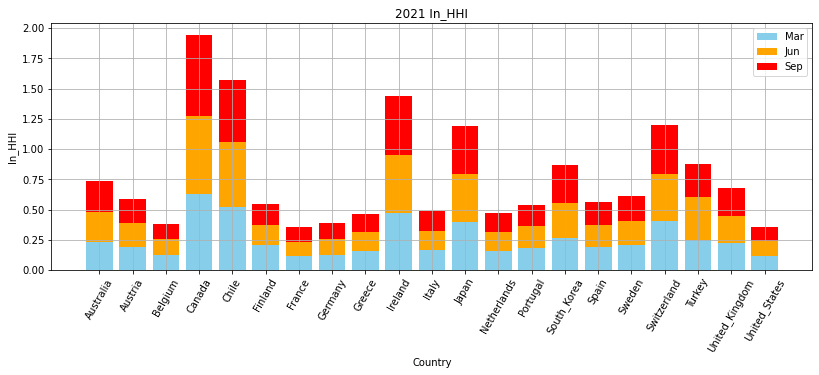

In [154]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2021 In_HHI')
plt.bar(y,list(result_20210331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20210630.values()),color = 'orange',bottom=np.array(list(result_20210331.values())), label = 'Jun')
plt.bar(y,list(result_20210930.values()),color = 'red',bottom=np.array(list(result_20210630.values()))+np.array(list(result_20210331.values())), label = 'Sep')

plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right') 
# plt.ylim(-5,5)
plt.show()

### 2020

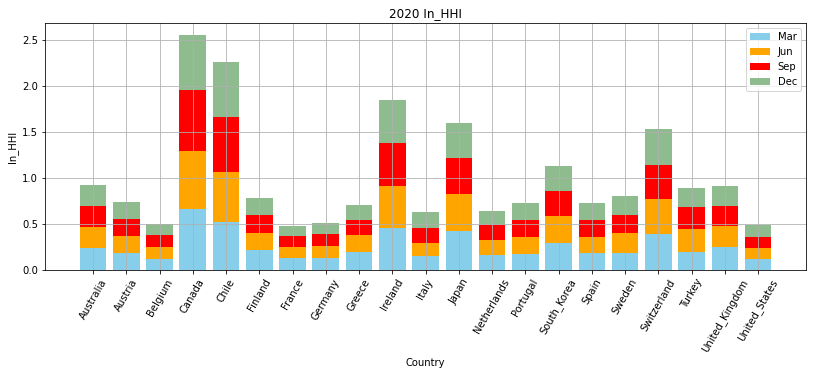

In [155]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2020 In_HHI')
plt.bar(y,list(result_20200331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20200630.values()),color = 'orange',bottom=np.array(list(result_20200331.values())), label = 'Jun')
plt.bar(y,list(result_20200930.values()),color = 'red',bottom=np.array(list(result_20200630.values()))+np.array(list(result_20200331.values())), label = 'Sep')
plt.bar(y,list(result_20201231.values()),color = 'darkseagreen',bottom=np.array(list(result_20200630.values()))+np.array(list(result_20200930.values()))+np.array(list(result_20200331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right') 
# plt.ylim(-5,5)
plt.show()

### 2019

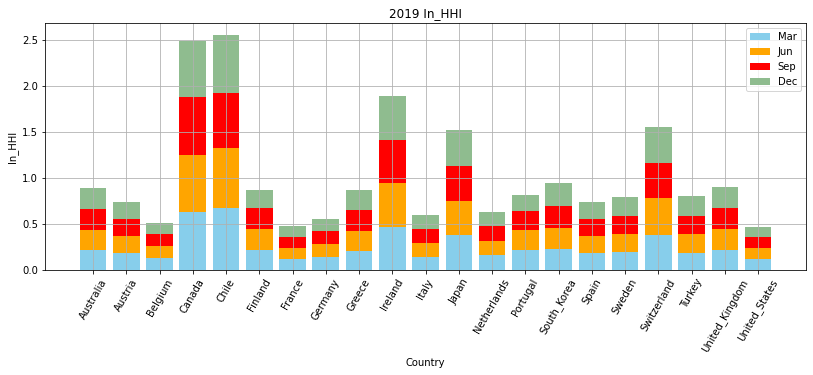

In [156]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2019 In_HHI')
plt.bar(y,list(result_20190331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20190630.values()),color = 'orange',bottom=np.array(list(result_20190331.values())), label = 'Jun')
plt.bar(y,list(result_20190930.values()),color = 'red',bottom=np.array(list(result_20190630.values()))+np.array(list(result_20190331.values())), label = 'Sep')
plt.bar(y,list(result_20191231.values()),color = 'darkseagreen',bottom=np.array(list(result_20190630.values()))+np.array(list(result_20190930.values()))+np.array(list(result_20190331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right') 
# plt.ylim(-5,5)
plt.show()

### 2018

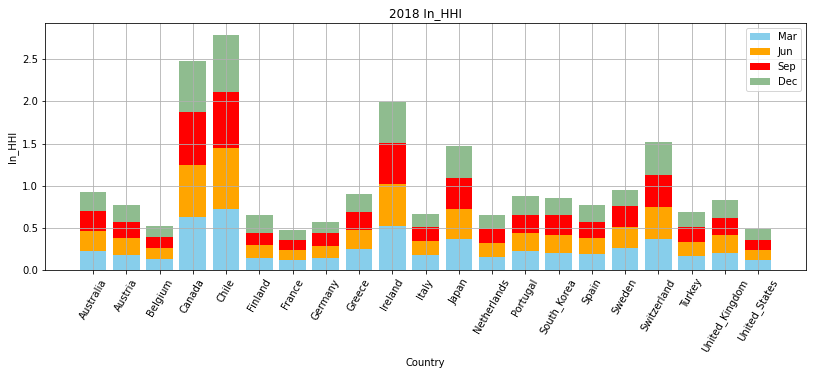

In [157]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2018 In_HHI')
plt.bar(y,list(result_20180331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20180630.values()),color = 'orange',bottom=np.array(list(result_20180331.values())), label = 'Jun')
plt.bar(y,list(result_20180930.values()),color = 'red',bottom=np.array(list(result_20180630.values()))+np.array(list(result_20180331.values())), label = 'Sep')
plt.bar(y,list(result_20181231.values()),color = 'darkseagreen',bottom=np.array(list(result_20180630.values()))+np.array(list(result_20180930.values()))+np.array(list(result_20180331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2017

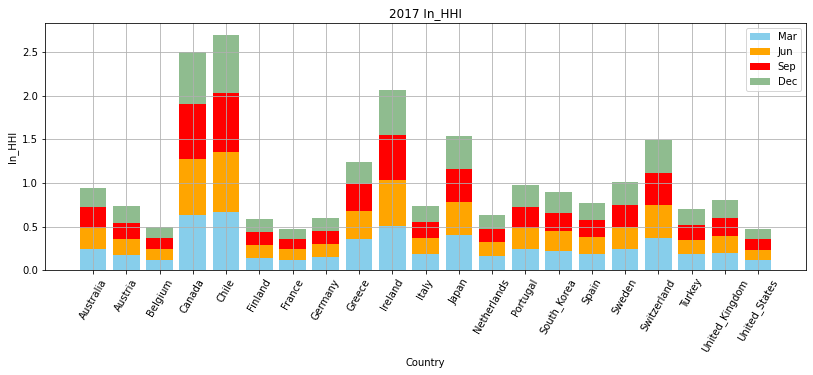

In [158]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2017 In_HHI')
plt.bar(y,list(result_20170331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20170630.values()),color = 'orange',bottom=np.array(list(result_20170331.values())), label = 'Jun')
plt.bar(y,list(result_20170930.values()),color = 'red',bottom=np.array(list(result_20170630.values()))+np.array(list(result_20170331.values())), label = 'Sep')
plt.bar(y,list(result_20171231.values()),color = 'darkseagreen',bottom=np.array(list(result_20170630.values()))+np.array(list(result_20170930.values()))+np.array(list(result_20170331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2016

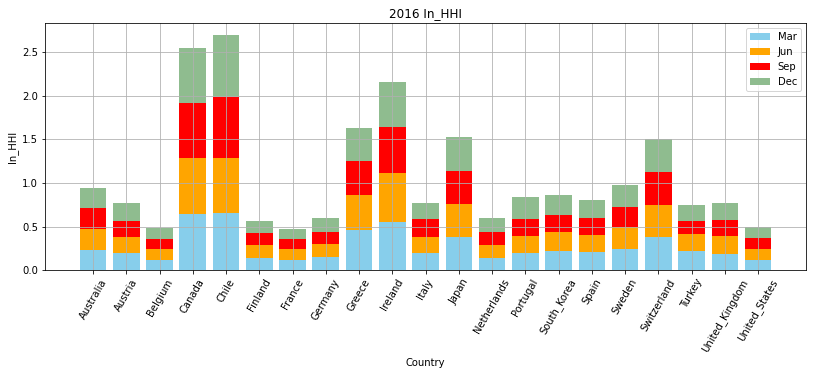

In [159]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2016 In_HHI')
plt.bar(y,list(result_20160331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20160630.values()),color = 'orange',bottom=np.array(list(result_20160331.values())), label = 'Jun')
plt.bar(y,list(result_20160930.values()),color = 'red',bottom=np.array(list(result_20160630.values()))+np.array(list(result_20160331.values())), label = 'Sep')
plt.bar(y,list(result_20161231.values()),color = 'darkseagreen',bottom=np.array(list(result_20160630.values()))+np.array(list(result_20160930.values()))+np.array(list(result_20160331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2015

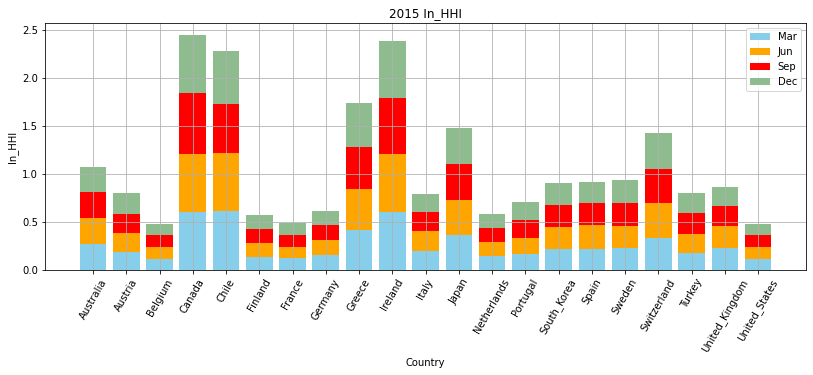

In [160]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(result_20210930.keys())
plt.xlabel("Country")
plt.ylabel("In_HHI")
plt.title('2015 In_HHI')
plt.bar(y,list(result_20150331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(result_20150630.values()),color = 'orange',bottom=np.array(list(result_20150331.values())), label = 'Jun')
plt.bar(y,list(result_20150930.values()),color = 'red',bottom=np.array(list(result_20150630.values()))+np.array(list(result_20150331.values())), label = 'Sep')
plt.bar(y,list(result_20151231.values()),color = 'darkseagreen',bottom=np.array(list(result_20150630.values()))+np.array(list(result_20150930.values()))+np.array(list(result_20150331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### Out_HHI

In [161]:
def calculate_out_HHI(data):
    claims_result = {}
    group = data.groupby('lender')
    df1 = group['claims_held'].sum()
    for key, value in group:
        if key in df1.index:
            claims_result[key] = sum((value['claims_held']/ df1[key])**2)
    return claims_result

In [162]:
out_20210930 = calculate_out_HHI(data_20210930)
print(out_20210930)

{'Australia': 0.18698166438747288, 'Austria': 0.27555084495685384, 'Belgium': 0.4853411731254113, 'Canada': 0.20408811561392143, 'Chile': 0.52788547659523, 'Finland': 0.21416961203805054, 'France': 0.1467306247858121, 'Germany': 0.12555789115127672, 'Greece': 0.14579094685664828, 'India': 0.22595723233111997, 'Ireland': 0.11202580495876424, 'Italy': 0.27744846357171093, 'Japan': 0.26807868350437136, 'Netherlands': 0.13181843391986414, 'Portugal': 0.5266022177980461, 'South_Korea': 0.2523026109710488, 'Spain': 0.14026201839680286, 'Sweden': 0.15056027709411562, 'Switzerland': 0.14012425601675388, 'Turkey': 0.2832642568225912, 'United_Kingdom': 0.12812141011236178, 'United_States': 0.1723668301440487}


In [163]:
out_20210930 = calculate_out_HHI(data_20210930)
out_20210630 = calculate_out_HHI(data_20210630)
out_20210331 = calculate_out_HHI(data_20210331)
out_20201231 = calculate_out_HHI(data_20201231)
out_20200930 = calculate_out_HHI(data_20200930)
out_20200630 = calculate_out_HHI(data_20200630)
out_20200331 = calculate_out_HHI(data_20200331)
out_20191231 = calculate_out_HHI(data_20191231)
out_20190930 = calculate_out_HHI(data_20190930)
out_20190630 = calculate_out_HHI(data_20190630)
out_20190331 = calculate_out_HHI(data_20190331)
out_20181231 = calculate_out_HHI(data_20181231)
out_20180930 = calculate_out_HHI(data_20180930)
out_20180630 = calculate_out_HHI(data_20180630)
out_20180331 = calculate_out_HHI(data_20180331)
out_20171231 = calculate_out_HHI(data_20171231)
out_20170930 = calculate_out_HHI(data_20170930)
out_20170630 = calculate_out_HHI(data_20170630)
out_20170331 = calculate_out_HHI(data_20170331)
out_20161231 = calculate_out_HHI(data_20161231)
out_20160930 = calculate_out_HHI(data_20160930)
out_20160630 = calculate_out_HHI(data_20160630)
out_20160331 = calculate_out_HHI(data_20160331)
out_20151231 = calculate_out_HHI(data_20151231)
out_20150930 = calculate_out_HHI(data_20150930)
out_20150630 = calculate_out_HHI(data_20150630)
out_20150331 = calculate_out_HHI(data_20150331)

### Out_HHI

### 2021

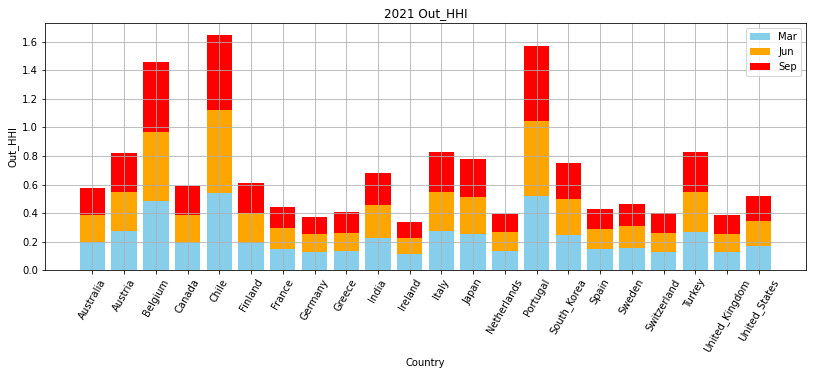

In [164]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2021 Out_HHI')
plt.bar(y,list(out_20210331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(out_20210630.values()),color = 'orange',bottom=np.array(list(out_20210331.values())), label = 'Jun')
plt.bar(y,list(out_20210930.values()),color = 'red',bottom=np.array(list(out_20210630.values()))+np.array(list(out_20210331.values())), label = 'Sep')

plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right') 
# plt.ylim(-5,5)
plt.show()

### 2020

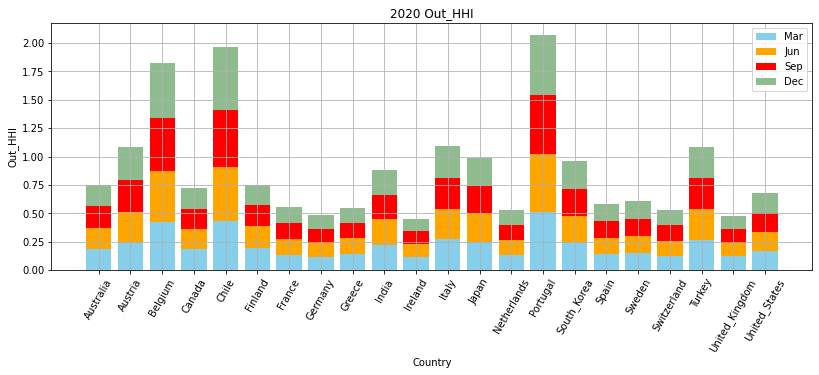

In [165]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2020 Out_HHI')
plt.bar(y,list(out_20200331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(out_20200630.values()),color = 'orange',bottom=np.array(list(out_20200331.values())), label = 'Jun')
plt.bar(y,list(out_20200930.values()),color = 'red',bottom=np.array(list(out_20200630.values()))+np.array(list(out_20200331.values())), label = 'Sep')
plt.bar(y,list(out_20201231.values()),color = 'darkseagreen',bottom=np.array(list(out_20200630.values()))+np.array(list(out_20200930.values()))+np.array(list(out_20200331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2019

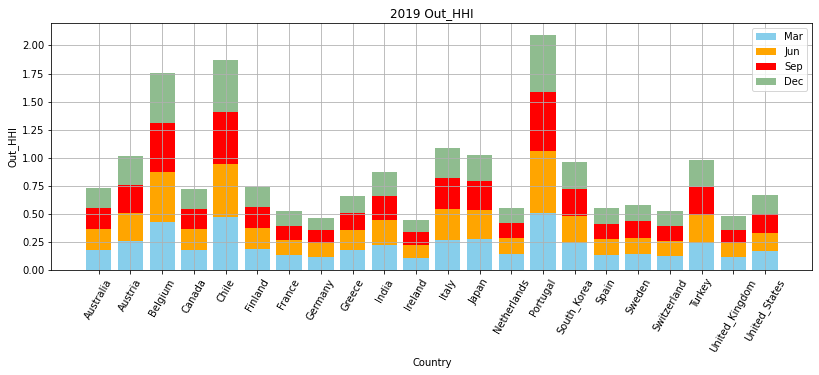

In [166]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2019 Out_HHI')
plt.bar(y,list(out_20190331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(out_20190630.values()),color = 'orange',bottom=np.array(list(out_20190331.values())), label = 'Jun')
plt.bar(y,list(out_20190930.values()),color = 'red',bottom=np.array(list(out_20190630.values()))+np.array(list(out_20190331.values())), label = 'Sep')
plt.bar(y,list(out_20191231.values()),color = 'darkseagreen',bottom=np.array(list(out_20190630.values()))+np.array(list(out_20190930.values()))+np.array(list(out_20190331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2018

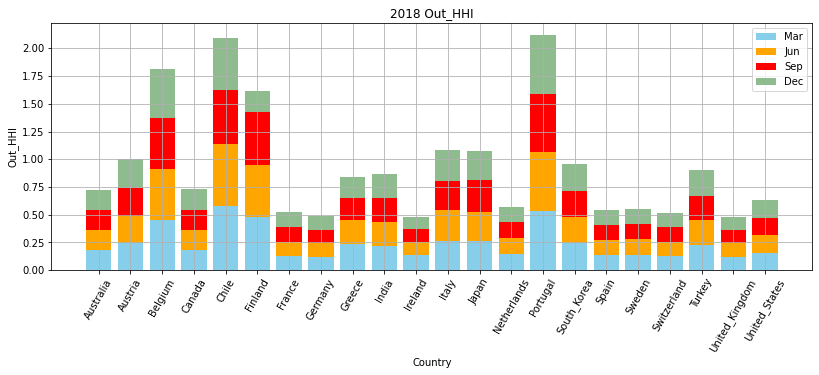

In [167]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2018 Out_HHI')
plt.bar(y,list(out_20180331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(out_20180630.values()),color = 'orange',bottom=np.array(list(out_20180331.values())), label = 'Jun')
plt.bar(y,list(out_20180930.values()),color = 'red',bottom=np.array(list(out_20180630.values()))+np.array(list(out_20180331.values())), label = 'Sep')
plt.bar(y,list(out_20181231.values()),color = 'darkseagreen',bottom=np.array(list(out_20180630.values()))+np.array(list(out_20180930.values()))+np.array(list(out_20180331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2017

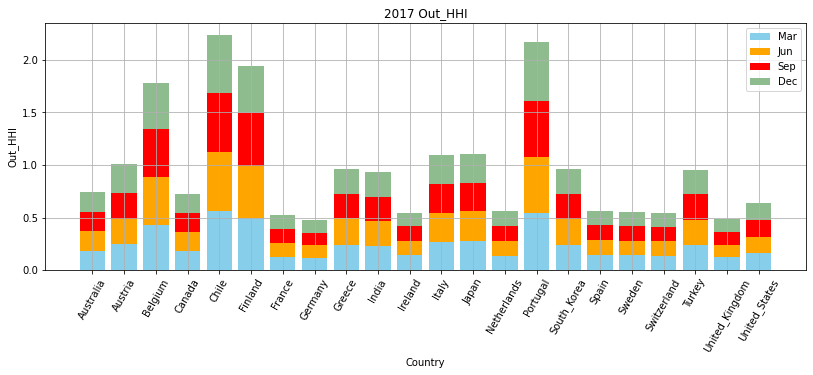

In [168]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2017 Out_HHI')
plt.bar(y,list(out_20170331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(out_20170630.values()),color = 'orange',bottom=np.array(list(out_20170331.values())), label = 'Jun')
plt.bar(y,list(out_20170930.values()),color = 'red',bottom=np.array(list(out_20170630.values()))+np.array(list(out_20170331.values())), label = 'Sep')
plt.bar(y,list(out_20171231.values()),color = 'darkseagreen',bottom=np.array(list(out_20170630.values()))+np.array(list(out_20170930.values()))+np.array(list(out_20170331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### 2016

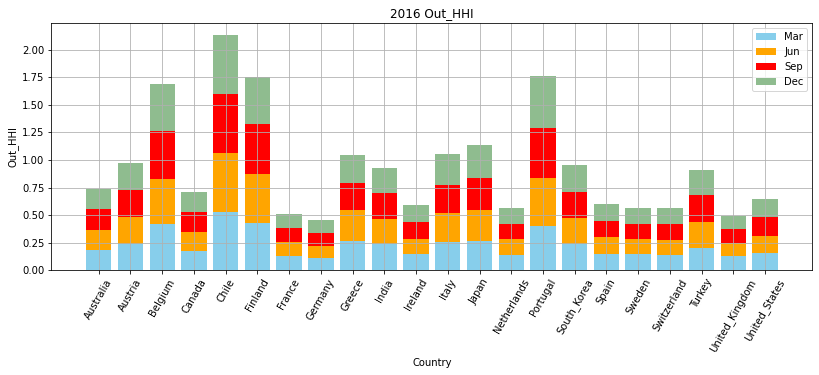

In [169]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2016 Out_HHI')
plt.bar(y,list(out_20160331.values()),color = 'skyblue', label = 'Mar')
plt.bar(y,list(out_20160630.values()),color = 'orange',bottom=np.array(list(out_20160331.values())), label = 'Jun')
plt.bar(y,list(out_20160930.values()),color = 'red',bottom=np.array(list(out_20160630.values()))+np.array(list(out_20160331.values())), label = 'Sep')
plt.bar(y,list(out_20161231.values()),color = 'darkseagreen',bottom=np.array(list(out_20160630.values()))+np.array(list(out_20160930.values()))+np.array(list(out_20160331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

###  2015

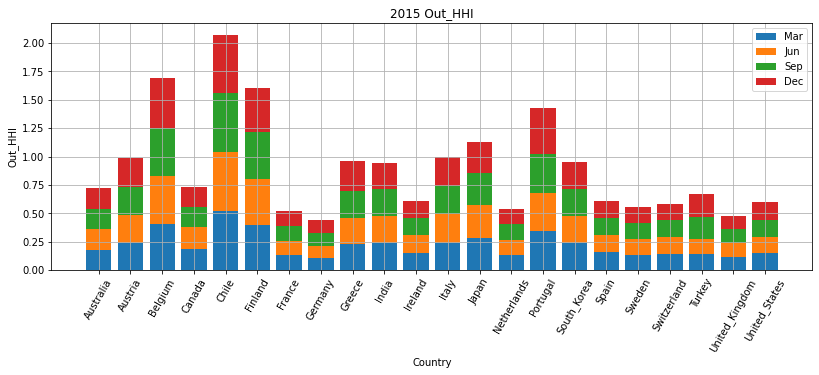

In [170]:
plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
y=list(out_20210930.keys())
plt.xlabel("Country")
plt.ylabel("Out_HHI")
plt.title('2015 Out_HHI')
plt.bar(y,list(out_20150331.values()), label = 'Mar')
plt.bar(y,list(out_20150630.values()),bottom=np.array(list(out_20150331.values())), label = 'Jun')
plt.bar(y,list(out_20150930.values()),bottom=np.array(list(out_20150630.values()))+np.array(list(out_20150331.values())), label = 'Sep')
plt.bar(y,list(out_20151231.values()),bottom=np.array(list(out_20150630.values()))+np.array(list(out_20150930.values()))+np.array(list(out_20150331.values())), label = 'Dec')


plt.grid()
plt.xticks(rotation=60)
plt.legend(loc = 'upper right')
# plt.ylim(-5,5)
plt.show()

### calculate HHI

In [171]:
def calculate_HHI(data):
    claims_result = {}
    group = data.groupby('borrower')
    df1 = group['claims_held'].sum()
    for key, value in group:
        if key in df1.index:
            claims_result[key] = sum((value['claims_held']/ df1[key])**2)
    return claims_result

In [172]:
calculate_HHI(data_20210930)

{'Australia': 0.26128553630866447,
 'Austria': 0.19622484590171485,
 'Belgium': 0.12904183818787676,
 'Canada': 0.6716777890439867,
 'Chile': 0.5067186400671309,
 'Finland': 0.1735591379848714,
 'France': 0.12270139157752913,
 'Germany': 0.1315364768135792,
 'Greece': 0.15333296532591686,
 'Ireland': 0.48654672999046145,
 'Italy': 0.16263664526429036,
 'Japan': 0.40392891067940184,
 'Netherlands': 0.15893462072554143,
 'Portugal': 0.17480571428356537,
 'South_Korea': 0.3136462889303413,
 'Spain': 0.19082175426569292,
 'Sweden': 0.20302480085019542,
 'Switzerland': 0.40371771292085434,
 'Turkey': 0.266860438500687,
 'United_Kingdom': 0.2342986228375953,
 'United_States': 0.11576504345015586}

#### in-degree and out_degree distribution

In [173]:
import powerlaw 
import numpy as np 
import community 
import matplotlib.patches as mpatches
import operator 
import collections
import sys
from tqdm import tqdm
import random

In [174]:
in_degrees_20210930 = G_20210930.in_degree()  # dictionary node:degree
out_degrees_20210930 = G_20210930.out_degree()

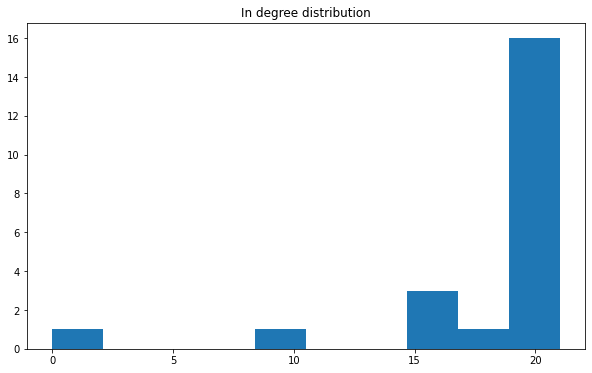

In [175]:
plt.figure(figsize=(10,6))
plt.hist(dict(in_degrees_20210930()).values(), bins=10, density=False)
plt.title('In degree distribution')
# plt.savefig('in-degree.png')
plt.show()

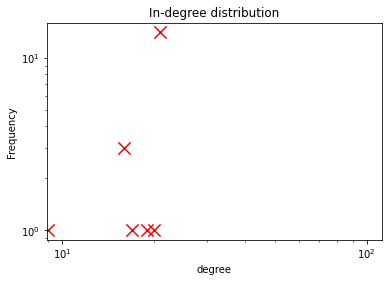

Calculating best minimal value for power law fit


Assuming nested distributions


exponential nan, exponential 1.0
power_law -1.032568929289365, lognormal 0.3018056748073815
exponential -2.616356441374317, power_lab 0.008887372763867838
alpha = 2.872824704933378
xmin = 1.0


D:\Anaconda\Lib\site-packages\powerlaw.py:1818: RuntimeWarning: invalid value encountered in double_scalars
  R = R/sqrt(n*variance)
D:\Anaconda\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [176]:
#####Plot log-log of in-degree distribution
plt.yscale('log') 
plt.xscale('log') 

in_degree_counts = dict(collections.Counter(dict(in_degrees_20210930()).values()))

#Create scatter plot with degree on x-axis and counts on y-axis
plt.scatter(in_degree_counts.keys(), in_degree_counts.values(), c='r', marker='x', s=150)
# plt.xlim((.9, 1e3)) #set x axis limits
# plt.ylim((0, 1e3)) #set y axis limits
plt.xlabel('degree')
plt.ylabel('Frequency')
plt.title('In-degree distribution')
plt.show()

data = np.array(list(in_degree_counts.values()),dtype=np.float32)
fit = powerlaw.Fit(data)

R, p = fit.distribution_compare('exponential','exponential',  normalized_ratio=True)
print("exponential {}, exponential {}".format(R, p))
R, p = fit.distribution_compare('power_law','lognormal',  normalized_ratio=True)
print("power_law {}, lognormal {}".format(R, p))
R, p = fit.distribution_compare('exponential','power_law',  normalized_ratio=True)
print("exponential {}, power_lab {}".format(R, p))

print("alpha = {}".format(fit.power_law.alpha))
print("xmin = {}".format(fit.power_law.xmin))


#### diameter

##### 20210930

In [177]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20210630

In [178]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210630: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210630, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20210331

In [179]:
#### average path length
N = G_20210331.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210331: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210331, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20201231

In [180]:
#### average path length
N = G_20201231.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20201231: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20201231, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20200930

In [181]:
#### average path length
N = G_20200930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20200930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20200930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20200630

In [182]:
#### average path length
N = G_20200630.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20200630: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20200630, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20200331

In [183]:
#### average path length
N = G_20200331.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20200331: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20200331, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


##### 20191231

In [184]:
#### average path length
N = G_20191231.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20191231: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20191231, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [185]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [186]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [187]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [188]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [189]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [190]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [191]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [192]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [193]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [194]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [195]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [196]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [197]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [198]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [199]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [200]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [201]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [202]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [203]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


In [204]:
#### average path length
N = G_20210930.order()
if not 'avg_path_length' in globals(): 
    max_path_length = 0
    total = 0.0
    for n in G_20210930: #iterate over all nodes
        path_length=nx.single_source_shortest_path_length(G_20210930, n) 
        total += sum(path_length.values()) #total of all shortest paths from n
    
        if max(path_length.values()) > max_path_length: #keep track of longest shortest path 
            max_path_length = max(path_length.values())         
    avg_path_length = total / (N*(N - 1)) #calculate average.

print("Average path length %f" % (avg_path_length)) 
print("Network Diameter %d" % (max_path_length)) 

Average path length 1.028139
Network Diameter 2


### Centrality distribution

#### 2021.09

In [205]:
bet_cen = nx.betweenness_centrality(G_20210930)
clo_cen = nx.closeness_centrality(G_20210930)
eig_cen = nx.eigenvector_centrality(G_20210930)

#### 10 topest betweenness centrality nodes

In [206]:
###Histogram of in-degrees
print("Betweenness mean: %f" % (np.array(list(bet_cen.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))

Betweenness mean: 0.003680
1: ('Germany', 0.006924821210535497)
2: ('Spain', 0.006924821210535497)
3: ('France', 0.006924821210535497)
4: ('United_Kingdom', 0.006924821210535497)
5: ('Ireland', 0.006924821210535497)
6: ('Italy', 0.006068812140240713)
7: ('United_States', 0.006068812140240713)
8: ('Austria', 0.0060564931100645395)
9: ('Canada', 0.00450069771498343)
10: ('Australia', 0.003651011686725973)


#### 10 topest closeness centrality nodes

In [207]:
print("Closeness mean: %f" % (np.array(list(clo_cen.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))

Closeness mean: 0.898501
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Ireland', 1.0)
9: ('Italy', 1.0)
10: ('Japan', 1.0)


#### 10 topest Eigenvector centrality nodes

In [208]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))

Eigenvector mean: 0.206321
1: ('France', 0.23137815034001347)
2: ('United_Kingdom', 0.23137815034001347)
3: ('Ireland', 0.23137815034001347)
4: ('Italy', 0.23137815034001347)
5: ('Japan', 0.23137815034001347)
6: ('South_Korea', 0.23137815034001347)
7: ('Portugal', 0.23137815034001347)
8: ('Australia', 0.2313781503400134)
9: ('Austria', 0.2313781503400134)
10: ('Belgium', 0.2313781503400134)


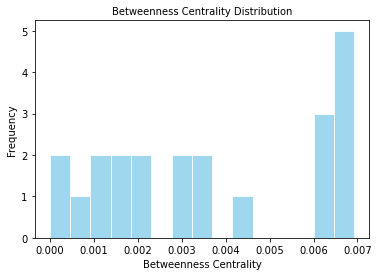

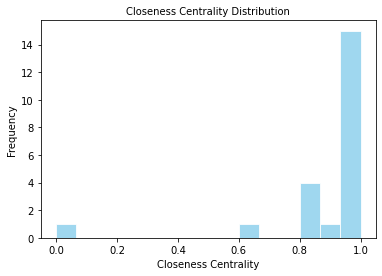

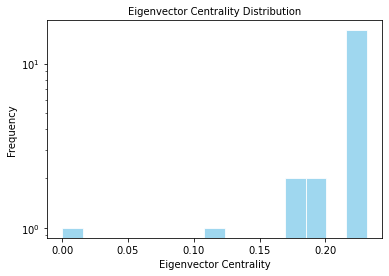

In [209]:
#plt.bar(center, hist)

plt.tick_params(labelsize = 10)
plt.hist(bet_cen.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()

In [344]:
bet_cen

{'Australia': 0.003651011686725973,
 'Austria': 0.0060564931100645395,
 'Belgium': 0.002797182975754404,
 'Canada': 0.00450069771498343,
 'Switzerland': 0.00046626984126984123,
 'Chile': 0.0,
 'Germany': 0.006924821210535497,
 'Spain': 0.006924821210535497,
 'Finland': 0.0021098246991104134,
 'France': 0.006924821210535497,
 'United_Kingdom': 0.006924821210535497,
 'Greece': 0.001297095761381476,
 'Ireland': 0.006924821210535497,
 'India': 0.0,
 'Italy': 0.006068812140240713,
 'Japan': 0.003651011686725973,
 'South_Korea': 0.002797182975754404,
 'Netherlands': 0.0016060526774812488,
 'Portugal': 0.002156266352694924,
 'Sweden': 0.0017991234955520672,
 'Turkey': 0.001302437641723356,
 'United_States': 0.006068812140240713}

In [346]:
x = list(bet_cen.keys())
y = list(bet_cen.values())
print(x)
print(y)

['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland', 'Chile', 'Germany', 'Spain', 'Finland', 'France', 'United_Kingdom', 'Greece', 'Ireland', 'India', 'Italy', 'Japan', 'South_Korea', 'Netherlands', 'Portugal', 'Sweden', 'Turkey', 'United_States']
[0.003651011686725973, 0.0060564931100645395, 0.002797182975754404, 0.00450069771498343, 0.00046626984126984123, 0.0, 0.006924821210535497, 0.006924821210535497, 0.0021098246991104134, 0.006924821210535497, 0.006924821210535497, 0.001297095761381476, 0.006924821210535497, 0.0, 0.006068812140240713, 0.003651011686725973, 0.002797182975754404, 0.0016060526774812488, 0.002156266352694924, 0.0017991234955520672, 0.001302437641723356, 0.006068812140240713]


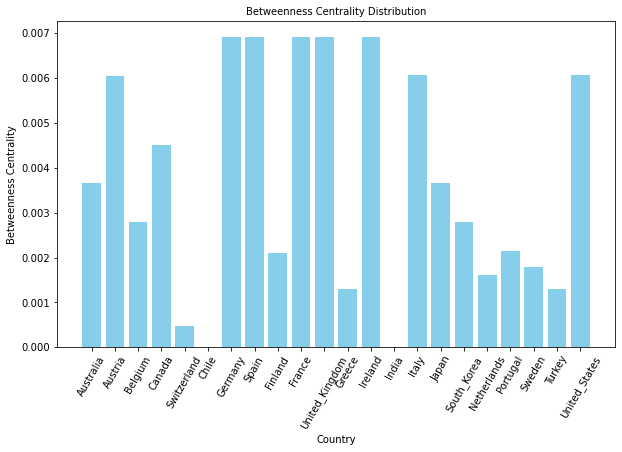

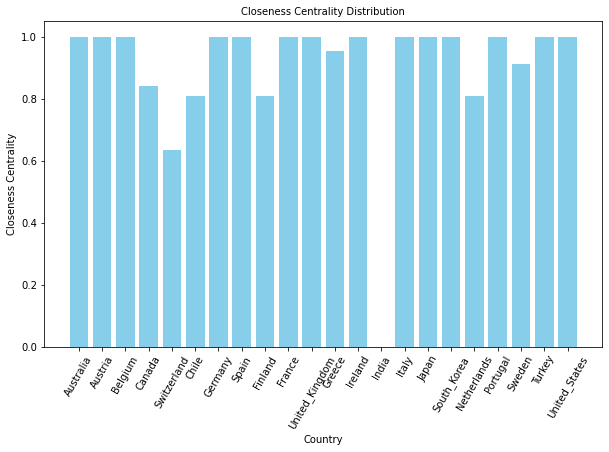

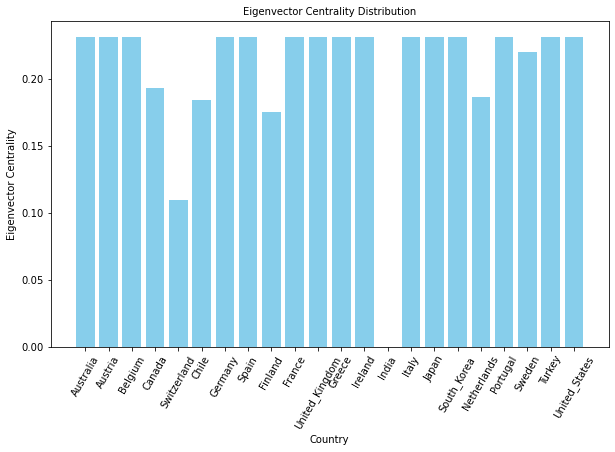

In [355]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen.keys()),list(bet_cen.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen.keys()),list(clo_cen.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen.keys()),list(eig_cen.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

#### 2021.06

In [210]:
bet_cen_202106 = nx.betweenness_centrality(G_20210630)
clo_cen_202106 = nx.closeness_centrality(G_20210630)
eig_cen_202106 = nx.eigenvector_centrality(G_20210630)

#### 10 topest betweenness centrality nodes

In [211]:
###Histogram of in-degrees
print("Betweenness mean: %f" % (np.array(list(bet_cen_202106.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_202106.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))

Betweenness mean: 0.003680
1: ('Germany', 0.007147353308067595)
2: ('Spain', 0.007147353308067595)
3: ('France', 0.007147353308067595)
4: ('United_Kingdom', 0.007147353308067595)
5: ('Ireland', 0.007147353308067595)
6: ('Austria', 0.006446912875484304)
7: ('Italy', 0.0060080164544450265)
8: ('United_States', 0.0060080164544450265)
9: ('Australia', 0.003840475001189287)
10: ('Japan', 0.003840475001189287)


#### 10 topest closeness centrality nodes

In [212]:
print("Closeness mean: %f" % (np.array(list(clo_cen_202106.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_202106.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))



Closeness mean: 0.898610
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Ireland', 1.0)
9: ('Italy', 1.0)
10: ('Japan', 1.0)


#### 10 topest Eigenvector centrality nodes

In [213]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206321
1: ('France', 0.23137815034001347)
2: ('United_Kingdom', 0.23137815034001347)
3: ('Ireland', 0.23137815034001347)
4: ('Italy', 0.23137815034001347)
5: ('Japan', 0.23137815034001347)
6: ('South_Korea', 0.23137815034001347)
7: ('Portugal', 0.23137815034001347)
8: ('Australia', 0.2313781503400134)
9: ('Austria', 0.2313781503400134)
10: ('Belgium', 0.2313781503400134)


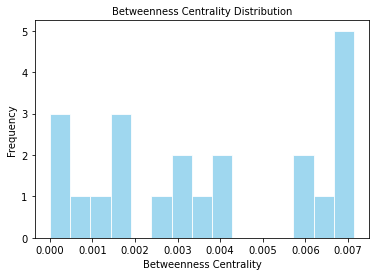

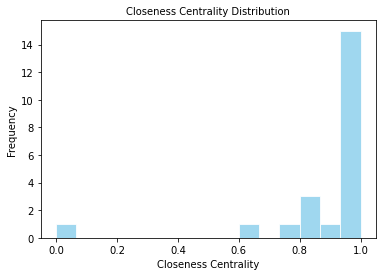

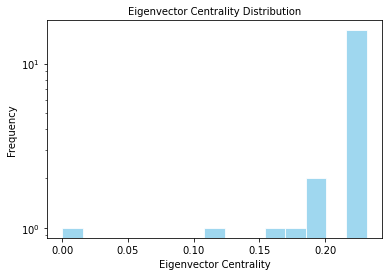

In [214]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_202106.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_202106.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_202106.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


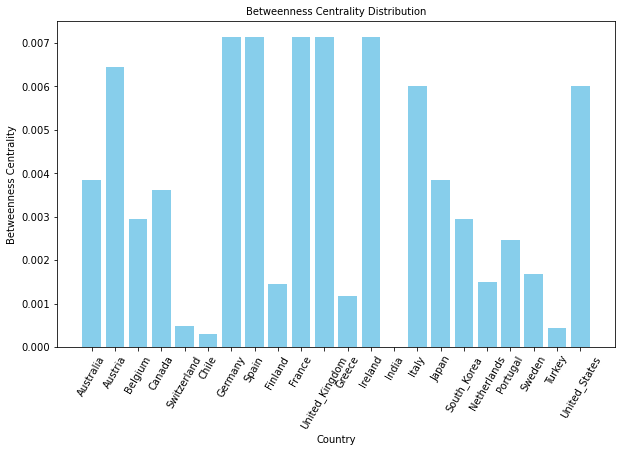

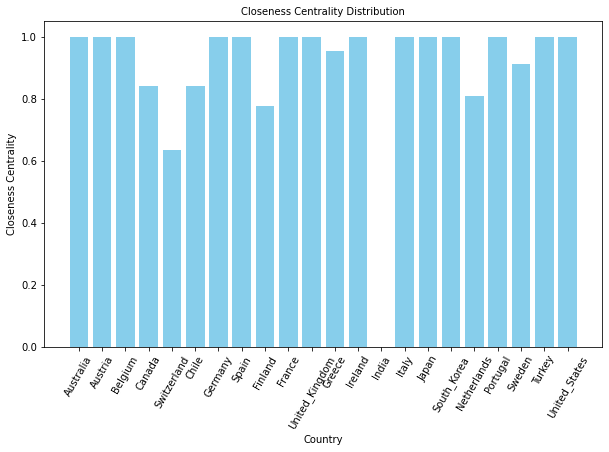

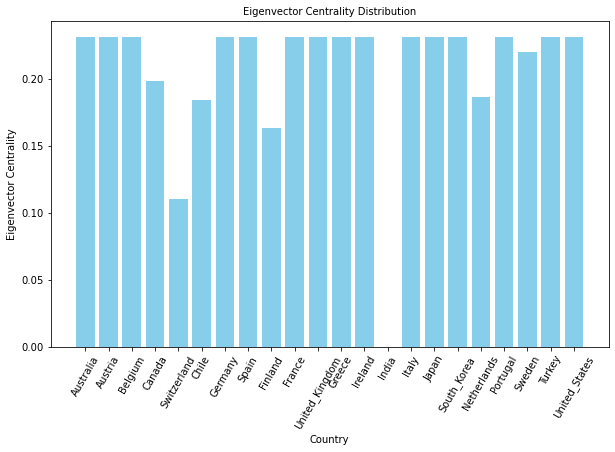

In [356]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_202106.keys()),list(bet_cen_202106.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_202106.keys()),list(clo_cen_202106.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_202106.keys()),list(eig_cen_202106.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

#### 2021.03

In [215]:
bet_cen_202103 = nx.betweenness_centrality(G_20210331)
clo_cen_202103 = nx.closeness_centrality(G_20210331)
eig_cen_202103 = nx.eigenvector_centrality(G_20210331)

#### 10 topest betweenness centrality nodes

In [216]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_202103.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_202103.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))

Betweenness mean: 0.003896
1: ('Germany', 0.0075951991130562575)
2: ('Spain', 0.0075951991130562575)
3: ('France', 0.0075951991130562575)
4: ('United_Kingdom', 0.0075951991130562575)
5: ('Ireland', 0.0075951991130562575)
6: ('Austria', 0.006696345982060269)
7: ('United_States', 0.006455862259433689)
8: ('Italy', 0.0055754331647188795)
9: ('Australia', 0.004245803799375228)
10: ('Japan', 0.004245803799375228)


#### 10 topest closeness centrality nodes

In [217]:
print("Closeness mean: %f" % (np.array(list(clo_cen_202103.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_202103.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.895075
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Ireland', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [218]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_202103.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_202103.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206243
1: ('Australia', 0.23209009784138962)
2: ('Austria', 0.23209009784138962)
3: ('Belgium', 0.23209009784138962)
4: ('Germany', 0.23209009784138962)
5: ('Spain', 0.23209009784138962)
6: ('France', 0.23209009784138962)
7: ('United_Kingdom', 0.23209009784138962)
8: ('Ireland', 0.23209009784138962)
9: ('Japan', 0.23209009784138962)
10: ('South_Korea', 0.23209009784138962)


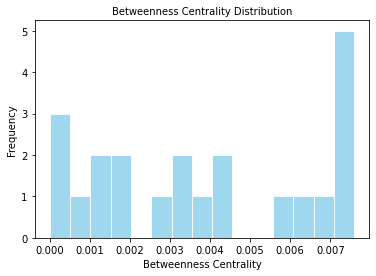

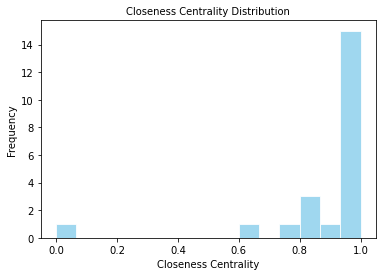

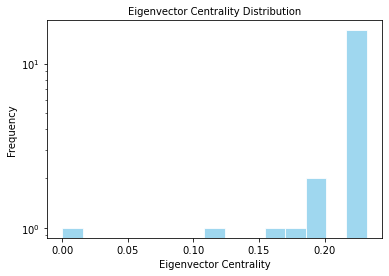

In [219]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_202103.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_202103.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_202103.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


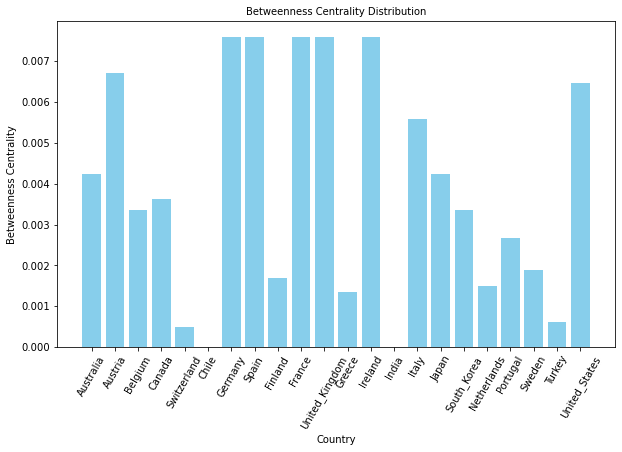

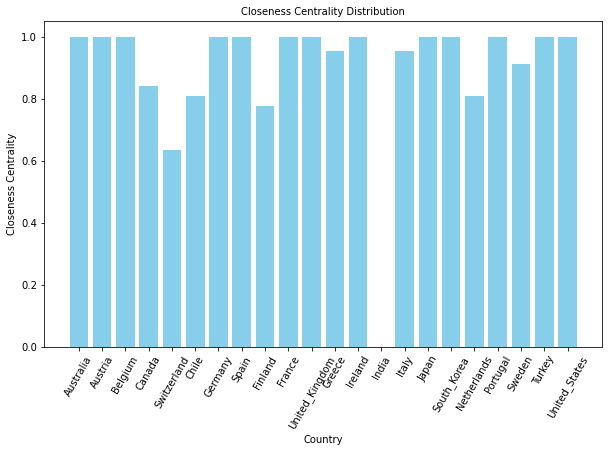

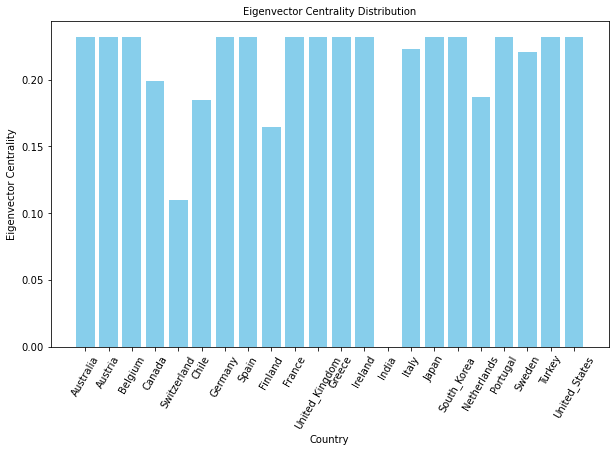

In [357]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_202103.keys()),list(bet_cen_202103.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_202103.keys()),list(clo_cen_202103.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_202103.keys()),list(eig_cen_202103.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 2020.12

In [220]:
bet_cen_202012 = nx.betweenness_centrality(G_20201231)
clo_cen_202012 = nx.closeness_centrality(G_20201231)
eig_cen_202012 = nx.eigenvector_centrality(G_20201231)

#### 10 topest betweenness centrality nodes

In [221]:
###Histogram of in-degrees
print("Betweenness mean: %f" % (np.array(list(bet_cen_202012.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_202012.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003571
1: ('Germany', 0.006970199113056257)
2: ('Spain', 0.006970199113056257)
3: ('France', 0.006970199113056257)
4: ('United_Kingdom', 0.006970199113056257)
5: ('Ireland', 0.006970199113056257)
6: ('Austria', 0.0062697586804729664)
7: ('Italy', 0.005830862259433689)
8: ('United_States', 0.005830862259433689)
9: ('Australia', 0.0036633208061779493)
10: ('Japan', 0.0036633208061779493)


#### 10 topest closeness centrality nodes

In [222]:
print("Closeness mean: %f" % (np.array(list(clo_cen_202012.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_202012.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))



Closeness mean: 0.900676
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Greece', 1.0)
9: ('Ireland', 1.0)
10: ('Italy', 1.0)


#### 10 topest Eigenvector centrality nodes

In [223]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_202012.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_202012.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206234
1: ('Turkey', 0.23158724644724873)
2: ('United_States', 0.23158724644724873)
3: ('Australia', 0.23158724644724868)
4: ('Austria', 0.23158724644724868)
5: ('Belgium', 0.23158724644724868)
6: ('Germany', 0.23158724644724868)
7: ('Spain', 0.23158724644724868)
8: ('France', 0.23158724644724868)
9: ('United_Kingdom', 0.23158724644724868)
10: ('Greece', 0.23158724644724868)


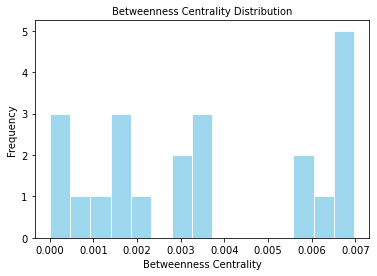

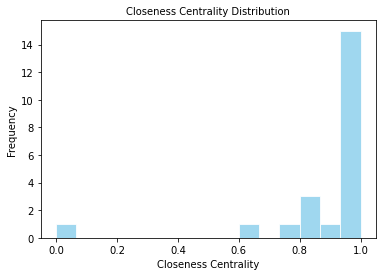

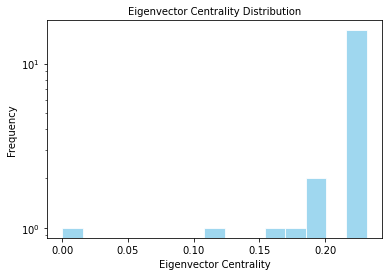

In [224]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_202012.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_202012.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_202012.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


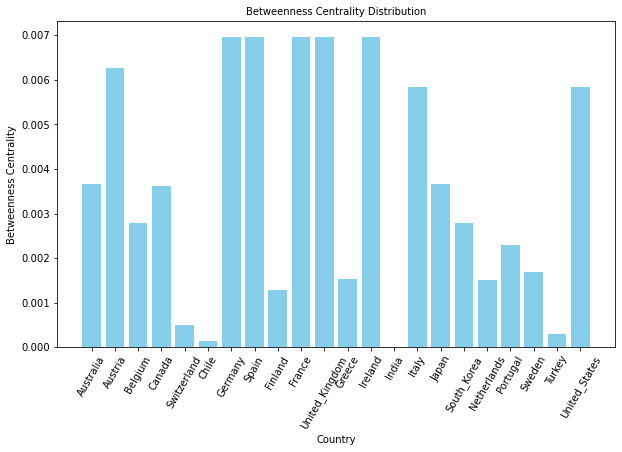

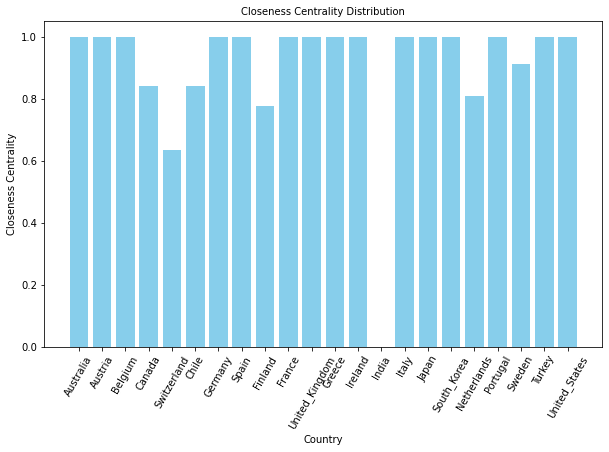

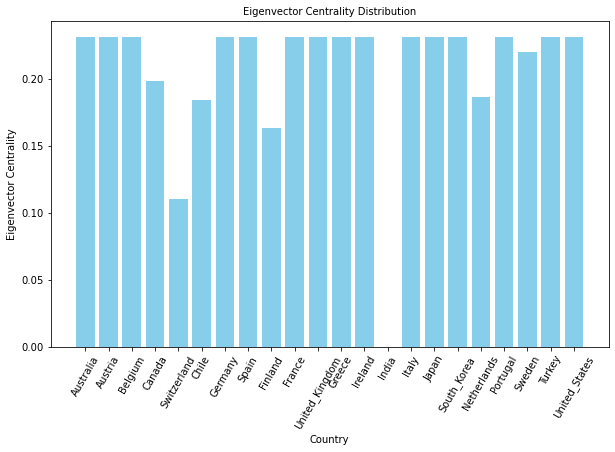

In [358]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_202012.keys()),list(bet_cen_202012.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_202012.keys()),list(clo_cen_202012.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_202012.keys()),list(eig_cen_202012.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 2020.09

In [225]:
bet_cen_202009 = nx.betweenness_centrality(G_20200930)
clo_cen_202009 = nx.closeness_centrality(G_20200930)
eig_cen_202009 = nx.eigenvector_centrality(G_20200930)

#### 10 topest betweenness centrality nodes

In [226]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_202009.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_202009.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003788
1: ('Germany', 0.007462999962999964)
2: ('Spain', 0.007462999962999964)
3: ('France', 0.007462999962999964)
4: ('United_Kingdom', 0.007462999962999964)
5: ('Austria', 0.006326120968978112)
6: ('Ireland', 0.006326120968978112)
7: ('Italy', 0.00630840059411488)
8: ('United_States', 0.00630840059411488)
9: ('Australia', 0.004156121656121657)
10: ('Japan', 0.004156121656121657)


#### 10 topest closeness centrality nodes

In [227]:
print("Closeness mean: %f" % (np.array(list(clo_cen_202009.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_202009.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.897848
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Greece', 1.0)
9: ('Ireland', 1.0)
10: ('Italy', 1.0)


#### 10 topest Eigenvector centrality nodes

In [228]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_202009.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_202009.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206148
1: ('Australia', 0.23201167947486287)
2: ('Austria', 0.23201167947486287)
3: ('Belgium', 0.23201167947486287)
4: ('Germany', 0.23201167947486287)
5: ('Spain', 0.23201167947486287)
6: ('France', 0.23201167947486287)
7: ('United_Kingdom', 0.23201167947486287)
8: ('Greece', 0.23201167947486287)
9: ('Ireland', 0.23201167947486287)
10: ('Italy', 0.23201167947486287)


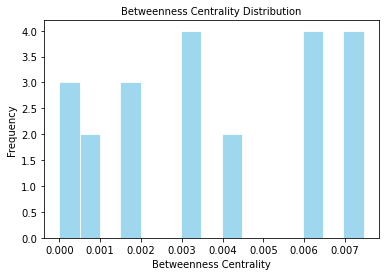

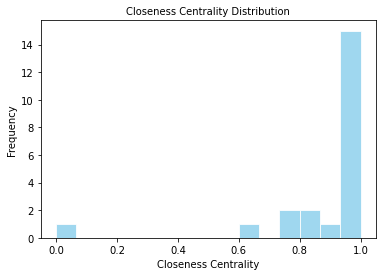

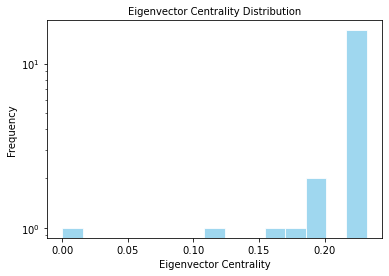

In [229]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_202009.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_202009.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_202009.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


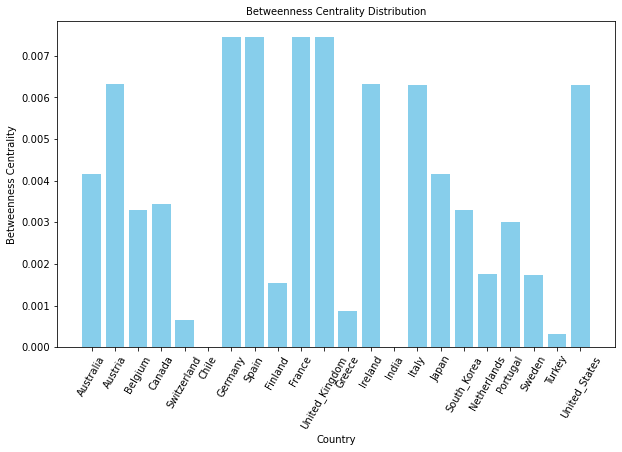

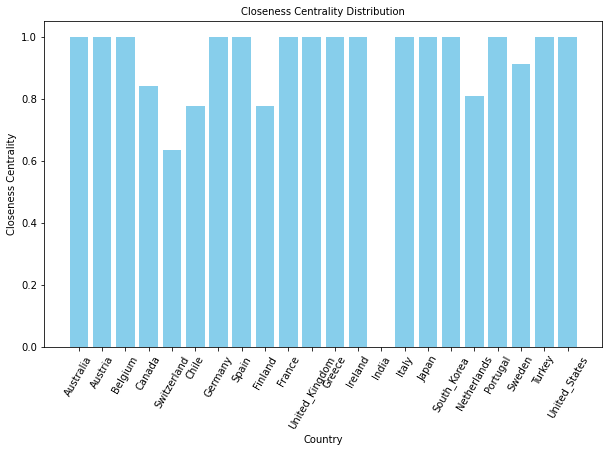

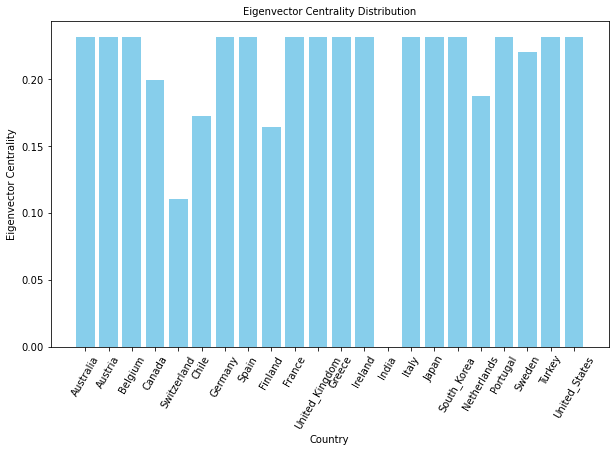

In [359]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_202009.keys()),list(bet_cen_202009.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_202009.keys()),list(clo_cen_202009.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_202009.keys()),list(eig_cen_202009.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 202006

In [230]:
bet_cen_202006 = nx.betweenness_centrality(G_20200630)
clo_cen_202006 = nx.closeness_centrality(G_20200630)
eig_cen_202006 = nx.eigenvector_centrality(G_20200630)

#### 10 topest betweenness centrality nodes

In [231]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_202006.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_202006.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003571
1: ('Germany', 0.0069557955272240984)
2: ('Spain', 0.0069557955272240984)
3: ('France', 0.0069557955272240984)
4: ('United_Kingdom', 0.0069557955272240984)
5: ('Italy', 0.0069557955272240984)
6: ('United_States', 0.00629503763432335)
7: ('Austria', 0.006040322111750683)
8: ('Ireland', 0.006040322111750683)
9: ('Australia', 0.0036158484372770094)
10: ('Japan', 0.0036158484372770094)


#### 10 topest closeness centrality nodes

In [232]:
print("Closeness mean: %f" % (np.array(list(clo_cen_202006.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_202006.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.900567
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Greece', 1.0)
9: ('Ireland', 1.0)
10: ('Italy', 1.0)


#### 10 topest Eigenvector centrality nodes

In [233]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_202006.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_202006.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))

Eigenvector mean: 0.206281
1: ('France', 0.23157748306411394)
2: ('United_Kingdom', 0.23157748306411394)
3: ('Greece', 0.23157748306411394)
4: ('Ireland', 0.23157748306411394)
5: ('Italy', 0.23157748306411394)
6: ('Japan', 0.23157748306411394)
7: ('South_Korea', 0.23157748306411394)
8: ('Portugal', 0.23157748306411394)
9: ('Turkey', 0.23157748306411394)
10: ('United_States', 0.23157748306411394)


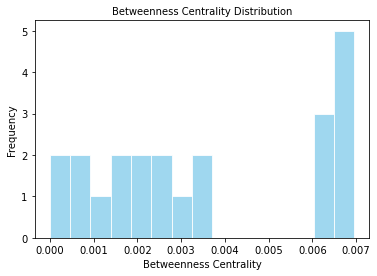

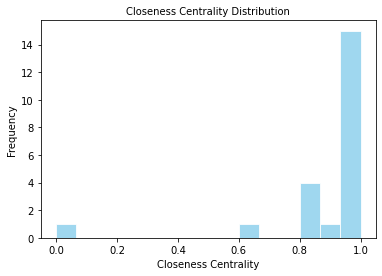

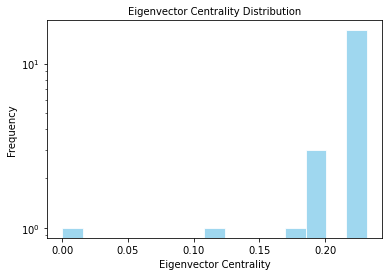

In [234]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_202006.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_202006.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_202006.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()

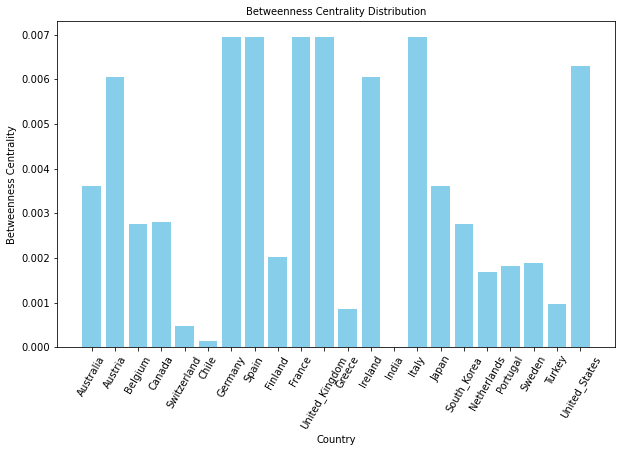

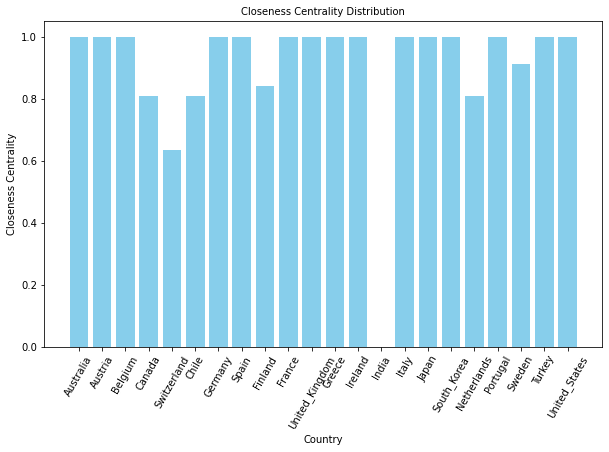

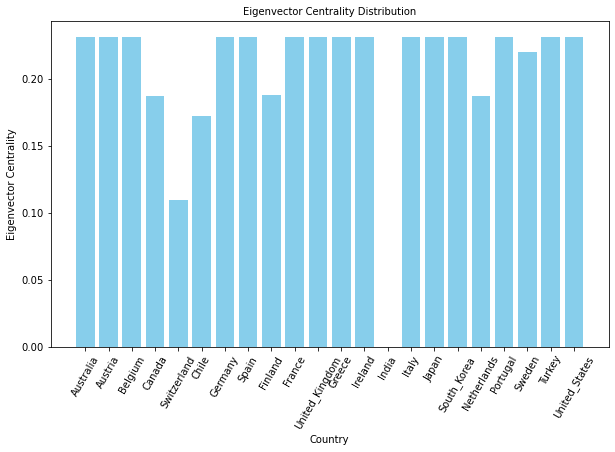

In [360]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_202006.keys()),list(bet_cen_202006.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_202006.keys()),list(clo_cen_202006.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_202006.keys()),list(eig_cen_202006.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 202003

In [235]:
bet_cen_202003 = nx.betweenness_centrality(G_20200331)
clo_cen_202003 = nx.closeness_centrality(G_20200331)
eig_cen_202003 = nx.eigenvector_centrality(G_20200331)

#### 10 topest betweenness centrality nodes

In [236]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_202003.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_202003.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003463
1: ('Germany', 0.006706421884993314)
2: ('Spain', 0.006706421884993314)
3: ('France', 0.006706421884993314)
4: ('United_Kingdom', 0.006706421884993314)
5: ('Italy', 0.006706421884993314)
6: ('United_States', 0.006045663992092565)
7: ('Austria', 0.006040322111750683)
8: ('Ireland', 0.006040322111750683)
9: ('Australia', 0.0033664747950462237)
10: ('Japan', 0.0033664747950462237)


#### 10 topest closeness centrality nodes

In [237]:
print("Closeness mean: %f" % (np.array(list(clo_cen_202003.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_202003.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.902036
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Greece', 1.0)
9: ('Ireland', 1.0)
10: ('Italy', 1.0)


#### 10 topest Eigenvector centrality nodes

In [238]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_202003.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_202003.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206367
1: ('Australia', 0.23115807530803856)
2: ('Austria', 0.23115807530803856)
3: ('Belgium', 0.23115807530803856)
4: ('Germany', 0.23115807530803856)
5: ('Spain', 0.23115807530803856)
6: ('France', 0.23115807530803856)
7: ('United_Kingdom', 0.23115807530803856)
8: ('Greece', 0.23115807530803856)
9: ('Ireland', 0.23115807530803856)
10: ('Italy', 0.23115807530803856)


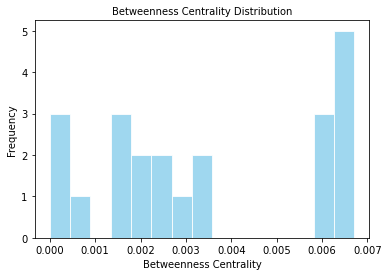

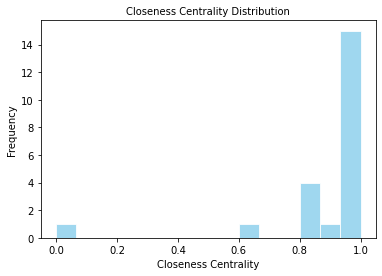

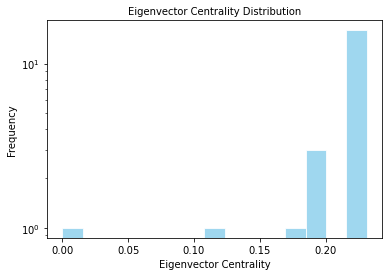

In [239]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_202003.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_202003.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_202003.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


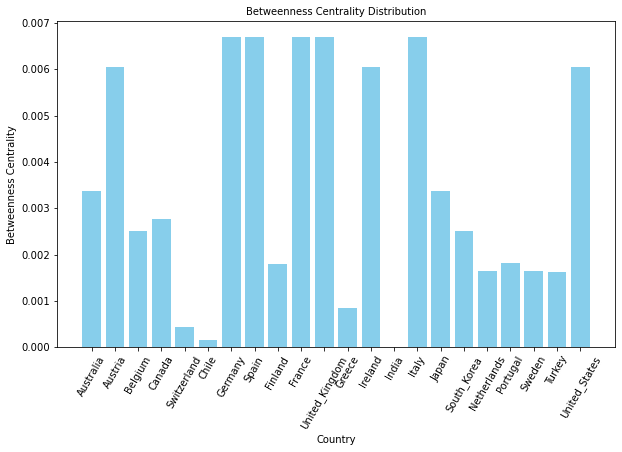

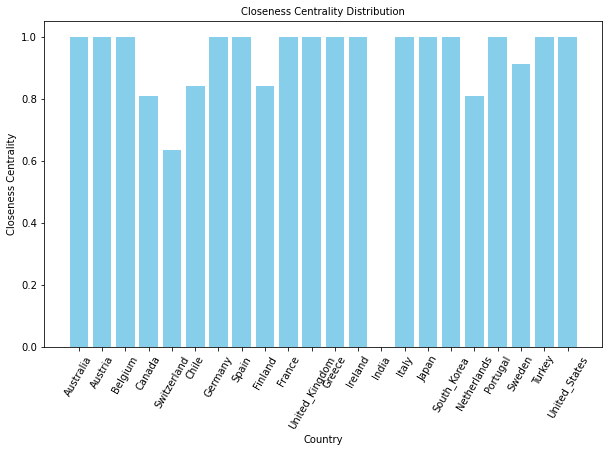

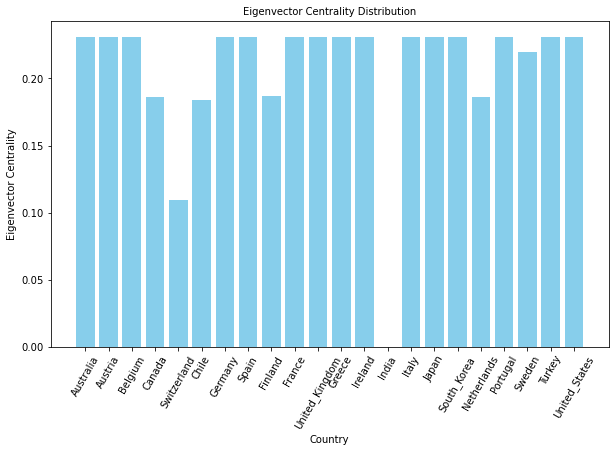

In [361]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_202003.keys()),list(bet_cen_202003.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_202003.keys()),list(clo_cen_202003.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_202003.keys()),list(eig_cen_202003.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201912

In [240]:
bet_cen_201912 = nx.betweenness_centrality(G_20191231)
clo_cen_201912 = nx.closeness_centrality(G_20191231)
eig_cen_201912 = nx.eigenvector_centrality(G_20191231)

#### 10 topest betweenness centrality nodes

In [241]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201912.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201912.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003788
1: ('Germany', 0.007434761006189578)
2: ('Spain', 0.007434761006189578)
3: ('France', 0.007434761006189578)
4: ('United_Kingdom', 0.007434761006189578)
5: ('Austria', 0.006570248534534249)
6: ('Ireland', 0.006570248534534249)
7: ('Italy', 0.006280161637304496)
8: ('United_States', 0.006280161637304496)
9: ('Australia', 0.004094813916242488)
10: ('Japan', 0.004094813916242488)


#### 10 topest closeness centrality nodes

In [242]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201912.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201912.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.897739
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Greece', 1.0)
9: ('Ireland', 1.0)
10: ('Italy', 1.0)


#### 10 topest Eigenvector centrality nodes

In [243]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201912.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201912.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206155
1: ('Australia', 0.23214929822461125)
2: ('Austria', 0.23214929822461125)
3: ('Belgium', 0.23214929822461125)
4: ('Germany', 0.23214929822461125)
5: ('Spain', 0.23214929822461125)
6: ('France', 0.2321492982246112)
7: ('United_Kingdom', 0.2321492982246112)
8: ('Greece', 0.2321492982246112)
9: ('Ireland', 0.2321492982246112)
10: ('Italy', 0.2321492982246112)


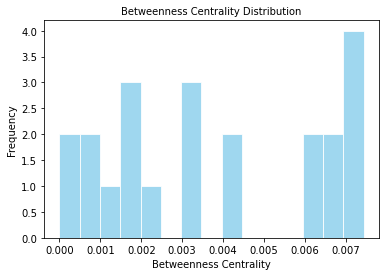

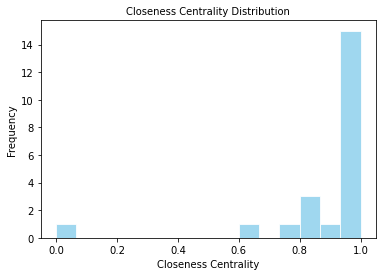

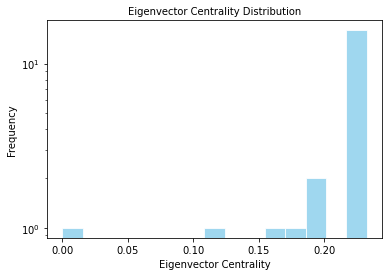

In [244]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201912.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201912.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201912.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


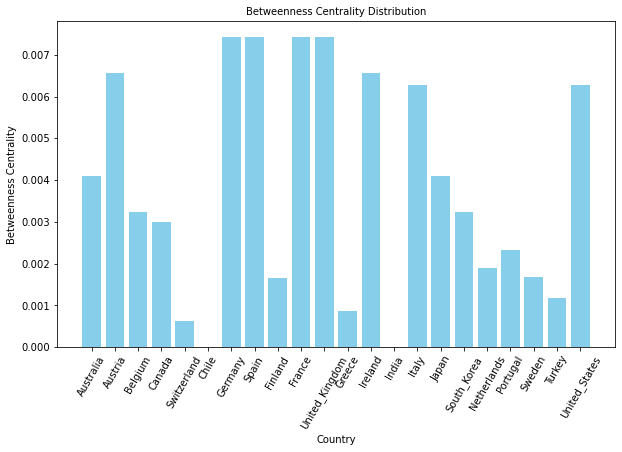

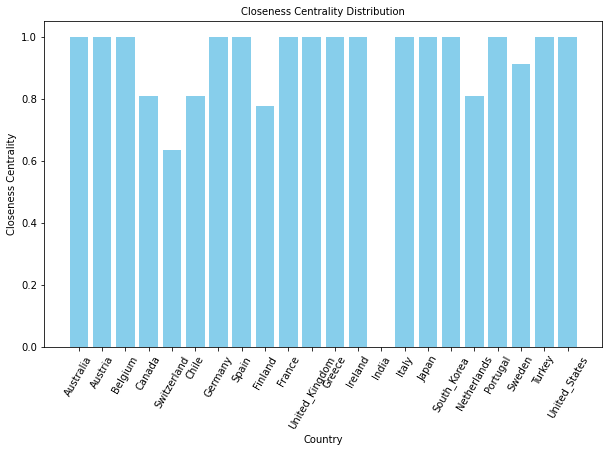

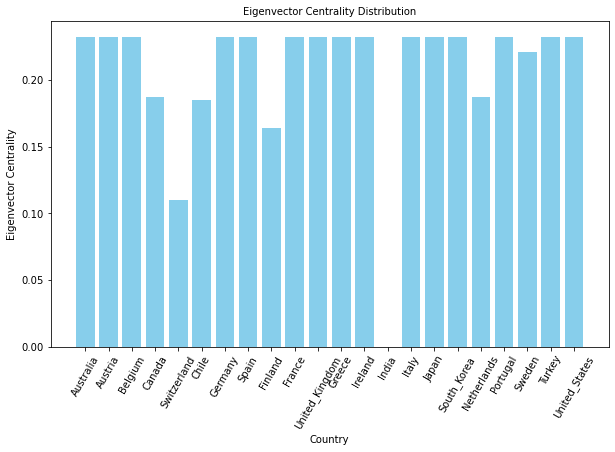

In [362]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201912.keys()),list(bet_cen_201912.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201912.keys()),list(clo_cen_201912.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201912.keys()),list(eig_cen_201912.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201909

In [245]:
bet_cen_201909 = nx.betweenness_centrality(G_20190930)
clo_cen_201909 = nx.closeness_centrality(G_20190930)
eig_cen_201909 = nx.eigenvector_centrality(G_20190930)

#### 10 topest betweenness centrality nodes

In [246]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201909.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201909.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))

Betweenness mean: 0.003571
1: ('Germany', 0.006980602069887785)
2: ('Spain', 0.006980602069887785)
3: ('France', 0.006980602069887785)
4: ('United_Kingdom', 0.006980602069887785)
5: ('Italy', 0.006980602069887785)
6: ('Austria', 0.006314502296645154)
7: ('Ireland', 0.006314502296645154)
8: ('United_States', 0.006071828303971163)
9: ('Australia', 0.0036406549799406947)
10: ('Japan', 0.0036406549799406947)


#### 10 topest closeness centrality nodes

In [247]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201909.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201909.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.900567
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Greece', 1.0)
9: ('Ireland', 1.0)
10: ('Italy', 1.0)


#### 10 topest Eigenvector centrality nodes

In [248]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201909.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201909.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206276
1: ('Australia', 0.23166735201757638)
2: ('Austria', 0.23166735201757638)
3: ('Belgium', 0.23166735201757638)
4: ('Germany', 0.23166735201757638)
5: ('Spain', 0.23166735201757638)
6: ('France', 0.23166735201757638)
7: ('United_Kingdom', 0.23166735201757638)
8: ('Greece', 0.23166735201757638)
9: ('Ireland', 0.23166735201757638)
10: ('Italy', 0.23166735201757638)


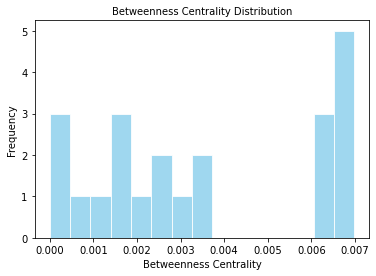

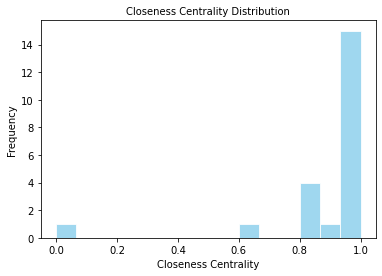

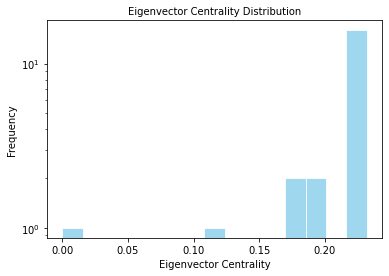

In [249]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201909.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201909.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201909.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


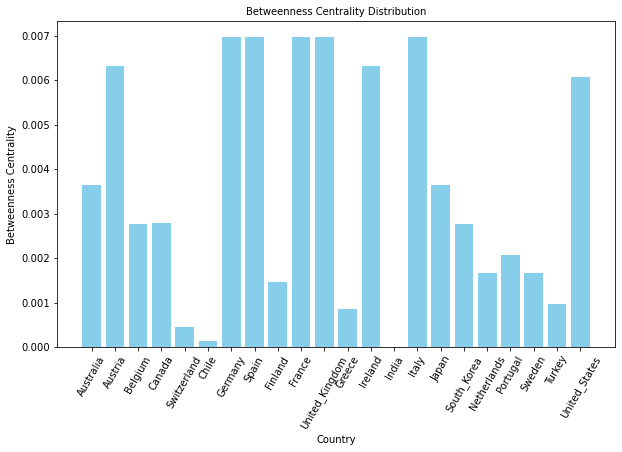

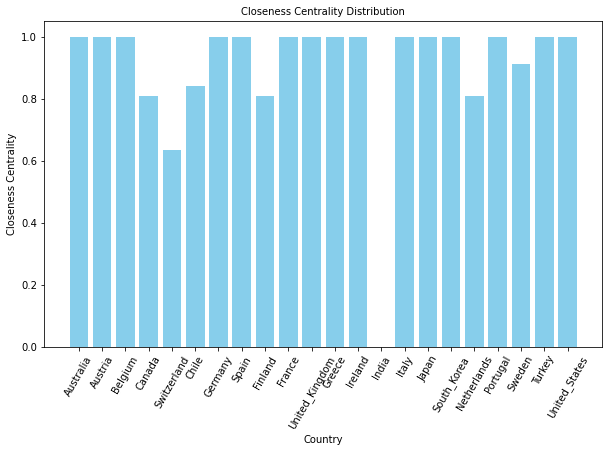

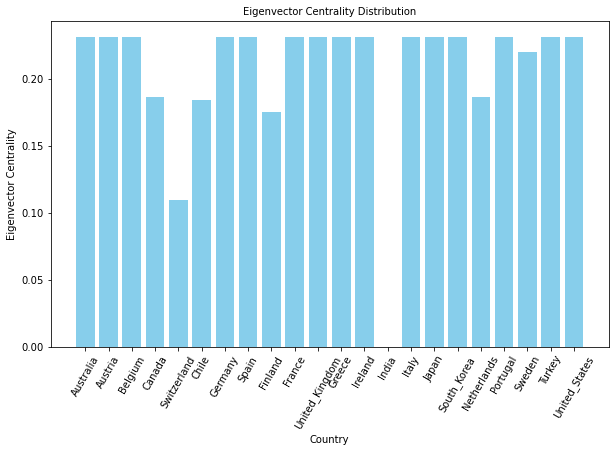

In [363]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201909.keys()),list(bet_cen_201909.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201909.keys()),list(clo_cen_201909.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201909.keys()),list(eig_cen_201909.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201906

In [250]:
bet_cen_201906 = nx.betweenness_centrality(G_20190630)
clo_cen_201906 = nx.closeness_centrality(G_20190630)
eig_cen_201906 = nx.eigenvector_centrality(G_20190630)

#### 10 topest betweenness centrality nodes

In [251]:
###Histogram of in-degrees
print("Betweenness mean: %f" % (np.array(list(bet_cen_201906.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201906.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))

Betweenness mean: 0.004004
1: ('Germany', 0.007787883412883415)
2: ('Spain', 0.007787883412883415)
3: ('France', 0.007787883412883415)
4: ('United_Kingdom', 0.007787883412883415)
5: ('Italy', 0.007787883412883415)
6: ('United_States', 0.006876334644191787)
7: ('Austria', 0.0067023419701991134)
8: ('Ireland', 0.005181442235013665)
9: ('Australia', 0.004438488099202385)
10: ('Japan', 0.004438488099202385)


#### 10 topest closeness centrality nodes

In [252]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201906.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201906.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.893009
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [253]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201906.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201906.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))



Eigenvector mean: 0.206349
1: ('United_States', 0.23277291941742737)
2: ('Australia', 0.2327729194174273)
3: ('Austria', 0.2327729194174273)
4: ('Belgium', 0.2327729194174273)
5: ('Germany', 0.2327729194174273)
6: ('Spain', 0.2327729194174273)
7: ('France', 0.2327729194174273)
8: ('United_Kingdom', 0.2327729194174273)
9: ('Italy', 0.2327729194174273)
10: ('Japan', 0.2327729194174273)


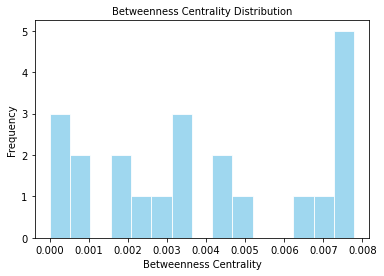

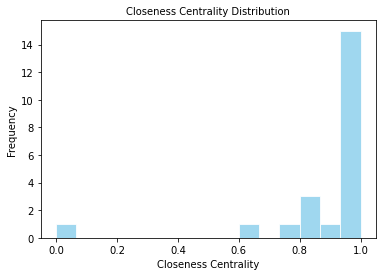

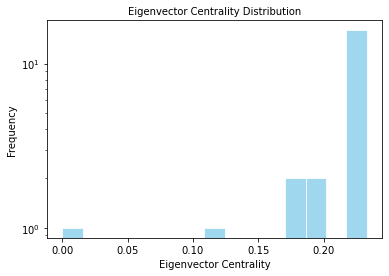

In [254]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201906.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201906.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201906.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


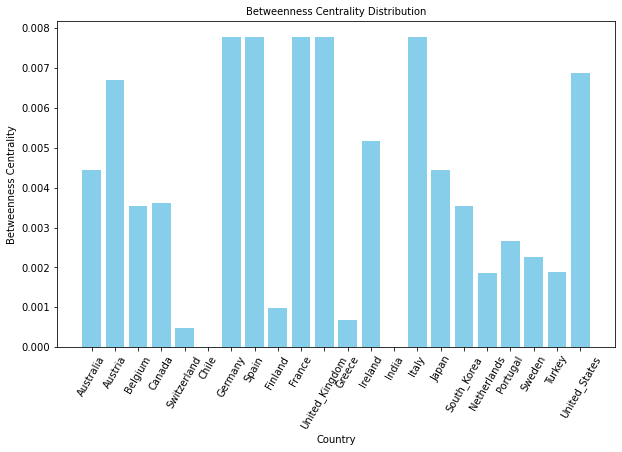

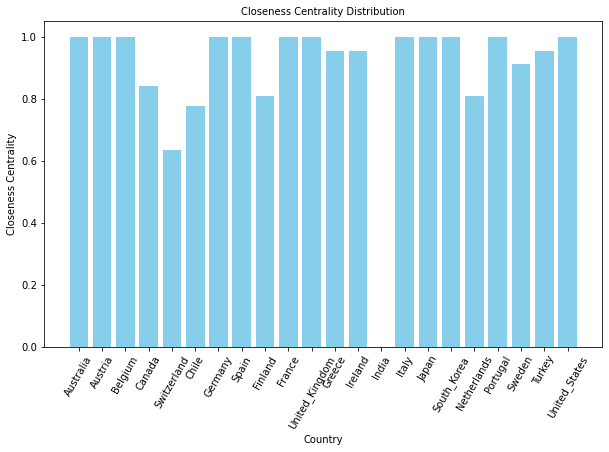

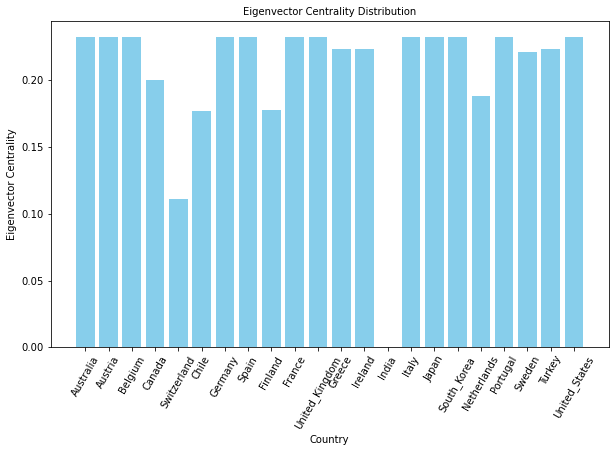

In [364]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201906.keys()),list(bet_cen_201906.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201906.keys()),list(clo_cen_201906.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201906.keys()),list(eig_cen_201906.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201903

In [255]:
bet_cen_201903 = nx.betweenness_centrality(G_20190331)
clo_cen_201903 = nx.closeness_centrality(G_20190331)
eig_cen_201903 = nx.eigenvector_centrality(G_20190331)


#### 10 topest betweenness centrality nodes

In [256]:
###Histogram of in-degrees
print("Betweenness mean: %f" % (np.array(list(bet_cen_201903.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201903.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003680
1: ('Austria', 0.007161807419160361)
2: ('Germany', 0.007161807419160361)
3: ('Spain', 0.007161807419160361)
4: ('France', 0.007161807419160361)
5: ('United_Kingdom', 0.007161807419160361)
6: ('Italy', 0.007161807419160361)
7: ('United_States', 0.006485787010997095)
8: ('Ireland', 0.005203173149601723)
9: ('Australia', 0.0037793433224105493)
10: ('Japan', 0.0037793433224105493)


#### 10 topest closeness centrality nodes

In [257]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201903.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201903.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))



Closeness mean: 0.897904
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


####  10 topest Eigenvector centrality nodes

In [258]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201903.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201903.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206455
1: ('Australia', 0.23168422855138499)
2: ('Austria', 0.23168422855138499)
3: ('Belgium', 0.23168422855138499)
4: ('Germany', 0.23168422855138493)
5: ('Spain', 0.23168422855138493)
6: ('France', 0.23168422855138493)
7: ('United_Kingdom', 0.23168422855138493)
8: ('Italy', 0.23168422855138493)
9: ('Japan', 0.23168422855138493)
10: ('South_Korea', 0.23168422855138493)


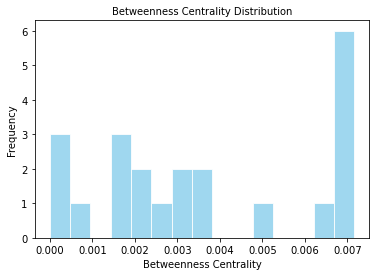

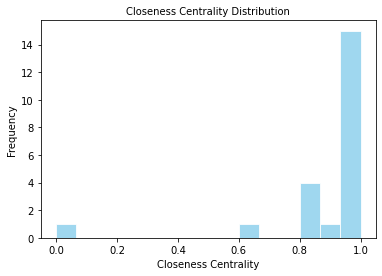

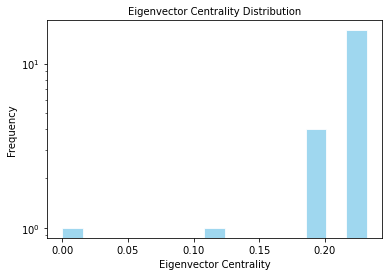

In [259]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201903.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201903.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201903.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


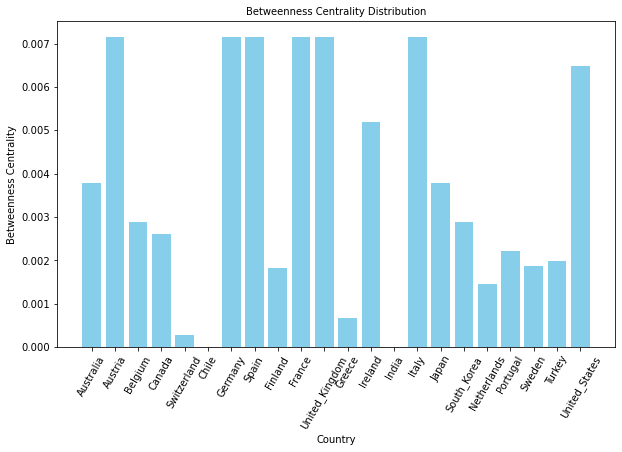

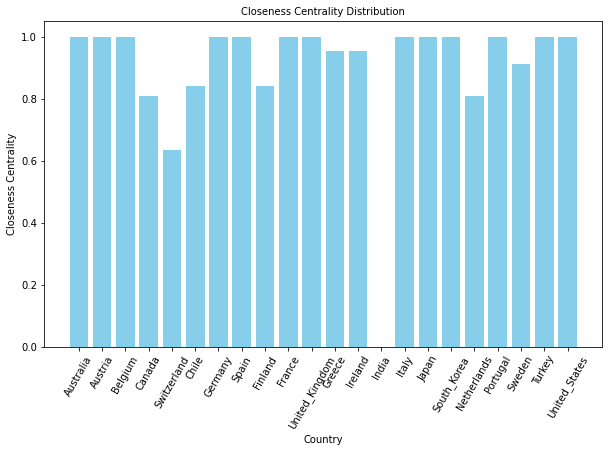

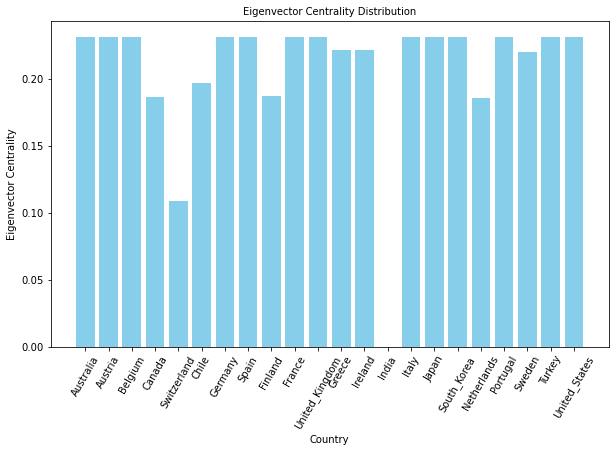

In [365]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201903.keys()),list(bet_cen_201903.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201903.keys()),list(clo_cen_201903.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201903.keys()),list(eig_cen_201903.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201812

In [260]:
bet_cen_201812 = nx.betweenness_centrality(G_20181231)
clo_cen_201812 = nx.closeness_centrality(G_20181231)
eig_cen_201812 = nx.eigenvector_centrality(G_20181231)


#### 10 topest betweenness centrality nodes

In [261]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201812.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201812.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004221
1: ('Austria', 0.00868873520659235)
2: ('Germany', 0.00868873520659235)
3: ('Spain', 0.00868873520659235)
4: ('France', 0.00868873520659235)
5: ('United_Kingdom', 0.00868873520659235)
6: ('Italy', 0.00868873520659235)
7: ('United_States', 0.00658916810702525)
8: ('Australia', 0.005306271109842539)
9: ('Ireland', 0.004804930519216234)
10: ('Belgium', 0.004379459825888397)


#### 10 topest closeness centrality nodes

In [262]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201812.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201812.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.891540
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [263]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201812.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201812.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.205917
1: ('Australia', 0.23355342973267876)
2: ('Austria', 0.23355342973267876)
3: ('Belgium', 0.23355342973267876)
4: ('Germany', 0.23355342973267876)
5: ('Spain', 0.23355342973267876)
6: ('France', 0.23355342973267876)
7: ('United_Kingdom', 0.23355342973267876)
8: ('Italy', 0.23355342973267876)
9: ('Japan', 0.23355342973267876)
10: ('South_Korea', 0.23355342973267876)


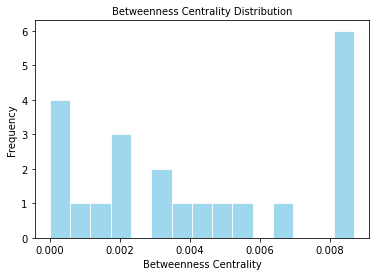

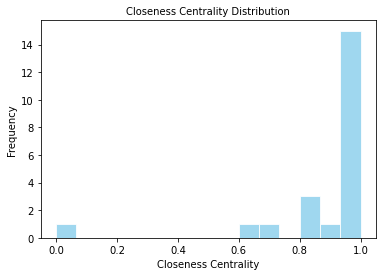

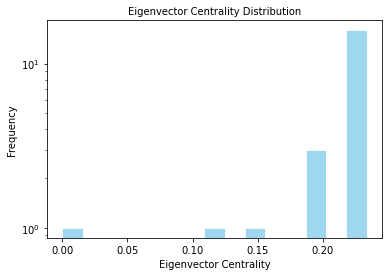

In [264]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201812.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201812.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201812.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


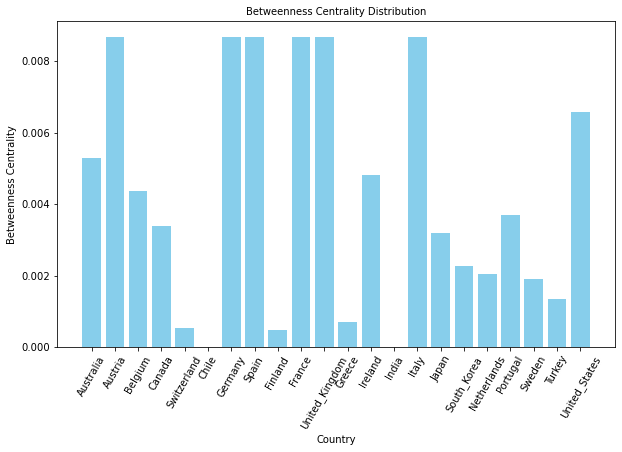

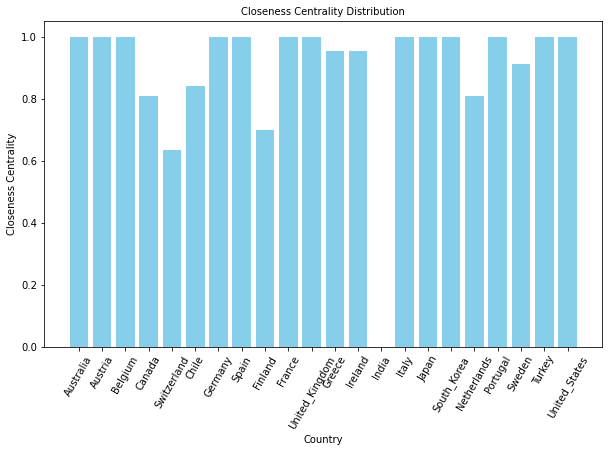

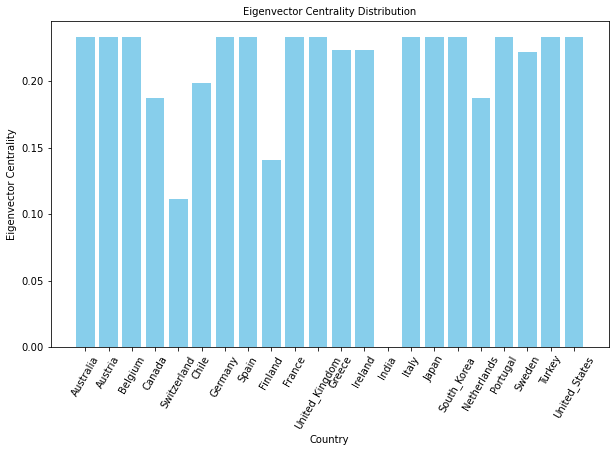

In [366]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201812.keys()),list(bet_cen_201812.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201812.keys()),list(clo_cen_201812.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201812.keys()),list(eig_cen_201812.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201809

In [265]:
bet_cen_201809 = nx.betweenness_centrality(G_20180930)
clo_cen_201809 = nx.closeness_centrality(G_20180930)
eig_cen_201809 = nx.eigenvector_centrality(G_20180930)



#### 10 topest betweenness centrality nodes

In [266]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201809.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201809.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))



Betweenness mean: 0.003896
1: ('Austria', 0.007856710088852947)
2: ('Germany', 0.007856710088852947)
3: ('Spain', 0.007856710088852947)
4: ('France', 0.007856710088852947)
5: ('United_Kingdom', 0.007856710088852947)
6: ('United_States', 0.007856710088852947)
7: ('Italy', 0.0062394384715813295)
8: ('Ireland', 0.004793592650735508)
9: ('Australia', 0.004417556649699507)
10: ('Japan', 0.004417556649699507)


#### 10 topest closeness centrality nodes

In [267]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201809.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201809.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.894600
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Japan', 1.0)
9: ('South_Korea', 1.0)
10: ('Portugal', 1.0)


#### 10 topest Eigenvector centrality nodes

In [268]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201809.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201809.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206369
1: ('Australia', 0.23276591259726007)
2: ('Austria', 0.23276591259726007)
3: ('Belgium', 0.23276591259726007)
4: ('Germany', 0.23276591259726007)
5: ('Spain', 0.23276591259726007)
6: ('France', 0.23276591259726007)
7: ('United_Kingdom', 0.23276591259726007)
8: ('Japan', 0.23276591259726007)
9: ('South_Korea', 0.23276591259726007)
10: ('Portugal', 0.23276591259726007)


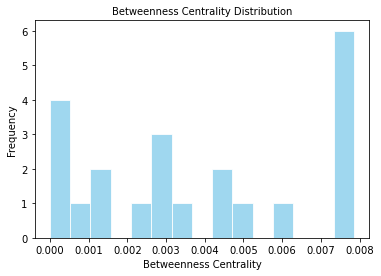

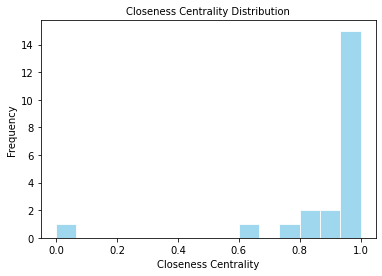

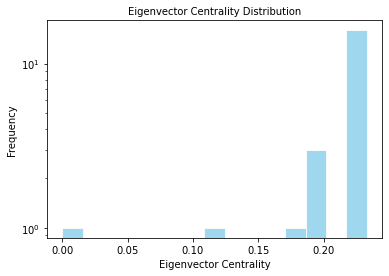

In [269]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201809.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201809.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201809.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


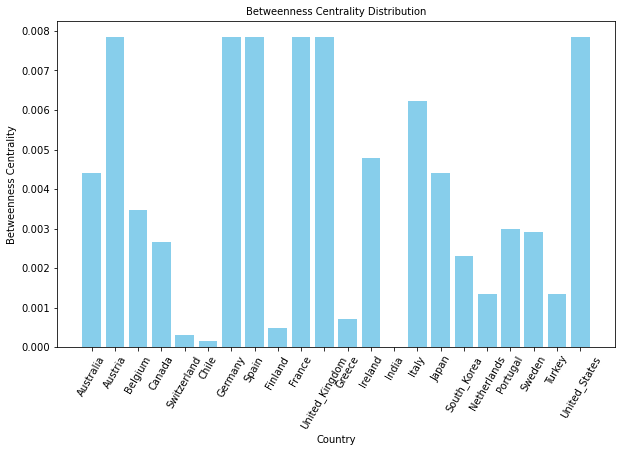

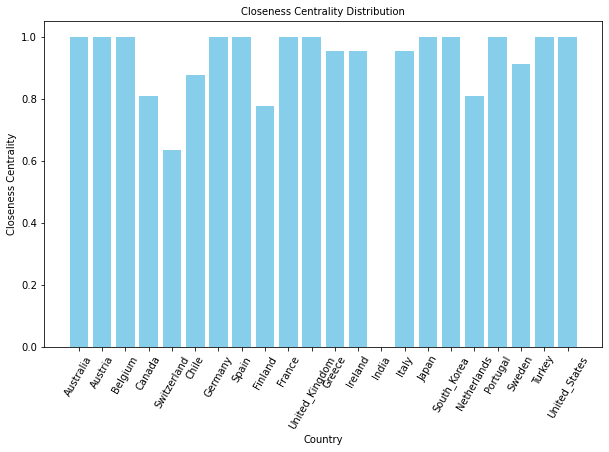

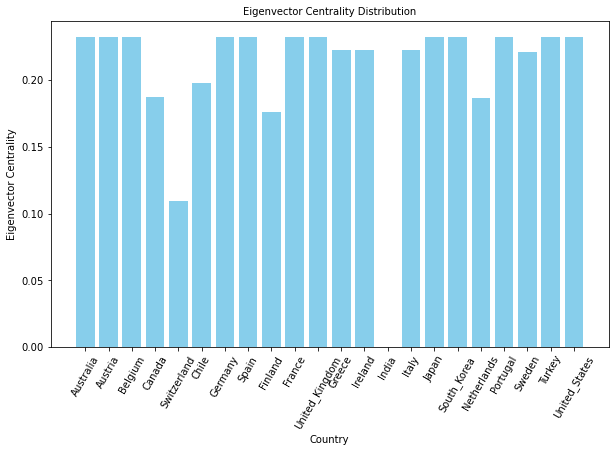

In [367]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201809.keys()),list(bet_cen_201809.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201809.keys()),list(clo_cen_201809.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201809.keys()),list(eig_cen_201809.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201806

In [270]:
bet_cen_201806 = nx.betweenness_centrality(G_20180630)
clo_cen_201806 = nx.closeness_centrality(G_20180630)
eig_cen_201806 = nx.eigenvector_centrality(G_20180630)


#### 10 topest betweenness centrality nodes

In [271]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201806.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201806.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004113
1: ('Austria', 0.008311083757512331)
2: ('Germany', 0.008311083757512331)
3: ('France', 0.008311083757512331)
4: ('United_Kingdom', 0.008311083757512331)
5: ('Italy', 0.008311083757512331)
6: ('United_States', 0.008311083757512331)
7: ('Spain', 0.007399148470577043)
8: ('Ireland', 0.004750603232746091)
9: ('Portugal', 0.0044809192130620705)
10: ('Belgium', 0.004034877159877159)


#### 10 topest closeness centrality nodes

In [272]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201806.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201806.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.892162
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [273]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201806.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201806.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206124
1: ('Australia', 0.23363772090837742)
2: ('Austria', 0.23363772090837742)
3: ('Belgium', 0.23363772090837742)
4: ('Germany', 0.23363772090837742)
5: ('Spain', 0.23363772090837742)
6: ('France', 0.23363772090837742)
7: ('United_Kingdom', 0.23363772090837742)
8: ('Italy', 0.23363772090837742)
9: ('Japan', 0.23363772090837742)
10: ('South_Korea', 0.23363772090837742)


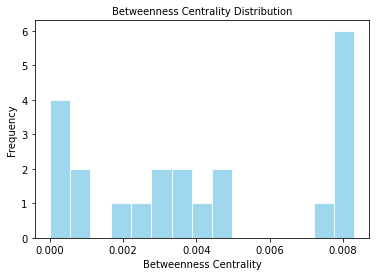

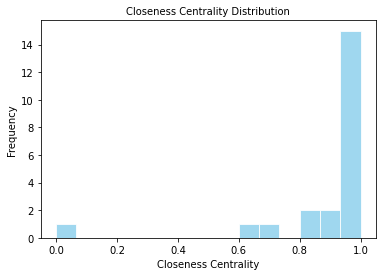

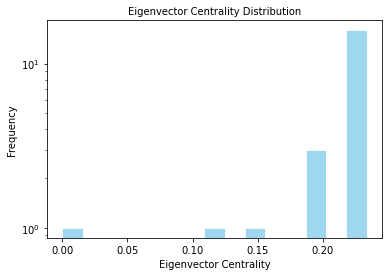

In [274]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201806.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201806.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201806.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


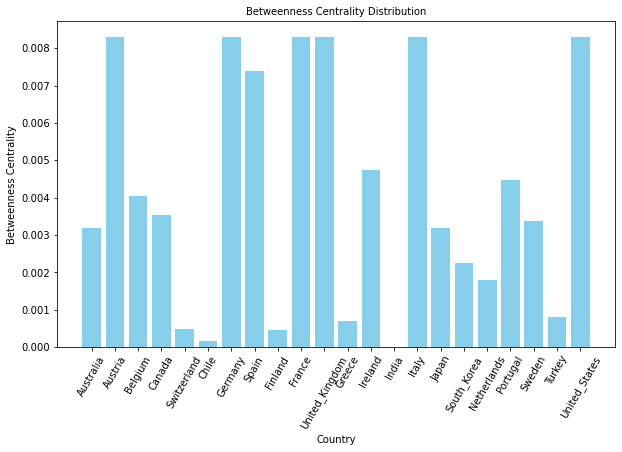

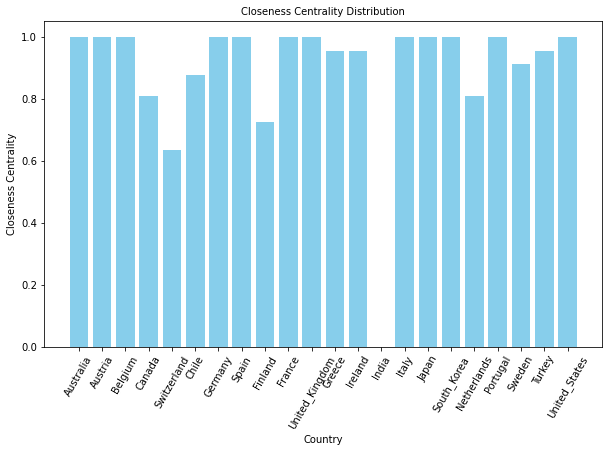

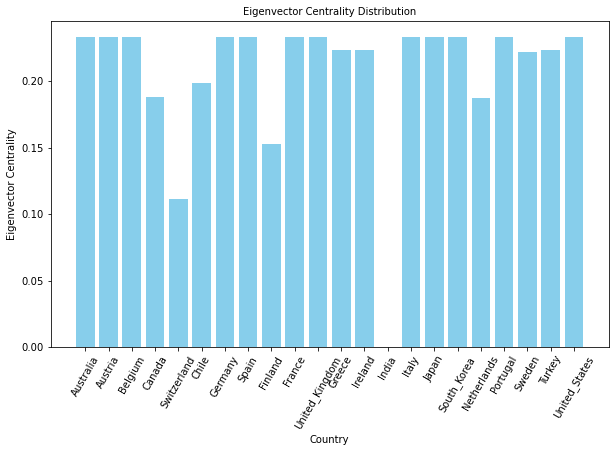

In [368]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201806.keys()),list(bet_cen_201806.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201806.keys()),list(clo_cen_201806.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201806.keys()),list(eig_cen_201806.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201803

In [275]:
bet_cen_201803 = nx.betweenness_centrality(G_20180331)
clo_cen_201803 = nx.closeness_centrality(G_20180331)
eig_cen_201803 = nx.eigenvector_centrality(G_20180331)


#### 10 topest betweenness centrality nodes

In [276]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201803.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201803.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004329
1: ('Germany', 0.008831258027686601)
2: ('France', 0.008831258027686601)
3: ('United_Kingdom', 0.008831258027686601)
4: ('United_States', 0.008831258027686601)
5: ('Austria', 0.008155237619523336)
6: ('Spain', 0.007672734012019727)
7: ('Italy', 0.005655174851603424)
8: ('Japan', 0.005425173371601944)
9: ('Portugal', 0.004749152963438678)
10: ('Belgium', 0.00447671706600278)


#### 10 topest closeness centrality nodes

In [277]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201803.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201803.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.889211
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Japan', 1.0)
9: ('South_Korea', 1.0)
10: ('Portugal', 1.0)


#### 10 topest Eigenvector centrality nodes

In [278]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201803.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201803.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.205949
1: ('Australia', 0.23462672697103099)
2: ('Austria', 0.23462672697103099)
3: ('Belgium', 0.23462672697103099)
4: ('Germany', 0.23462672697103099)
5: ('Spain', 0.23462672697103099)
6: ('France', 0.23462672697103099)
7: ('United_Kingdom', 0.23462672697103099)
8: ('Japan', 0.23462672697103099)
9: ('South_Korea', 0.23462672697103099)
10: ('Portugal', 0.23462672697103099)


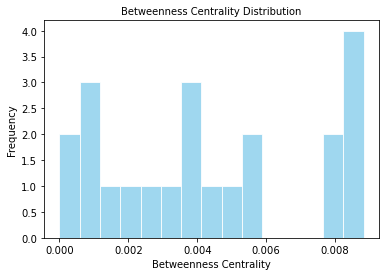

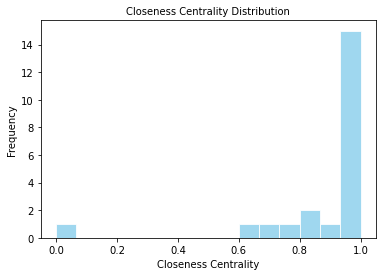

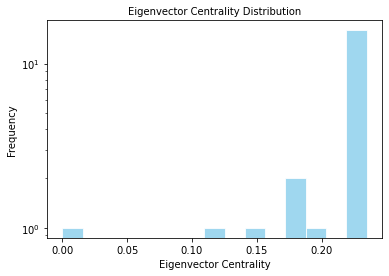

In [279]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201803.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201803.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201803.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


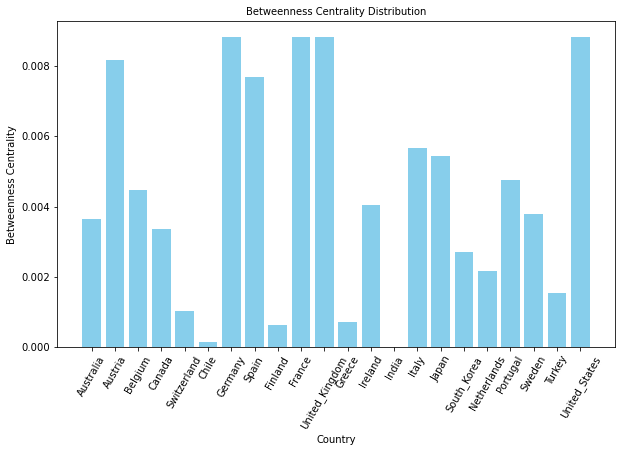

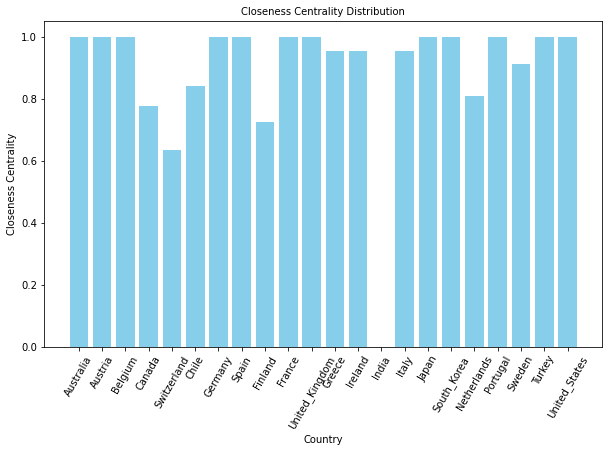

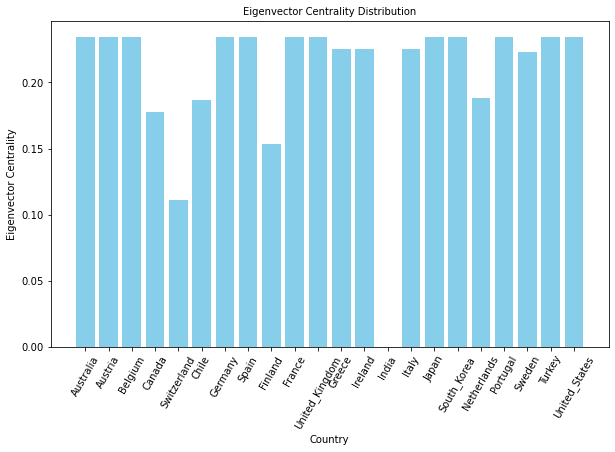

In [369]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201803.keys()),list(bet_cen_201803.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201803.keys()),list(clo_cen_201803.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201803.keys()),list(eig_cen_201803.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 210712

In [280]:
bet_cen_201712 = nx.betweenness_centrality(G_20171231)
clo_cen_201712 = nx.closeness_centrality(G_20171231)
eig_cen_201712 = nx.eigenvector_centrality(G_20171231)


#### 10 topest betweenness centrality nodes

In [281]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201712.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201712.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004221
1: ('Germany', 0.008422004582718868)
2: ('Spain', 0.008422004582718868)
3: ('France', 0.008422004582718868)
4: ('United_Kingdom', 0.008422004582718868)
5: ('United_States', 0.008422004582718868)
6: ('Austria', 0.007540871826586114)
7: ('Italy', 0.006662005322719609)
8: ('Ireland', 0.005780872566586853)
9: ('Japan', 0.005115126275840561)
10: ('Portugal', 0.0042339935197078064)


#### 10 topest closeness centrality nodes

In [282]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201712.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201712.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.891088
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Ireland', 1.0)
9: ('Italy', 1.0)
10: ('Japan', 1.0)


#### 10 topest Eigenvector centrality nodes

In [283]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201712.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201712.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206111
1: ('Australia', 0.2329993934671453)
2: ('Austria', 0.2329993934671453)
3: ('Belgium', 0.2329993934671453)
4: ('Germany', 0.2329993934671453)
5: ('Spain', 0.2329993934671453)
6: ('France', 0.2329993934671453)
7: ('United_Kingdom', 0.2329993934671453)
8: ('Ireland', 0.2329993934671453)
9: ('Italy', 0.2329993934671453)
10: ('Japan', 0.2329993934671453)


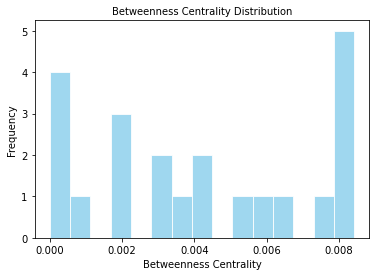

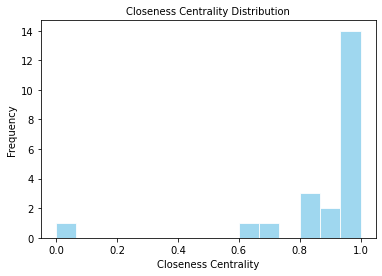

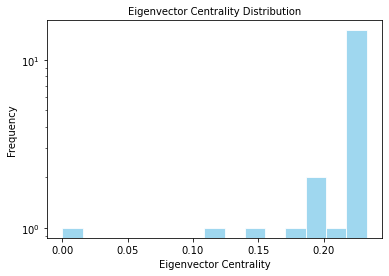

In [284]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201712.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201712.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201712.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


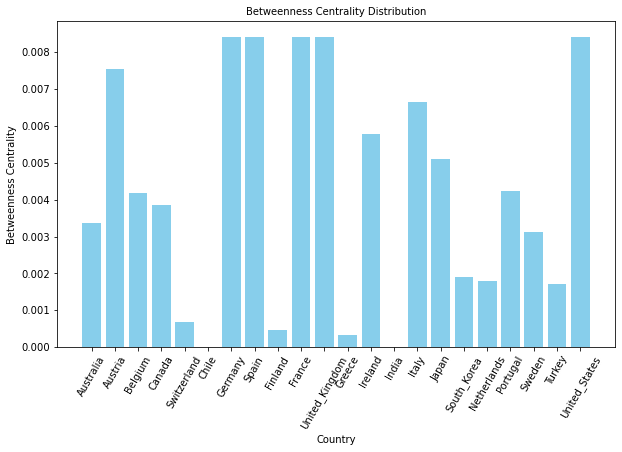

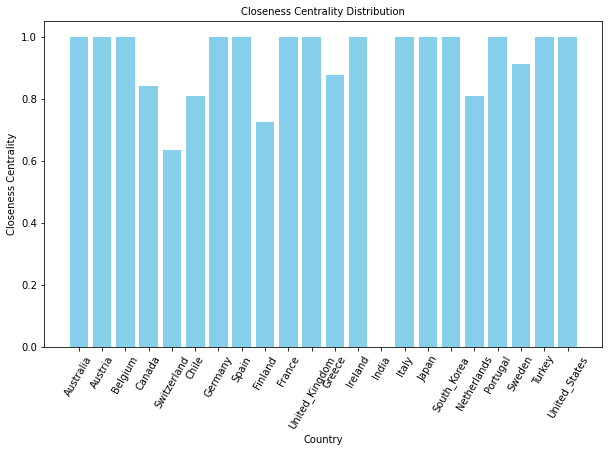

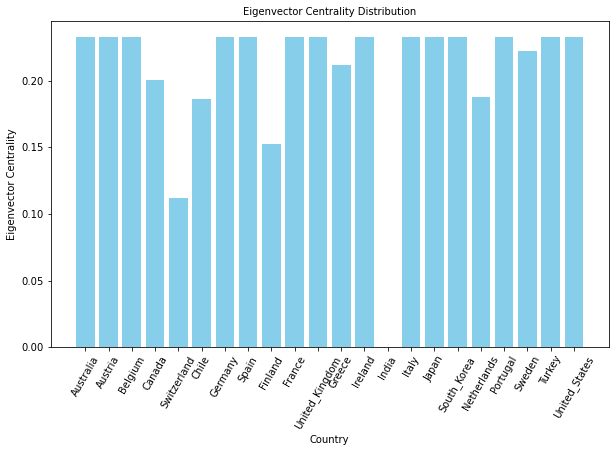

In [370]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201712.keys()),list(bet_cen_201712.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201712.keys()),list(clo_cen_201712.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201712.keys()),list(eig_cen_201712.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201709

In [285]:
bet_cen_201709 = nx.betweenness_centrality(G_20170930)
clo_cen_201709 = nx.closeness_centrality(G_20170930)
eig_cen_201709 = nx.eigenvector_centrality(G_20170930)

#### 10 topest betweenness centrality nodes

In [286]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201709.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201709.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004329
1: ('Germany', 0.008584626352483495)
2: ('Spain', 0.008584626352483495)
3: ('France', 0.008584626352483495)
4: ('United_Kingdom', 0.008584626352483495)
5: ('United_States', 0.008584626352483495)
6: ('Austria', 0.007692155727870015)
7: ('Italy', 0.00603733237661809)
8: ('Ireland', 0.005331223009794439)
9: ('Australia', 0.005235231038802467)
10: ('Japan', 0.005235231038802467)


#### 10 topest closeness centrality nodes

In [287]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201709.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201709.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.888729
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Ireland', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [288]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201709.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201709.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206197
1: ('Turkey', 0.233638691725907)
2: ('United_States', 0.233638691725907)
3: ('Australia', 0.23363869172590696)
4: ('Austria', 0.23363869172590696)
5: ('Belgium', 0.23363869172590696)
6: ('Germany', 0.23363869172590696)
7: ('Spain', 0.23363869172590696)
8: ('France', 0.23363869172590696)
9: ('United_Kingdom', 0.23363869172590696)
10: ('Ireland', 0.23363869172590696)


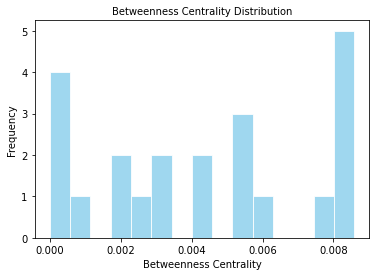

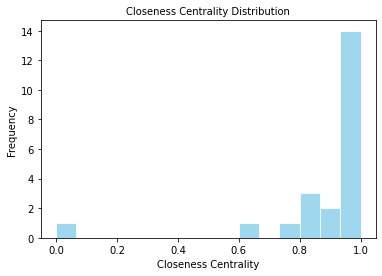

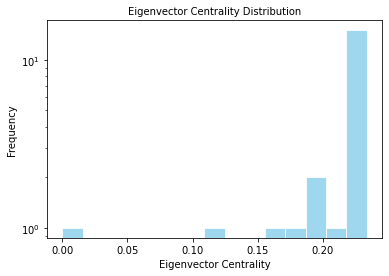

In [289]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201709.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201709.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201709.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


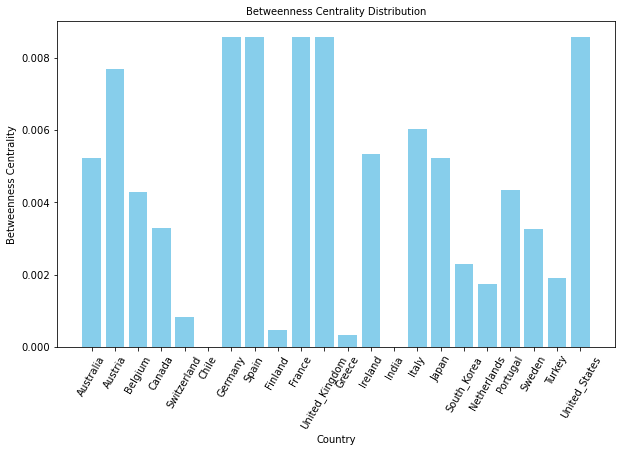

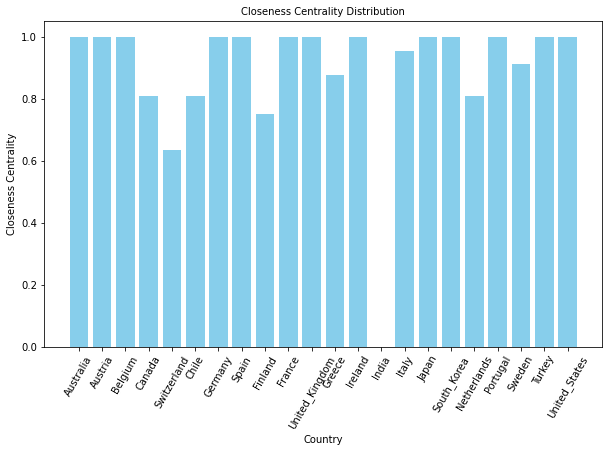

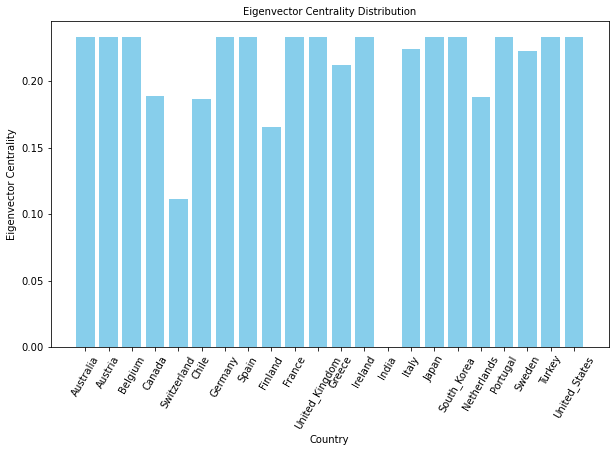

In [371]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201709.keys()),list(bet_cen_201709.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201709.keys()),list(clo_cen_201709.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201709.keys()),list(eig_cen_201709.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201706

In [290]:
bet_cen_201706 = nx.betweenness_centrality(G_20170630)
clo_cen_201706 = nx.closeness_centrality(G_20170630)
eig_cen_201706 = nx.eigenvector_centrality(G_20170630)


#### 10 topest betweenness centrality nodes

In [291]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201706.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201706.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004437
1: ('Germany', 0.008719727012794241)
2: ('Spain', 0.008719727012794241)
3: ('France', 0.008719727012794241)
4: ('United_Kingdom', 0.008719727012794241)
5: ('United_States', 0.008719727012794241)
6: ('Austria', 0.00803236873615025)
7: ('Italy', 0.007280650216574587)
8: ('Australia', 0.005370331699113212)
9: ('Japan', 0.005370331699113212)
10: ('Ireland', 0.0045501366824896245)


#### 10 topest closeness centrality nodes

In [292]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201706.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201706.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.886245
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [293]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201706.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201706.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206249
1: ('United_States', 0.23462130964661737)
2: ('Australia', 0.23462130964661732)
3: ('Austria', 0.23462130964661732)
4: ('Belgium', 0.23462130964661732)
5: ('Germany', 0.23462130964661732)
6: ('Spain', 0.23462130964661732)
7: ('France', 0.23462130964661732)
8: ('United_Kingdom', 0.23462130964661732)
9: ('Italy', 0.23462130964661732)
10: ('Japan', 0.23462130964661732)


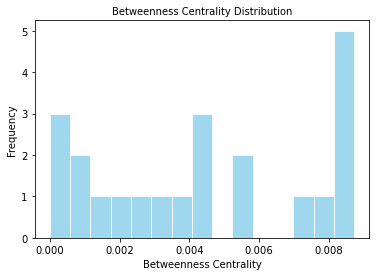

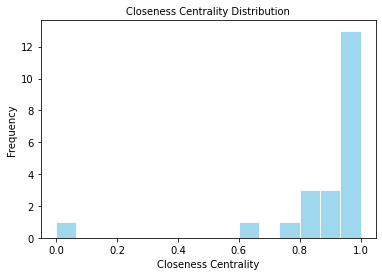

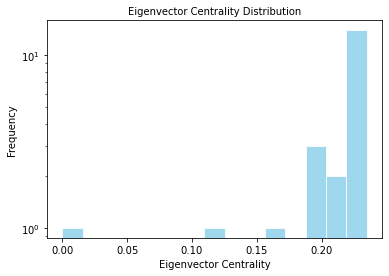

In [294]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201706.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201706.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201706.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


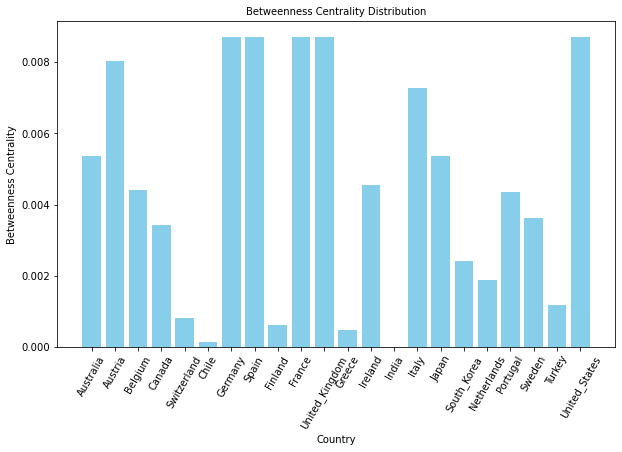

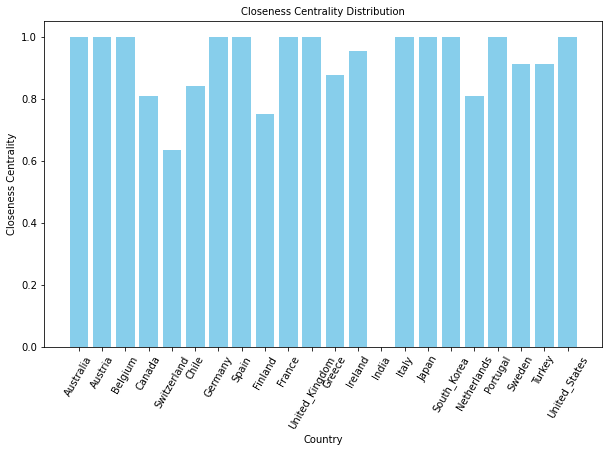

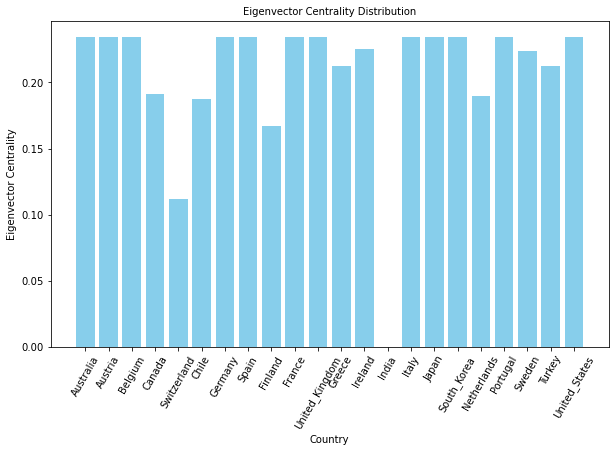

In [372]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201706.keys()),list(bet_cen_201706.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201706.keys()),list(clo_cen_201706.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201706.keys()),list(eig_cen_201706.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 210703

In [295]:
bet_cen_201703 = nx.betweenness_centrality(G_20170331)
clo_cen_201703 = nx.closeness_centrality(G_20170331)
eig_cen_201703 = nx.eigenvector_centrality(G_20170331)


#### 10 topest betweenness centrality nodes

In [296]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201703.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201703.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004545
1: ('Germany', 0.00915715567501282)
2: ('Spain', 0.00915715567501282)
3: ('France', 0.00915715567501282)
4: ('United_Kingdom', 0.00915715567501282)
5: ('United_States', 0.00915715567501282)
6: ('Austria', 0.008253347181918612)
7: ('Italy', 0.006268100285957431)
8: ('Australia', 0.005774691578263007)
9: ('Japan', 0.005774691578263007)
10: ('Belgium', 0.0048167606203320485)


#### 10 topest closeness centrality nodes

In [297]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201703.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201703.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.886106
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [298]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201703.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201703.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.205965
1: ('Australia', 0.23468252312411625)
2: ('Austria', 0.23468252312411625)
3: ('Belgium', 0.23468252312411625)
4: ('Germany', 0.23468252312411625)
5: ('Spain', 0.23468252312411625)
6: ('France', 0.23468252312411625)
7: ('United_Kingdom', 0.23468252312411625)
8: ('Italy', 0.23468252312411625)
9: ('Japan', 0.23468252312411625)
10: ('South_Korea', 0.23468252312411625)


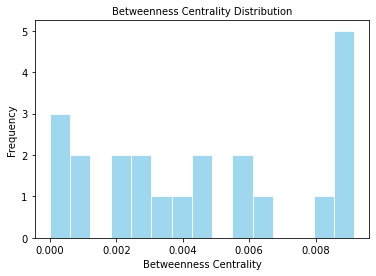

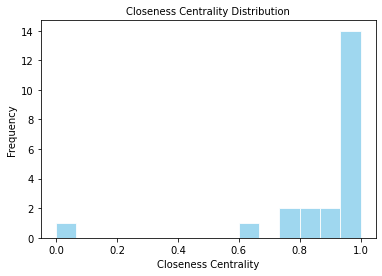

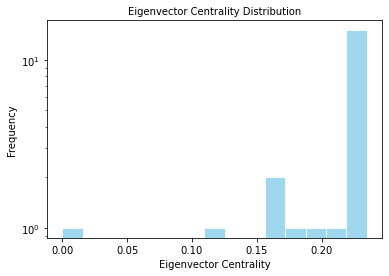

In [299]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201703.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201703.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201703.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


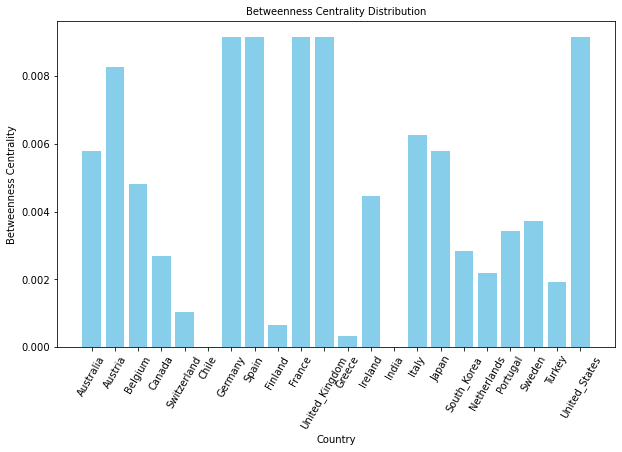

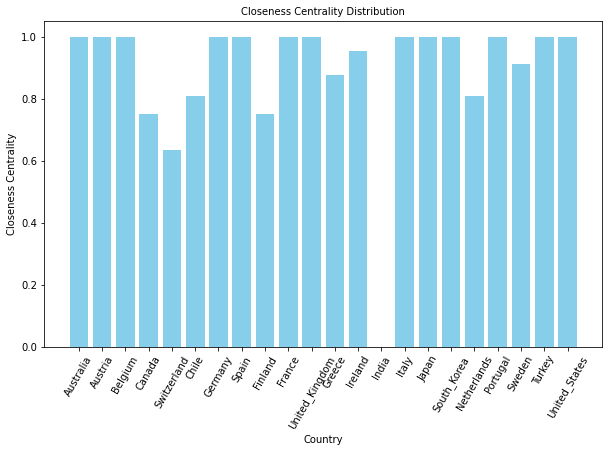

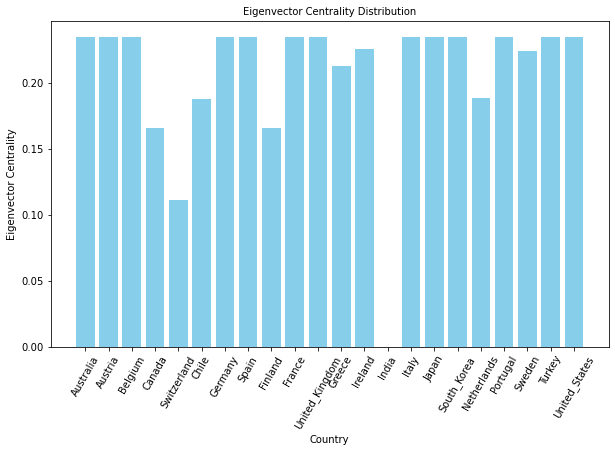

In [373]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201703.keys()),list(bet_cen_201703.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201703.keys()),list(clo_cen_201703.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201703.keys()),list(eig_cen_201703.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 210612

In [300]:
bet_cen_201612 = nx.betweenness_centrality(G_20161231)
clo_cen_201612 = nx.closeness_centrality(G_20161231)
eig_cen_201612 = nx.eigenvector_centrality(G_20161231)


#### 10 topest betweenness centrality nodes

In [301]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201612.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201612.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004221
1: ('Germany', 0.008255742273599417)
2: ('Spain', 0.008255742273599417)
3: ('France', 0.008255742273599417)
4: ('United_Kingdom', 0.008255742273599417)
5: ('United_States', 0.008255742273599417)
6: ('Austria', 0.007381309167023453)
7: ('Italy', 0.006838310499024785)
8: ('Australia', 0.004939415742987172)
9: ('Japan', 0.004939415742987172)
10: ('Canada', 0.004499657088942803)


#### 10 topest closeness centrality nodes

In [302]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201612.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201612.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.890197
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [303]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201612.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201612.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206204
1: ('Australia', 0.23359859172710967)
2: ('Austria', 0.23359859172710967)
3: ('Belgium', 0.23359859172710967)
4: ('Germany', 0.23359859172710967)
5: ('Spain', 0.23359859172710967)
6: ('France', 0.23359859172710967)
7: ('United_Kingdom', 0.23359859172710967)
8: ('Italy', 0.23359859172710967)
9: ('Japan', 0.23359859172710967)
10: ('South_Korea', 0.23359859172710967)


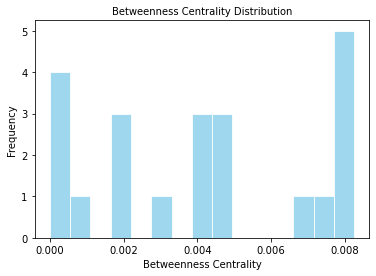

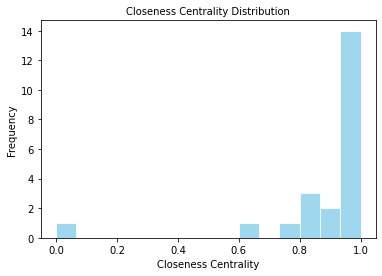

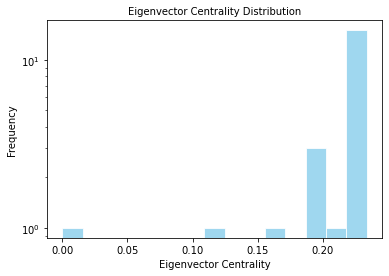

In [304]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201612.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201612.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201612.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


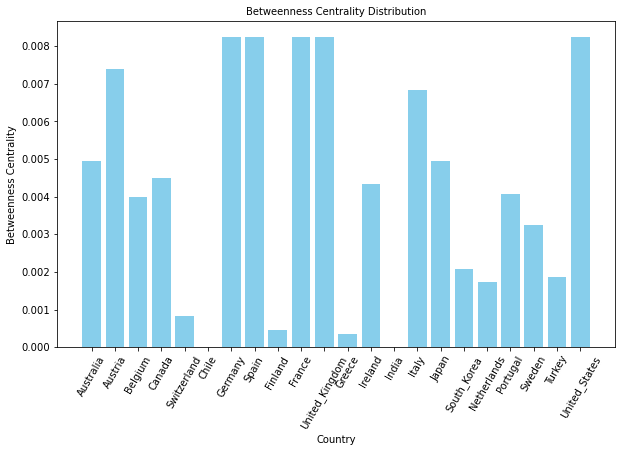

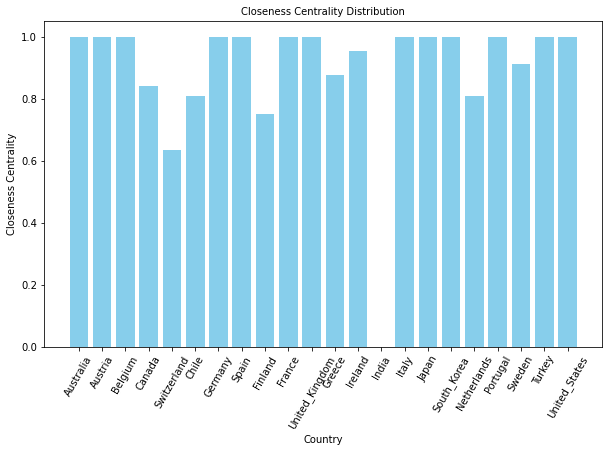

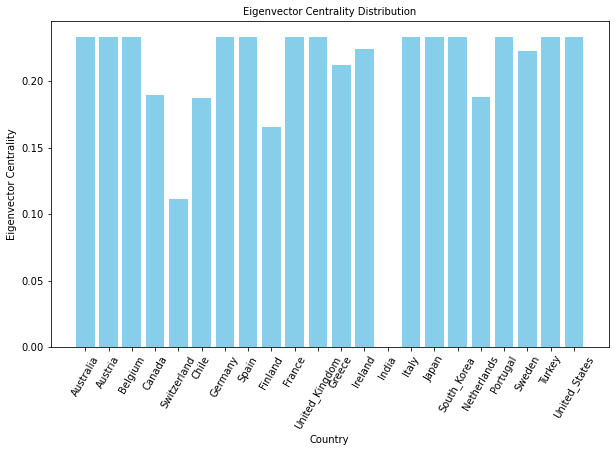

In [374]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201612.keys()),list(bet_cen_201612.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201612.keys()),list(clo_cen_201612.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201612.keys()),list(eig_cen_201612.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201609

In [305]:
bet_cen_201609 = nx.betweenness_centrality(G_20160930)
clo_cen_201609 = nx.closeness_centrality(G_20160930)
eig_cen_201609 = nx.eigenvector_centrality(G_20160930)


#### 10 topest betweenness centrality nodes

In [306]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201609.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201609.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004437
1: ('Germany', 0.008828595346452488)
2: ('Spain', 0.008828595346452488)
3: ('France', 0.008828595346452488)
4: ('United_Kingdom', 0.008828595346452488)
5: ('United_States', 0.008828595346452488)
6: ('Austria', 0.007936124721839008)
7: ('Italy', 0.006177542695399838)
8: ('Australia', 0.005512268815840246)
9: ('Portugal', 0.004619798191226762)
10: ('Belgium', 0.004567420013848585)


#### 10 topest closeness centrality nodes

In [307]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201609.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201609.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.887553
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [308]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201609.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201609.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206054
1: ('Turkey', 0.23406785468243496)
2: ('United_States', 0.23406785468243496)
3: ('Australia', 0.2340678546824349)
4: ('Austria', 0.2340678546824349)
5: ('Belgium', 0.2340678546824349)
6: ('Germany', 0.2340678546824349)
7: ('Spain', 0.2340678546824349)
8: ('France', 0.2340678546824349)
9: ('United_Kingdom', 0.2340678546824349)
10: ('Italy', 0.2340678546824349)


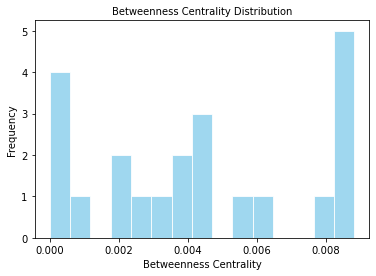

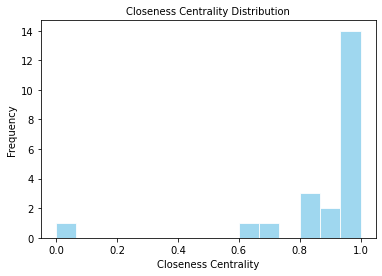

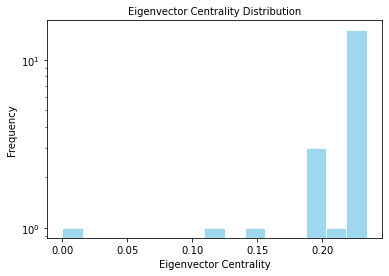

In [309]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201609.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201609.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201609.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


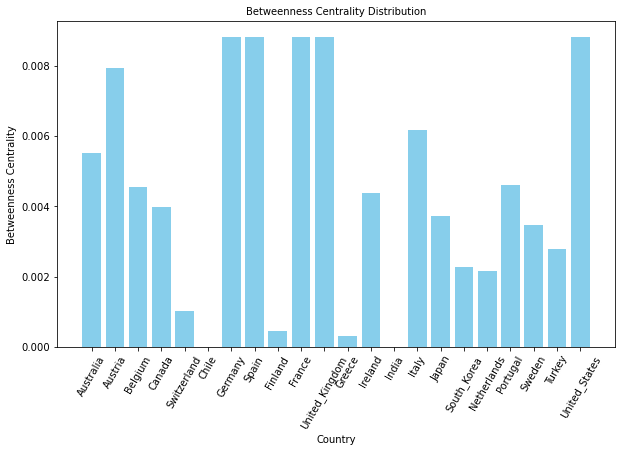

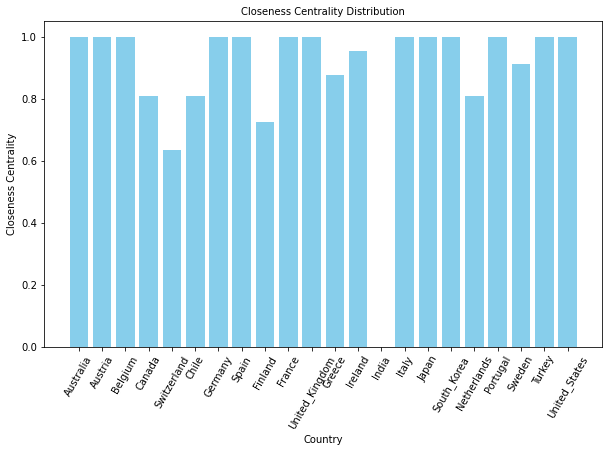

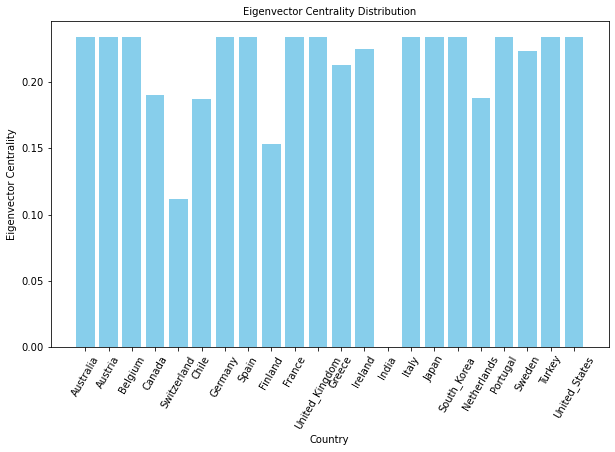

In [375]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201609.keys()),list(bet_cen_201609.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201609.keys()),list(clo_cen_201609.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201609.keys()),list(eig_cen_201609.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201606

In [310]:
bet_cen_201606 = nx.betweenness_centrality(G_20160630)
clo_cen_201606 = nx.closeness_centrality(G_20160630)
eig_cen_201606 = nx.eigenvector_centrality(G_20160630)


#### 10 topest betweenness centrality nodes

In [311]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201606.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201606.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004113
1: ('Germany', 0.008073028162313877)
2: ('Spain', 0.008073028162313877)
3: ('France', 0.008073028162313877)
4: ('United_Kingdom', 0.008073028162313877)
5: ('United_States', 0.008073028162313877)
6: ('Austria', 0.007191895406181121)
7: ('Italy', 0.00666507104007104)
8: ('Australia', 0.004756701631701632)
9: ('Japan', 0.004756701631701632)
10: ('Ireland', 0.004704065775494348)


#### 10 topest closeness centrality nodes

In [312]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201606.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201606.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.891788
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [313]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201606.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201606.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206321
1: ('Turkey', 0.23243274442454606)
2: ('United_States', 0.23243274442454606)
3: ('Australia', 0.232432744424546)
4: ('Austria', 0.232432744424546)
5: ('Belgium', 0.232432744424546)
6: ('Germany', 0.232432744424546)
7: ('Spain', 0.232432744424546)
8: ('France', 0.232432744424546)
9: ('United_Kingdom', 0.232432744424546)
10: ('Italy', 0.232432744424546)


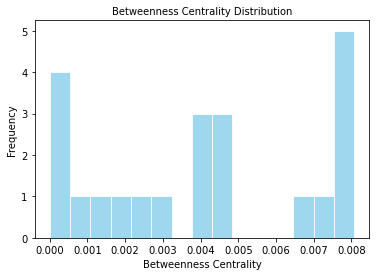

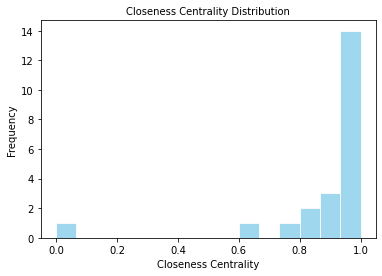

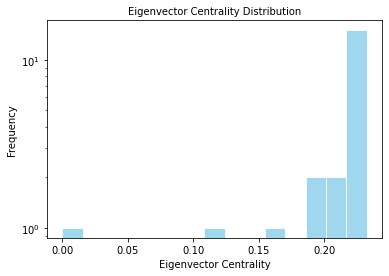

In [314]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201606.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201606.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201606.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()

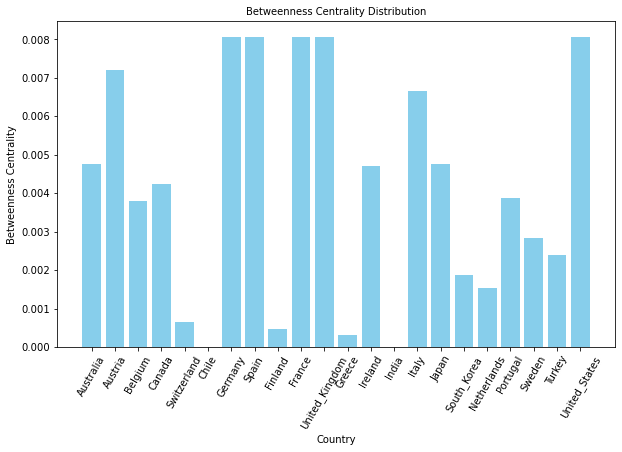

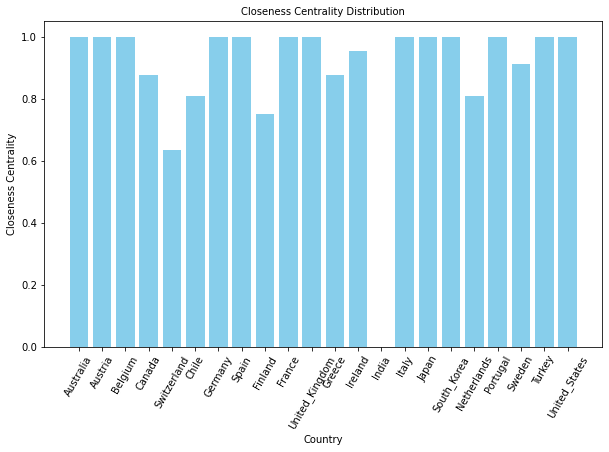

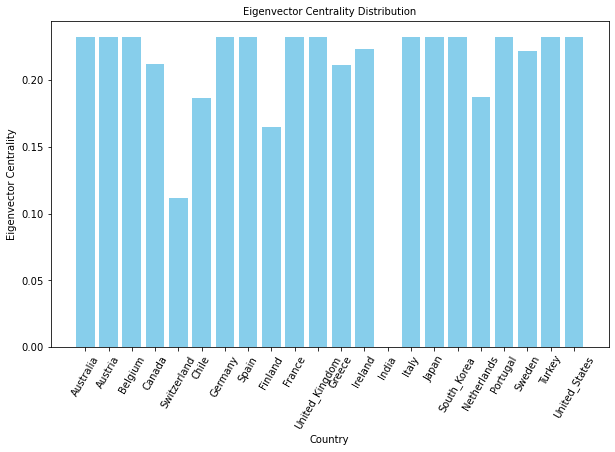

In [376]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201606.keys()),list(bet_cen_201606.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201606.keys()),list(clo_cen_201606.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201606.keys()),list(eig_cen_201606.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201603

In [315]:
bet_cen_201603 = nx.betweenness_centrality(G_20160331)
clo_cen_201603 = nx.closeness_centrality(G_20160331)
eig_cen_201603 = nx.eigenvector_centrality(G_20160331)


#### 10 topest betweenness centrality nodes

In [316]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201603.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201603.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004113
1: ('Germany', 0.008023811505954366)
2: ('Spain', 0.008023811505954366)
3: ('France', 0.008023811505954366)
4: ('United_Kingdom', 0.008023811505954366)
5: ('United_States', 0.008023811505954366)
6: ('Austria', 0.007347791097791099)
7: ('Italy', 0.0066374994053565485)
8: ('Canada', 0.004829872508443938)
9: ('Australia', 0.004707484975342118)
10: ('Japan', 0.004707484975342118)


#### 10 topest closeness centrality nodes

In [317]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201603.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201603.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))



Closeness mean: 0.891190
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [318]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201603.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201603.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206302
1: ('Australia', 0.23352472025530202)
2: ('Austria', 0.23352472025530202)
3: ('Belgium', 0.23352472025530202)
4: ('Germany', 0.23352472025530197)
5: ('Spain', 0.23352472025530197)
6: ('France', 0.23352472025530197)
7: ('United_Kingdom', 0.23352472025530197)
8: ('Italy', 0.23352472025530197)
9: ('Japan', 0.23352472025530197)
10: ('South_Korea', 0.23352472025530197)


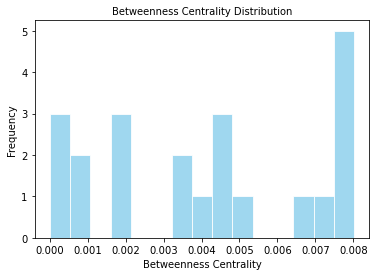

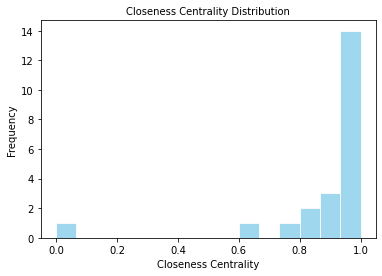

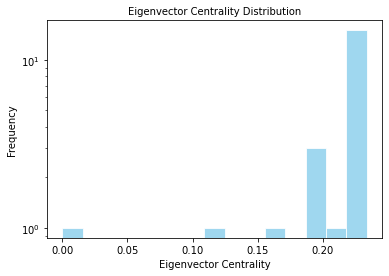

In [319]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201603.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201603.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201603.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


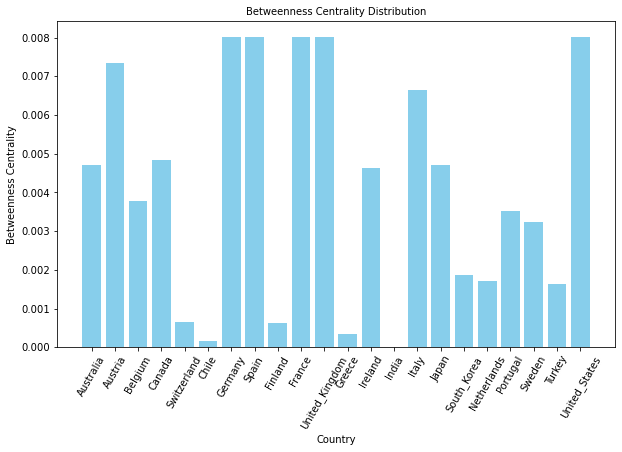

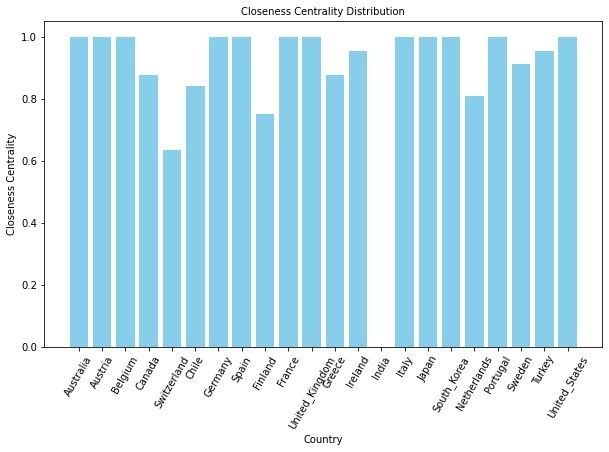

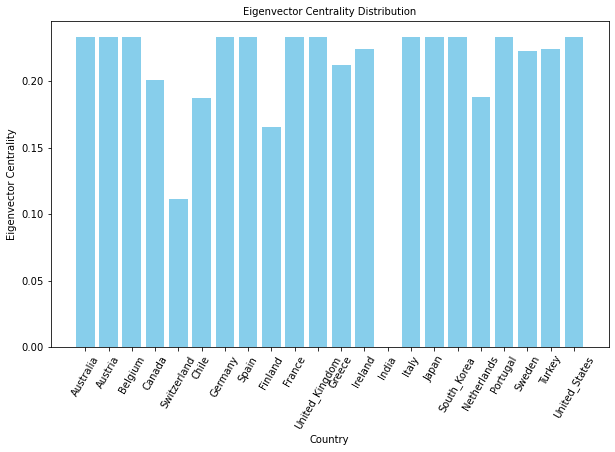

In [377]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201603.keys()),list(bet_cen_201603.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201603.keys()),list(clo_cen_201603.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201603.keys()),list(eig_cen_201603.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201512

In [320]:
bet_cen_201512 = nx.betweenness_centrality(G_20151231)
clo_cen_201512 = nx.closeness_centrality(G_20151231)
eig_cen_201512 = nx.eigenvector_centrality(G_20151231)


#### 10 topest betweenness centrality nodes

In [321]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201512.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201512.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))



Betweenness mean: 0.004437
1: ('Germany', 0.008947058232772519)
2: ('Spain', 0.008947058232772519)
3: ('France', 0.008947058232772519)
4: ('United_Kingdom', 0.008947058232772519)
5: ('United_States', 0.008947058232772519)
6: ('Austria', 0.008257955668669955)
7: ('Italy', 0.006395951931666218)
8: ('Australia', 0.005597662919091489)
9: ('Canada', 0.005395821110106824)
10: ('Ireland', 0.0048170315134600855)


#### 10 topest closeness centrality nodes

In [322]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201512.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201512.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.886852
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Japan', 1.0)
9: ('South_Korea', 1.0)
10: ('Portugal', 1.0)


#### 10 topest Eigenvector centrality nodes

In [323]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201512.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201512.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))



Eigenvector mean: 0.205989
1: ('Germany', 0.23484386714315028)
2: ('Spain', 0.23484386714315028)
3: ('Australia', 0.23484386714315023)
4: ('Austria', 0.23484386714315023)
5: ('Belgium', 0.23484386714315023)
6: ('France', 0.23484386714315023)
7: ('United_Kingdom', 0.23484386714315023)
8: ('Japan', 0.23484386714315023)
9: ('South_Korea', 0.23484386714315023)
10: ('Portugal', 0.23484386714315023)


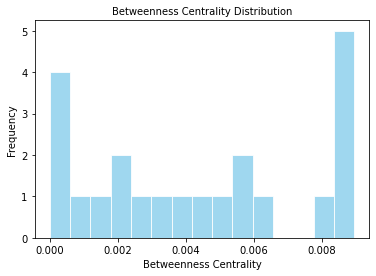

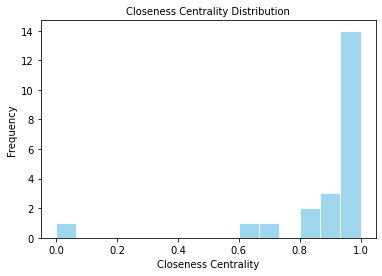

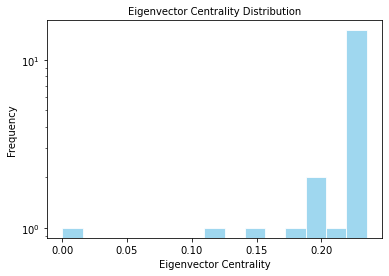

In [324]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201512.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201512.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201512.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


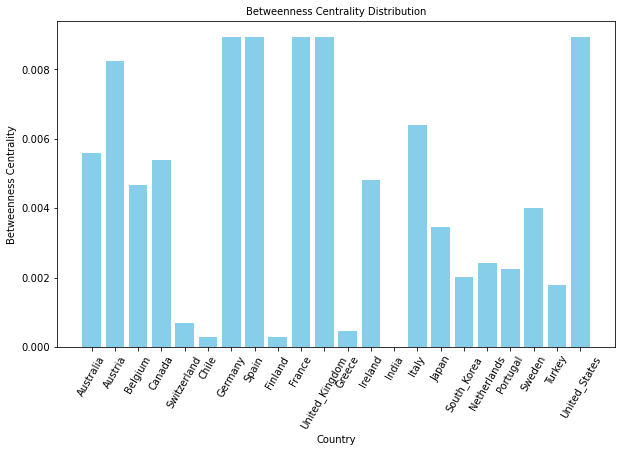

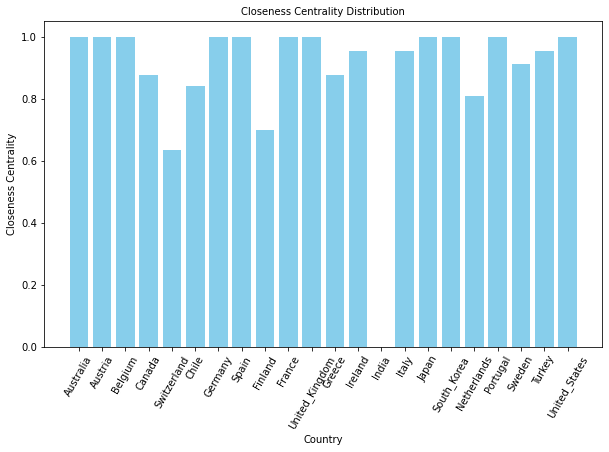

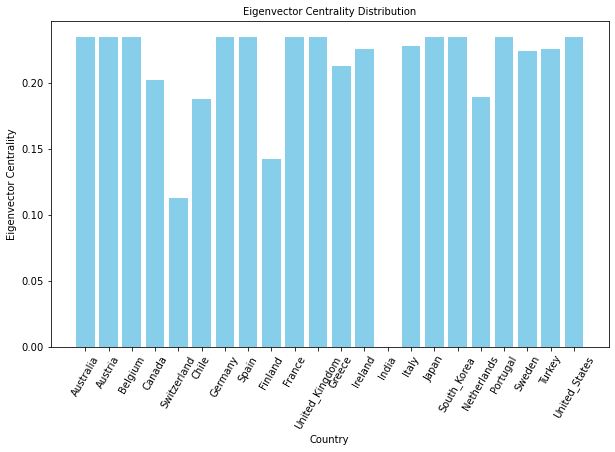

In [378]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201512.keys()),list(bet_cen_201512.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201512.keys()),list(clo_cen_201512.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201512.keys()),list(eig_cen_201512.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201509

In [325]:
bet_cen_201509 = nx.betweenness_centrality(G_20150930)
clo_cen_201509 = nx.closeness_centrality(G_20150930)
eig_cen_201509 = nx.eigenvector_centrality(G_20150930)


#### 10 topest betweenness centrality nodes

In [326]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201509.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201509.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))



Betweenness mean: 0.004221
1: ('Germany', 0.008236664129521273)
2: ('Spain', 0.008236664129521273)
3: ('France', 0.008236664129521273)
4: ('United_Kingdom', 0.008236664129521273)
5: ('United_States', 0.008236664129521273)
6: ('Austria', 0.007560643721358009)
7: ('Italy', 0.006120209155923442)
8: ('Australia', 0.004920337598909027)
9: ('Japan', 0.004920337598909027)
10: ('Ireland', 0.004823499912785628)


#### 10 topest closeness centrality nodes

In [327]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201509.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201509.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.889600
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [328]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201509.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201509.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206228
1: ('United_States', 0.23411217666016562)
2: ('Australia', 0.2341121766601656)
3: ('Austria', 0.2341121766601656)
4: ('Belgium', 0.2341121766601656)
5: ('Germany', 0.2341121766601656)
6: ('Spain', 0.2341121766601656)
7: ('France', 0.2341121766601656)
8: ('United_Kingdom', 0.2341121766601656)
9: ('Italy', 0.2341121766601656)
10: ('Japan', 0.2341121766601656)


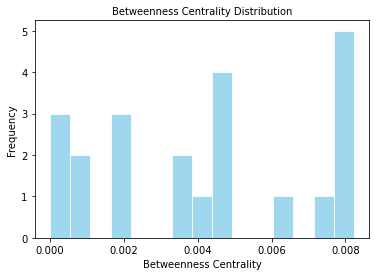

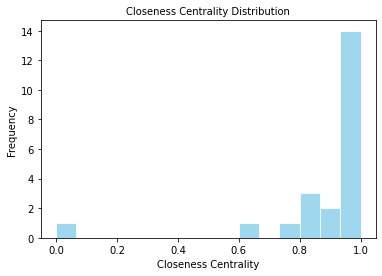

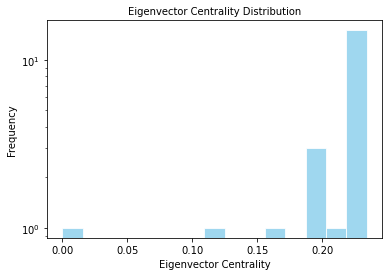

In [329]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201509.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201509.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201509.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


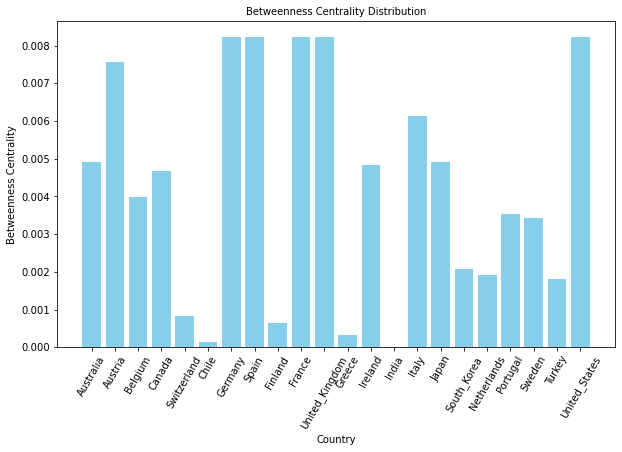

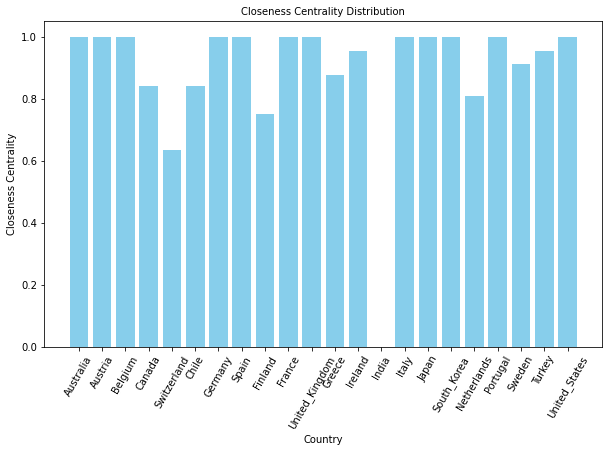

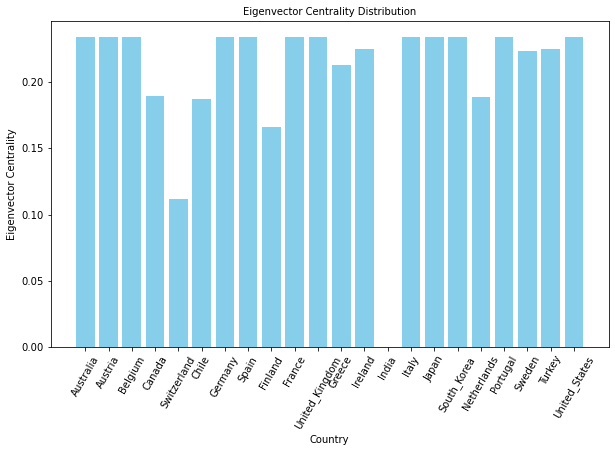

In [379]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201509.keys()),list(bet_cen_201509.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201509.keys()),list(clo_cen_201509.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201509.keys()),list(eig_cen_201509.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201506

In [330]:
bet_cen_201506 = nx.betweenness_centrality(G_20150630)
clo_cen_201506 = nx.closeness_centrality(G_20150630)
eig_cen_201506 = nx.eigenvector_centrality(G_20150630)


#### 10 topest betweenness centrality nodes

In [331]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201506.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201506.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.004004
1: ('Austria', 0.008004951397808543)
2: ('Germany', 0.008004951397808543)
3: ('Spain', 0.008004951397808543)
4: ('France', 0.008004951397808543)
5: ('United_Kingdom', 0.008004951397808543)
6: ('United_States', 0.008004951397808543)
7: ('Italy', 0.006275014667871811)
8: ('Australia', 0.004688624867196295)
9: ('Japan', 0.004688624867196295)
10: ('Canada', 0.004571876536162251)


#### 10 topest closeness centrality nodes

In [332]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201506.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201506.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.893335
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Italy', 1.0)
9: ('Japan', 1.0)
10: ('South_Korea', 1.0)


#### 10 topest Eigenvector centrality nodes

In [333]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201506.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201506.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206198
1: ('Australia', 0.23308327175451057)
2: ('Austria', 0.23308327175451057)
3: ('Belgium', 0.23308327175451057)
4: ('Germany', 0.23308327175451057)
5: ('Spain', 0.23308327175451057)
6: ('France', 0.23308327175451057)
7: ('United_Kingdom', 0.23308327175451057)
8: ('Italy', 0.23308327175451057)
9: ('Japan', 0.23308327175451057)
10: ('South_Korea', 0.23308327175451057)


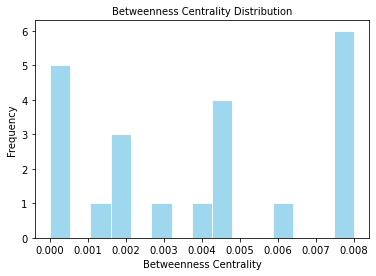

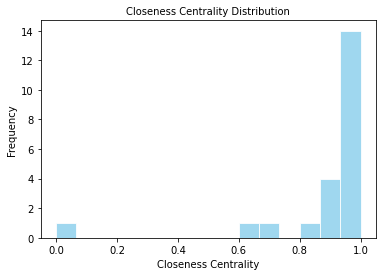

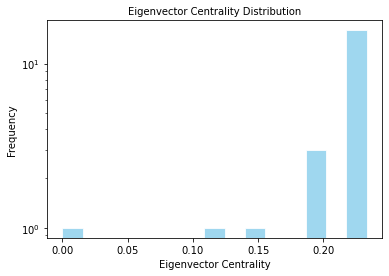

In [334]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201506.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201506.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201506.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


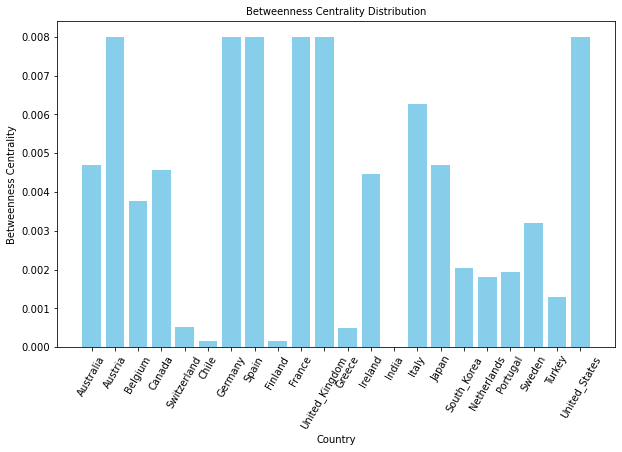

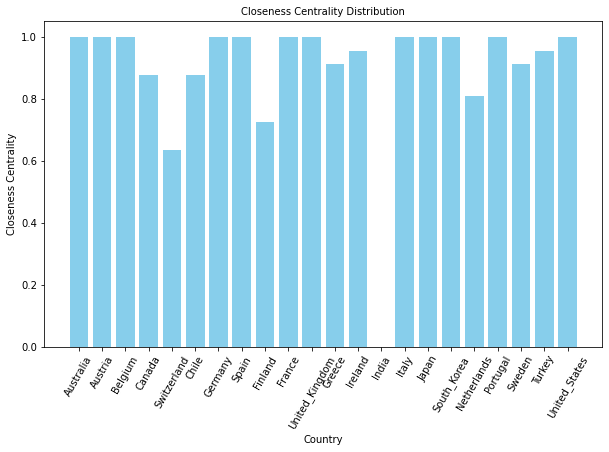

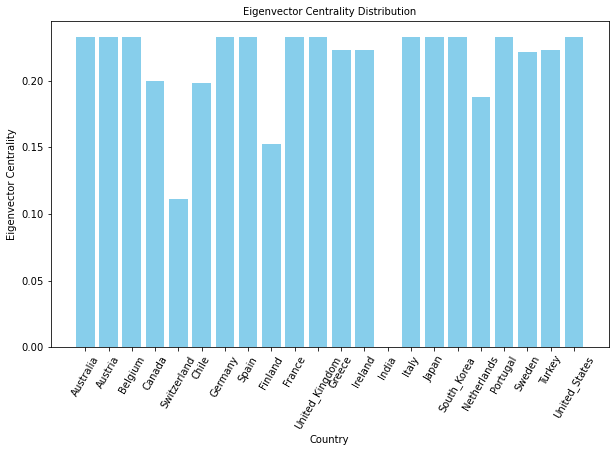

In [380]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201506.keys()),list(bet_cen_201506.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201506.keys()),list(clo_cen_201506.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201506.keys()),list(eig_cen_201506.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

### 201503

In [335]:
bet_cen_201503 = nx.betweenness_centrality(G_20150331)
clo_cen_201503 = nx.closeness_centrality(G_20150331)
eig_cen_201503 = nx.eigenvector_centrality(G_20150331)


#### 10 topest betweenness centrality nodes

In [336]:
print("Betweenness mean: %f" % (np.array(list(bet_cen_201503.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_betweenness = sorted(bet_cen_201503.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_betweenness[x]))


Betweenness mean: 0.003788
1: ('Austria', 0.007561089703946849)
2: ('Germany', 0.007561089703946849)
3: ('Spain', 0.007561089703946849)
4: ('France', 0.007561089703946849)
5: ('United_Kingdom', 0.007561089703946849)
6: ('Italy', 0.007561089703946849)
7: ('United_States', 0.007561089703946849)
8: ('Ireland', 0.00531386272457701)
9: ('Canada', 0.004413146377432092)
10: ('Australia', 0.0042872801801373235)


#### 10 topest closeness centrality nodes

In [337]:
print("Closeness mean: %f" % (np.array(list(clo_cen_201503.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(clo_cen_201503.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Closeness mean: 0.897288
1: ('Australia', 1.0)
2: ('Austria', 1.0)
3: ('Belgium', 1.0)
4: ('Germany', 1.0)
5: ('Spain', 1.0)
6: ('France', 1.0)
7: ('United_Kingdom', 1.0)
8: ('Ireland', 1.0)
9: ('Italy', 1.0)
10: ('Japan', 1.0)


#### 10 topest Eigenvector centrality nodes

In [338]:
print("Eigenvector mean: %f" % (np.array(list(eig_cen_201503.values())).mean()))

#get a list of airports sorted by betweenness
sorted_by_closeness = sorted(eig_cen_201503.items(), key=operator.itemgetter(1), reverse=True)

for x in range(10): #print top 10 airports by betweenness
    print(str(x+1)+ ": " + str(sorted_by_closeness[x]))


Eigenvector mean: 0.206184
1: ('Australia', 0.23255281882967577)
2: ('Austria', 0.23255281882967577)
3: ('Belgium', 0.23255281882967577)
4: ('Germany', 0.23255281882967577)
5: ('Spain', 0.23255281882967577)
6: ('France', 0.23255281882967577)
7: ('United_Kingdom', 0.23255281882967577)
8: ('Ireland', 0.23255281882967577)
9: ('Italy', 0.23255281882967577)
10: ('Japan', 0.23255281882967577)


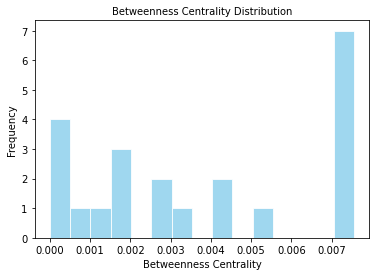

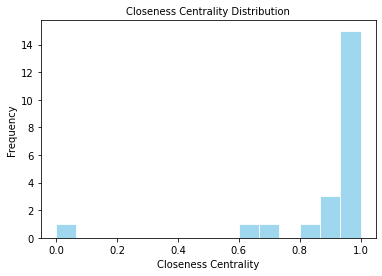

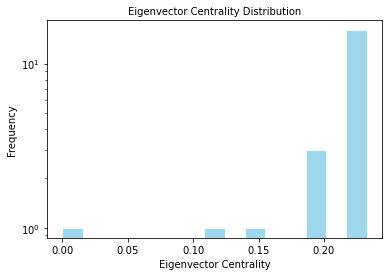

In [339]:
plt.tick_params(labelsize = 10)
plt.hist(bet_cen_201503.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Betweenness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(clo_cen_201503.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Closeness Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.show()

plt.tick_params(labelsize = 10)
plt.hist(eig_cen_201503.values(), bins=15, density=False,alpha=0.8,edgecolor='white',color = 'skyblue') 
plt.xlabel('Eigenvector Centrality',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
plt.yscale('log')
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.show()


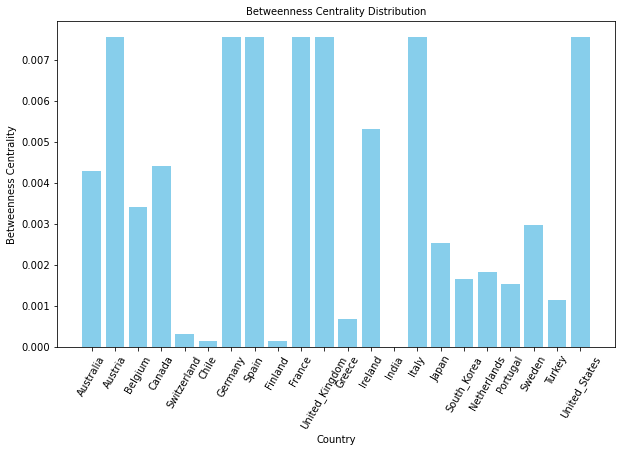

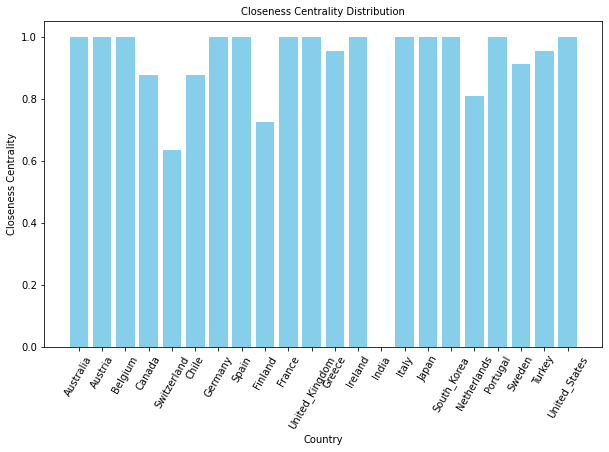

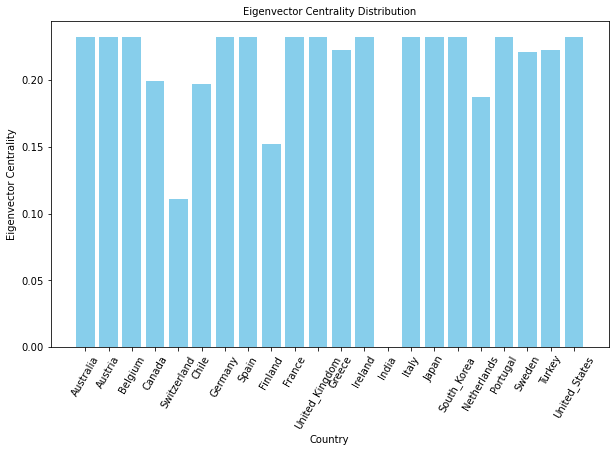

In [381]:
plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(bet_cen_201503.keys()),list(bet_cen_201503.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Betweenness Centrality',fontsize = 10)
plt.title('Betweenness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(clo_cen_201503.keys()),list(clo_cen_201503.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Closeness Centrality',fontsize = 10)
plt.title('Closeness Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10,6))
plt.tick_params(labelsize = 10)
plt.bar(list(eig_cen_201503.keys()),list(eig_cen_201503.values()),color = 'skyblue')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Eigenvector Centrality',fontsize = 10)
plt.title('Eigenvector Centrality Distribution',fontsize =10)
plt.xticks(rotation=60)
plt.show()

#### community

In [340]:
from networkx.algorithms.community import girvan_newman
comp = girvan_newman(G_20210930)

In [341]:
tuple(sorted(c) for c in next(comp))

(['Australia',
  'Austria',
  'Belgium',
  'Canada',
  'Chile',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Ireland',
  'Italy',
  'Japan',
  'Netherlands',
  'Portugal',
  'South_Korea',
  'Spain',
  'Sweden',
  'Switzerland',
  'Turkey',
  'United_Kingdom',
  'United_States'],
 ['India'])

In [342]:
###2021.06
comp = girvan_newman(G_20210630)
tuple(sorted(c) for c in next(comp))

(['Australia',
  'Austria',
  'Belgium',
  'Canada',
  'Chile',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Ireland',
  'Italy',
  'Japan',
  'Netherlands',
  'Portugal',
  'South_Korea',
  'Spain',
  'Sweden',
  'Switzerland',
  'Turkey',
  'United_Kingdom',
  'United_States'],
 ['India'])